# **Movie Revenue** <br> **Data mining + Machine learning project** <br>  i will add more desc here

---

#  الملخص التنفيذي



يهدف هذا المشروع إلى تطوير نظام تنقيب عن البيانات مدعوم بتقنيات التعلم الآلي للتنبؤ بإيرادات الأفلام المستقبلية واقتراح طاقم التمثيل الأمثل بناءً على خصائص الفيلم المختلفة.
<br>
 تم تجميع مجموعة بيانات شاملة تحتوي على معلومات متقدمة حول الأفلام مثل: النوع، اللغة، ميزانية الإنتاج، الشركات المنتجة، تقييمات الأفلام على  معلومات الممثلين وتقييماتهم، إضافة إلى متغيرات مشتقة مثل الربح وصافي الإيراد، وعدد الممثلين الفريدين، ومتوسط تقييماتهم، وغير ذلك.  
 <br>
الهدف الأساسي هو بناء نماذج تنبؤية دقيقة تساعد صناع القرار في صناعة السينما على تقدير إيرادات الأفلام قبل إنتاجها، واختيار الممثلين الذين يعظمون من فرص نجاح الفيلم تجارياً. كما يتضمن المشروع تطوير نظام توصية ذكي لترشيح الممثلين المناسبين، إضافة إلى نموذج لتوقع تقييم الفيلم.  
تم استخدام تقنيات متقدمة في المعالجة المسبقة للبيانات وهندسة الميزات، وسيتم تنفيذ النماذج باستخدام خوارزميات تعلم آلة مثل الأشجار العشوائية، والانحدار، والشبكات العصبية، وغيرها.

---

# فهم المشكلة

تواجه صناعة السينما تحديات كبيرة في التنبؤ بنجاح الأفلام قبل عرضها، مما قد يؤدي إلى خسائر مالية كبيرة نتيجة سوء التقدير. وتكمن الحاجة الملحة لدى شركات الإنتاج في وجود أنظمة ذكية تساعدها في تقدير الإيرادات المتوقعة بدقة بناءً على معطيات يمكن التحكم بها قبل بدء الإنتاج، مثل: ميزانية الفيلم، نوعه، طاقم التمثيل، الشركة المنتجة، وتاريخ الإصدار.  
كما يوجد اهتمام متزايد في مجال الصناعة باستخدام الذكاء الاصطناعي لتقديم توصيات حول اختيار طاقم التمثيل الأكثر تأثيراً في نجاح الفيلم مالياً وجماهيرياً.  
## اهداف المشروع
يهدف المشروع إلى تلبية هذه الاحتياجات من خلال
- بناء نموذج تنبؤي لإيرادات الأفلام المستقبلية باستخدام بيانات شاملة عن الفيلم وطاقم العمل.
- تطوير نظام توصية لترشيح الممثلين بناءً على الأثر المتوقع لهم على الإيرادات.
- تصميم نموذج توقع لتقييم الفيلم بناءً على معطياته المختلفة.
<br>
ستُعتمد مؤشرات نجاح المشروع على دقة النماذج التنبؤية، وجودة التوصيات، ومدى إمكانية تطبيق النتائج عملياً لدعم قرارات شركات الإنتاج السينمائي.

##  القيود والمخاطر
يتضمن المشروع عدداً من القيود والمخاطر التي يجب أخذها بعين الاعتبار أثناء تطوير النظام وتقييم نتائجه
1. قيود البيانات
2. قيود تقنية
3. مخاطر الانحياز
4. مخاطر التطبيق



# تحميل المكاتب

In [5]:
!pip install gdown


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import defaultdict
from collections import Counter
from itertools import combinations
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
import seaborn as sns
from IPython.display import display
import gdown
import pandas as pd
import requests
import os
import gzip
import shutil
import time
import kagglehub
from google.colab import drive
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# تحميل البيانات

## بيانات الافلام

يوجد لدينا مجموعتان من البيانات

### مجموعة بيانات الافلام 1
the dataset name <<leen add here

In [2]:


file_id = '1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc'

output_path = 'movies.csv'

gdown.download(id=file_id, output=output_path, quiet=False)
df = pd.read_csv(output_path)

df.head(2)

Downloading...
From (original): https://drive.google.com/uc?id=1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc
From (redirected): https://drive.google.com/uc?id=1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc&confirm=t&uuid=b2a3f573-2b08-4bb6-b064-c9cf0c129414
To: /content/movies.csv
100%|██████████| 351M/351M [00:02<00:00, 153MB/s]


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...


In [ ]:
# # تحميل البيانات

# # https://drive.google.com/file/d/1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc/view?usp=sharing
# df = pd.read_csv(r"C:\Users\ASUS\Downloads\archive (1)\movies.csv")
# df.head(2)


<table>
    <thead>
        <tr>
            <th>اسم العمود</th>
            <th>الشرح</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>id</td>
            <td>رقم تعريفي فريد لكل فيلم</td>
        </tr>
        <tr>
            <td>title</td>
            <td>اسم الفيلم</td>
        </tr>
        <tr>
            <td>genres</td>
            <td>تصنيفات الفيلم مفصولة بـ (-) مثل: Action - Science Fiction - Horror</td>
        </tr>
        <tr>
            <td>original_language</td>
            <td>اللغة الأصلية للفيلم </td>
        </tr>
        <tr>
            <td>overview</td>
            <td>ملخص أو وصف مختصر للفيلم</td>
        </tr>
        <tr>
            <td>popularity</td>
            <td>مقياس شهرة الفيلم (قيمة عددية مشتقة من نشاط البحث أو المشاهدة)</td>
        </tr>
        <tr>
            <td>production_companies</td>
            <td>أسماء شركات الإنتاج المشاركة، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>release_date</td>
            <td>تاريخ إصدار الفيلم</td>
        </tr>
        <tr>
            <td>budget</td>
            <td>ميزانية الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>revenue</td>
            <td>إجمالي الإيرادات التي حققها الفيلم بالدولار الأمريكي</td>
        </tr>
        <tr>
            <td>runtime</td>
            <td>مدة عرض الفيلم بالدقائق</td>
        </tr>
        <tr>
            <td>status</td>
            <td>حالة الفيلم مثل: Released - Post Production - ..</td>
        </tr>
        <tr>
            <td>tagline</td>
            <td>شعار تسويقي للفيلم </td>
        </tr>
        <tr>
            <td>vote_average</td>
            <td>متوسط تقييم الفيلم من قبل المستخدمين</td>
        </tr>
        <tr>
            <td>vote_count</td>
            <td>عدد الأشخاص الذين قاموا بتقييم الفيلم</td>
        </tr>
        <tr>
            <td>credits</td>
            <td>قائمة الممثلين والطاقم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>keywords</td>
            <td>كلمات مفتاحية مرتبطة بمحتوى الفيلم، مفصولة بـ (-)</td>
        </tr>
        <tr>
            <td>poster_path</td>
            <td>مسار صورة ملصق الفيلم</td>
        </tr>
        <tr>
            <td>backdrop_path</td>
            <td>مسار صورة خلفية الفيلمي</td>
        </tr>
        <tr>
            <td>recommendations</td>
            <td>قائمة بمعرّفات أفلام أخرى مقترحة، مفصولة بـ (-)</td>
        </tr>
    </tbody>
</table>


### مجموعة بيانات الافلام 2
IMDB dataset

In [3]:

# List of IMDb dataset URLs
imdb_urls = [
    "https://datasets.imdbws.com/title.basics.tsv.gz",
    "https://datasets.imdbws.com/title.ratings.tsv.gz",
    "https://datasets.imdbws.com/title.principals.tsv.gz",
    "https://datasets.imdbws.com/name.basics.tsv.gz"
]

output_dir = "imdb/"

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

for url in imdb_urls:
    # Extract filename from URL (e.g., "name.basics.tsv.gz")
    filename_gz = url.split('/')[-1]
    filename_tsv = filename_gz.replace('.gz', '')

    output_file_gz = os.path.join(output_dir, filename_gz)
    output_file_tsv = os.path.join(output_dir, filename_tsv)

    # Check if the decompressed TSV file already exists
    if os.path.exists(output_file_tsv):
        print(f"Skipping {filename_tsv}: Already exists in {output_dir}")
        continue # Skip to the next URL

    # Download the file
    print(f"\nDownloading {url} to {output_file_gz}...")
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        with open(output_file_gz, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download complete. Decompressing...")

        # Decompress the .gz file
        with gzip.open(output_file_gz, 'rb') as f_in:
            with open(output_file_tsv, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        print(f"Decompression complete. File saved to {output_file_tsv}")

        # Optional: Remove the .gz file after successful decompression to save space
        os.remove(output_file_gz)
        print(f"Removed compressed file: {output_file_gz}")

        # Add a small delay between downloads to be polite to the server
        time.sleep(1)

    except requests.exceptions.RequestException as e:
        print(f"Error downloading {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred with {url}: {e}")

print("\nAll specified IMDb datasets have been processed.")
print(f"You can find them in the '{output_dir}' directory.")



Created directory: imdb/

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.basics.tsv
Removed compressed file: imdb/title.basics.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.ratings.tsv
Removed compressed file: imdb/title.ratings.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/title.principals.tsv
Removed compressed file: imdb/title.principals.tsv.gz

Download complete. Decompressing...
Decompression complete. File saved to imdb/name.basics.tsv
Removed compressed file: imdb/name.basics.tsv.gz

All specified IMDb datasets have been processed.
You can find them in the 'imdb/' directory.


In [ ]:

## rating data
dfr = pd.read_csv(
    'imdb/title.ratings.tsv',
    sep='\t'
)
## movies data
dfb = pd.read_csv(
    'imdb/title.basics.tsv',
    low_memory=False  ,
    sep='\t',
    na_values='\\N'
)
print("\n Rating info: \n", dfr.info())
print("\n Rating describtion: \n",dfr.describe(include='all'))
print("\n Rating head \n",dfr.head())
print("\n Movies data shape : ",dfb.shape)
print("\n Rating data columns : ",dfr.columns)
print("\n Movies columns : ",dfb.columns)
columns_to_check = [
    'tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
    'startYear', 'endYear', 'runtimeMinutes', 'genres'
]

print("\n number of unique values in movies data (in selected columns ) \n",dfb[columns_to_check].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586591 entries, 0 to 1586590
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1586591 non-null  object 
 1   averageRating  1586591 non-null  float64
 2   numVotes       1586591 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.3+ MB

 Rating info: 
 None

 Rating describtion: 
            tconst  averageRating      numVotes
count     1586591   1.586591e+06  1.586591e+06
unique    1586591            NaN           NaN
top     tt9916880            NaN           NaN
freq            1            NaN           NaN
mean          NaN   6.949066e+00  1.022079e+03
std           NaN   1.387593e+00  1.785552e+04
min           NaN   1.000000e+00  5.000000e+00
25%           NaN   6.200000e+00  1.200000e+01
50%           NaN   7.100000e+00  2.600000e+01
75%           NaN   7.900000e+00  1.000000e+02
max           NaN   1.000000e+01

## بيانات الممثلين
هنالك مجموعتان للممثلين

### مجموعة بيانات الممثلين 1
IMDB dataset  

In [6]:
basics_df = pd.read_csv('imdb/title.basics.tsv', sep='\t', low_memory=False)
ratings_df = pd.read_csv('imdb/title.ratings.tsv', sep='\t')
print(basics_df.info())
print(ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11762395 entries, 0 to 11762394
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 807.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586591 entries, 0 to 1586590
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1586591 non-null  object 
 1   averageRating  1586591 non-null  float64
 2   numVotes       1586591 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 36.3+ MB
None


In [7]:
# extra for the actors
principals_df = pd.read_csv('imdb/title.principals.tsv', sep='\t')
names_df = pd.read_csv('imdb/name.basics.tsv', sep='\t', low_memory=False)
print(principals_df.info())
print(names_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93482991 entries, 0 to 93482990
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 4.2+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14538023 entries, 0 to 14538022
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 665.5+ MB
None


### مجموعة بيانات الممثلين 2

In [8]:
path = kagglehub.dataset_download("darinhawley/imdb-films-by-actor-for-10k-actors")

print("Path to dataset files:", path)
actors_df_kaggle=pd.read_csv(f'{path}/actorfilms.csv')

100%|██████████| 3.92M/3.92M [00:00<00:00, 57.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/darinhawley/imdb-films-by-actor-for-10k-actors/versions/1


## الاوسكار

#### تحميل بيانات الاوسكار

In [35]:

path = kagglehub.dataset_download("unanimad/the-oscar-award")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-oscar-award


In [36]:
oscars_df = pd.read_csv('/kaggle/input/the-oscar-award/the_oscar_award.csv')

oscars_df.head()

,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
0,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Patent Leather Kid,False
2,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Way of All Flesh,True
4,1927,1928,1,ACTRESS,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False


---
#### فحص البيانات
---

In [13]:
oscars_df['category'].value_counts()

,count
category,
DIRECTING,476
FILM EDITING,455
ACTOR IN A SUPPORTING ROLE,445
ACTRESS IN A SUPPORTING ROLE,445
BEST PICTURE,381
...,...
SPECIAL ACHIEVEMENT AWARD,3
SPECIAL FOREIGN LANGUAGE FILM AWARD,2
DIRECTING (Comedy Picture),2


In [14]:
oscars_df['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)',
       'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)',
       'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)',
       'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)',
       'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)',
       'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECT

## الممثلين النجوم

In [ ]:
celebrity_path = r"C:\Users\LENOVO\Desktop\Datasets\Celebrity.csv" # TODO  اللينك الاصلي يا هناء 
forbes_path     = r"C:\Users\LENOVO\Desktop\Datasets\forbes_celebrity_100.csv"


df1 = pd.read_csv(celebrity_path)
df3= pd.read_csv(forbes_path)
# superstars = r"C:\Users\LENOVO\Desktop\Datasets\superstars_actors.csv"
# df1 = pd.read_csv(superstars)
# df1.shape

In [ ]:
df3.shape

(1647, 4)

In [ ]:
df1.columns

Index(['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id',
       'known_for_department', 'adult'],
      dtype='object')

In [ ]:
df3.columns

Index(['Name', 'Pay (USD millions)', 'Year', 'Category'], dtype='object')

In [ ]:
print("Celebrity.csv Columns:", df1.columns.tolist())
print("Forbes Celebrity 100 Columns:", df3.columns.tolist())

print("\nSample from Celebrity.csv:")
print(df1.head())


print("\nSample from forbes_celebrity_100.csv:")
print(df3.head())


Celebrity.csv Columns: ['Unnamed: 0', 'name', 'original_name', 'popularity', 'gender', 'id', 'known_for_department', 'adult']
Forbes Celebrity 100 Columns: ['Name', 'Pay (USD millions)', 'Year', 'Category']

Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  

Sample from forbes_celebrity_100.csv:
               Name  Pay (USD millions)  Year             Categor

In [ ]:
df1.shape

(9980, 8)

In [ ]:
print("\nSample from Celebrity.csv:")
print(df1.head())



Sample from Celebrity.csv:
   Unnamed: 0            name   original_name  popularity  gender       id  \
0           0     Gary Oldman     Gary Oldman     212.888       2       64   
1           1   Ryan Reynolds   Ryan Reynolds     199.717       2    10859   
2           2  Sydney Sweeney  Sydney Sweeney     193.376       1   115440   
3           3   Jason Statham   Jason Statham     187.787       2      976   
4           4   Chloe Coleman   Chloe Coleman     175.645       1  1696016   

  known_for_department  adult  
0               Acting  False  
1               Acting  False  
2               Acting  False  
3               Acting  False  
4               Acting  False  


In [ ]:
for col in df1.columns:
    print(f"\nColumn: {col}")
    print(df1[col].unique())
    print(f"Total unique: {df1[col].nunique()}")



Column: Unnamed: 0
[   0    1    2 ... 9977 9978 9979]
Total unique: 9980

Column: name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8711

Column: original_name
['Gary Oldman' 'Ryan Reynolds' 'Sydney Sweeney' ... 'Dimple Kapadia'
 'Grażyna Szapołowska' 'Ferdinando Poggi']
Total unique: 8708

Column: popularity
[212.888 199.717 193.376 ...  21.939  21.938  21.937]
Total unique: 6923

Column: gender
[2 1 3 0]
Total unique: 4

Column: id
[    64  10859 115440 ...  78921   1384 114645]
Total unique: 8726

Column: known_for_department
['Acting' 'Directing' 'Writing' 'Production' 'Sound' 'Visual Effects'
 'Crew' 'Creator' 'Art' 'Camera' 'Costume & Make-Up' 'Editing']
Total unique: 12

Column: adult
[False]
Total unique: 1


# إعداد البيانات

## بيانات الافلام


### مجموعة الافلام 1


####  preprocessing:

يوجد في البيانات أفلام بلغات عديدة، منها التركية، اليابانية، الهندية، والإنجليزية، حيث تحتوي قاعدة البيانات على أفلام بـ **167 لغة مختلفة**.

لكن، في دراستنا سنقتصر على الأفلام باللغة الإنجليزية فقط، وذلك لضمان دقة وتحليل أكثر عمقًا وموضوعية.



In [15]:

num_languages = df['original_language'].nunique()
print(f"عدد اللغات الأصلية المختلفة هو: {num_languages}")
languages = df['original_language'].unique()
print(languages)


عدد اللغات الأصلية المختلفة هو: 167
['en' 'la' 'ko' 'es' 'no' 'cn' 'ja' 'hi' 'fi' 'ru' 'uk' 'nl' 'it' 'zh'
 'bn' 'th' 'id' 'is' 'da' 'fr' 'pl' 'te' 'pt' 'de' 'ro' 'tl' 'ta' 'ar'
 'el' 'sr' 'sv' 'gl' 'tr' 'vi' 'ml' 'lv' 'cs' 'bs' 'fa' 'ga' 'mk' 'pa'
 'eu' 'kn' 'ca' 'xx' 'sh' 'et' 'km' 'gu' 'he' 'hu' 'hr' 'dz' 'ne' 'ka'
 'ms' 'mn' 'kk' 'si' 'af' 'sl' 'bo' 'sk' 'wo' 'hy' 'se' 'sq' 'kl' 'su'
 'ku' 'eo' 'ur' 'sw' 'mi' 'cy' 'as' 'lt' 'ps' 'mr' 'qu' 'bm' 'rw' 'ay'
 'uz' 'bg' 'am' 'lo' 'iu' 'zu' 'os' 'xh' 'ak' 'yi' 'mt' 'yo' 'my' 'ff'
 'nb' 'st' 'jv' 'ha' 'gn' 'lb' 'az' 'ky' 'gd' 'or' 'mo' 'ln' 'fo' 'tg'
 'tw' 'be' 'sa' 'ug' 'sm' 'an' 'ie' 'rm' 'co' 'nn' 'ti' 'ab' 'fy' 'tk'
 'so' 'lg' 'ht' 'ba' 'mg' 'ks' 'ss' 'dv' 'tt' 'ia' 'cr' 'ny' 'ig' 'ce'
 'bi' 'ii' 'sn' 'nv' 'mh' 'sg' 'ki' 'za' 'oj' 'to' 'ts' 'om' 'kg' 'rn'
 'sd' 'oc' 'kw' 'pi' 'gv' 'av' 'tn' 'cv' 'fj' 'sc' 'ty' 'ch' 'li']


In [16]:
english_movies = df[df['original_language'] == 'en']

حذف الاعمدة التي لن نتطرق لها اثناء تحليل ودراسة :


In [17]:

english_movies = english_movies.drop(columns=['keywords', 'poster_path', 'backdrop_path','recommendations' ])

نلاحظ وجود عدد كبير من القيم الفارغة في العديد من الأعمدة، حيث أن نسبة القيم المفقودة في بعض الأعمدة تتجاوز **80%**، مما يجعل أي محاولة للتعويض باستخدام تقنيات مثل التقدير أو التنبؤ غير دقيقة، وقد تؤدي إلى نتائج خاطئة    
بالإضافة إلى ذلك، هناك نقص كبير في أعمدة مهمة وأساسية مثل:

- أسماء الممثلين
- تاريخ العرض
- مدة العرض
- نوع الفيلم

لذلك، أي تحليل يعتمد على هذه الأعمدة سيكون غير دقيق

In [18]:
english_movies.isna().sum()

,0
id,0
title,6
genres,129102
original_language,0
overview,7973
popularity,0
production_companies,216986
release_date,35214
budget,0
revenue,0



1. **حذف جميع الصفوف التي تحتوي على قيم فارغة**  
   بسبب النسبة العالية جدا للقيم المفقودة في أعمدة حساسة، قمنا بحذف هذه الصفوف بالكامل لضمان الاعتماد فقط على بيانات مكتملة.

2. **حذف الصفوف المكررة بشكل كامل مع الاحتفاظ بأول تكرار**  
   هذه الخطوة تضمن عدم وجود نسخ مكررة تماماً من نفس الفيلم.

3. **حذف التكرار بناءً على عنوان الفيلم وتاريخ عرضه فقط**   
   بعض الأفلام قد تُسجل أكثر من مرة بنفس العنوان وتاريخ الإصدار، لذا تم حذف التكرار بناءً على هذين العمودين فقط.
   <br>
**النتيجة:**
<br>
عدد الأفلام المتبقية بعد حذف:  
48654


In [19]:
english_movies = english_movies.dropna()
english_movies = english_movies.drop_duplicates(keep='first')
english_movies= english_movies.drop_duplicates(subset=['title', 'release_date'])
len(english_movies)

48654

#### شرح حالات حالة الأفلام (status)
- **Released (تم الإصدار):**  
  الأفلام التي تم الانتهاء منها وتم إصدارها رسميًا للجمهور.  
  عددها: 48,620 فيلم  
  تمثل أغلب الأفلام في البيانات.

- **In Production (قيد الإنتاج):**  
  الأفلام التي ما زالت في مرحلة التصوير والإنتاج الفعلي.  
  عددها: 19 فيلم  
  لم تُكمل بعد مراحل الإنتاج.

- **Post Production (ما بعد الإنتاج):**  
  الأفلام التي انتهى تصويرها وجاري العمل على المونتاج، المؤثرات، والمراحل النهائية قبل الإصدار.  
  عددها: 12 فيلم

- **Planned (مخطط لها):**  
  الأفلام التي في مرحلة التخطيط فقط، ولم يبدأ تصويرها أو إنتاجها بعد.  
  عددها: 3 أفلام
واخيرا :
 البيانات غير متوازنة , يعني الموديل ما رح يتعلم شي فعلي عن الفئات النادرة لأنها:
قليلة لدرجة ما تمثل نمط واضح.
لذلك سيتم الاحتفاظ فقط بحالة صدرو الفيلم

In [20]:
unique_status_count = english_movies['status'].nunique()
print(unique_status_count)
print(english_movies['status'].value_counts())

4
status
Released           48620
In Production         19
Post Production       12
Planned                3
Name: count, dtype: int64


In [21]:

english_movies = english_movies[english_movies['status'] == 'Released']



####  حذف افلام يلي مدتها صفر: وهي تم اطلاقها ف هون في غلط بالبيانات كادخال ف يفضل الحذف

In [22]:
english_movies_zero_runtime = english_movies[english_movies['runtime'] == 0]
print(english_movies_zero_runtime['status'].value_counts())
english_movies = english_movies[english_movies['runtime'] > 0]


status
Released    793
Name: count, dtype: int64



- في **Outliers**  :
  - أقصر فيلم: **1 دقيقة فقط**
  - أطول فيلم: **960 دقيقة** (يعني 16 ساعة تقريبًا!)
- المتوسط العام: **86 دقيقة**
- أغلب الأفلام تقع بين:
  - **الربع الأول (25%)** = 75 دقيقة
  - **الربع الثالث (75%)** = 100 دقيقة

: لازم نحذف القيم المتطرفة
- نحصر البيانات  بين:
  - 15 دقيقة كحد أدنى (منطقي لفيلم قصير)
  - 400 دقيقة كحد أقصى (3 ساعات كحد مقبول للأفلام الطويلة)

In [23]:
english_movies['runtime'].describe()


,runtime
count,47827.000000
mean,86.207289
std,34.644593
min,1.000000
25%,75.000000
50%,90.000000
75%,100.000000
max,960.000000


In [24]:

one_minute = english_movies[english_movies['runtime'] < 15]
print(f"عدد الأفلام مدتها 15 دقيقة: {len(one_minute)}")

over_400 = english_movies[english_movies['runtime'] > 400]
print(f"عدد الأفلام مدتها أكثر من 400 دقيقة: {len(over_400)}")

عدد الأفلام مدتها 15 دقيقة: 2356
عدد الأفلام مدتها أكثر من 400 دقيقة: 29


#### قبل الحذف بدي شوف ازا بينتمو لنوع محدد بس لا لذلك تم حذف

In [25]:

one_minute_genres = english_movies[english_movies['runtime'] <15]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: {len(one_minute_genres)}")
print(one_minute_genres)

over_400_genres = english_movies[english_movies['runtime'] > 400]['genres'].unique()
print(f"عدد الأنواع الفريدة لأفلام مدتها أكثر من 400 دقيقة: {len(over_400_genres)}")
print(over_400_genres)


عدد الأنواع الفريدة لأفلام مدتها دقيقة واحدة: 498
['Action-Science Fiction' 'Family-Animation-Comedy'
 'Animation-Family-Comedy-Fantasy' 'Animation-Comedy-Fantasy'
 'Animation-Comedy-Family-Fantasy'
 'Animation-Adventure-Comedy-Family-Science Fiction' 'Comedy'
 'Science Fiction-Fantasy' 'Action-Comedy-Fantasy-Thriller'
 'Drama-Western-Adventure' 'Family-Fantasy-Animation-Comedy'
 'Horror-Mystery' 'Animation-Family-Comedy' 'Animation-Family'
 'Animation-Horror' 'Science Fiction-Thriller' 'Horror'
 'Science Fiction-Action-Fantasy' 'Documentary-War'
 'Science Fiction-Comedy-Fantasy' 'Animation-Fantasy-Comedy' 'Documentary'
 'Horror-Comedy' 'Horror-Science Fiction-Thriller' 'Mystery-Horror'
 'Drama' 'Drama-Fantasy' 'Drama-Crime-Action' 'Mystery-Thriller'
 'Thriller-Horror' 'Adventure-Action-Fantasy' 'Family-Comedy-Animation'
 'Action-Adventure-Science Fiction' 'Fantasy-Comedy'
 'Animation-Family-Romance' 'Science Fiction-Drama'
 'Music-Animation-Comedy-Family' 'Animation-Comedy-Drama-Famil

In [26]:

english_movies = english_movies[(english_movies['runtime'] > 15) & (english_movies['runtime'] < 400)]

print(english_movies['runtime'].describe())

count    45212.000000
mean        90.341303
std         27.374215
min         16.000000
25%         79.000000
50%         90.000000
75%        101.000000
max        390.000000
Name: runtime, dtype: float64



 معظم الأفلام شعبيتها منخفضة:
- 25% من الأفلام أقل من **1.33**
- 50% من الأفلام أقل من **2.80** (الوسيط)
- 75% من الأفلام أقل من **7.88**

 توجد قيم شاذة جدًا (Outliers):
- القيمة القصوى **8763.99** بعيدة جدًا عن المتوسط.
- الانحراف المعياري المرتفع **89.67** يدل على وجود تشتت كبير في القيم.

#### الاستنتاج:
لا يمكن الاعتماد على هذا العامود كمؤشر دقيق لقياس شهرة الفيلم، للأسباب التالية:
- وجود تفاوت كبير بين القيم.
- القيم المتطرفة تؤثر على التحليل الإحصائي.
**يُفضل استخدام مؤشرات بديلة أكثر دقة لقياس شهرة الأفلام.**


In [27]:

print(english_movies['popularity'].describe())


count    45212.000000
mean        10.236429
std         89.685811
min          0.001000
25%          1.333000
50%          2.807000
75%          7.885000
max       8763.998000
Name: popularity, dtype: float64


#### نتيجة:

- عدد التقييمات غير متوزع بشكل جيد، حيث معظم الأفلام حصلت على عدد قليل جدًا من التقييمات، وهذا يجعل الاعتماد على المتوسط غير موثوق.

- متوسط التقييم قد يعطي مؤشرًا أوليًا لجودة الفيلم، لكنه لا يعكس الحقيقة بشكل كامل خاصةً إذا كان عدد التقييمات قليل جدًا.

- بالتالي، لا يمكن الاعتماد على عدد التقييمات أو متوسط التقييم لوحدهما كمعيار دقيق لتحليل جودة أو شهرة الأفلام.



In [28]:
print(english_movies['vote_count'].describe())
print(english_movies['vote_average'].describe())



count    45212.000000
mean       352.231509
std       1507.039860
min          0.000000
25%          1.000000
50%         10.000000
75%         77.000000
max      34857.000000
Name: vote_count, dtype: float64
count    45212.000000
mean         4.843025
std          2.602260
min          0.000000
25%          4.000000
50%          5.700000
75%          6.548250
max         10.000000
Name: vote_average, dtype: float64


#### إنشاء ميزة جديدة: الأرباح (profit)

تم إنشاء ميزة جديدة تُسمى **الأرباح**، والتي تمثل الفرق بين إيرادات الفيلم  والتكلفة أو الميزانية التي صرفت عليه .

بالتالي، تُعطينا هذه الميزة فكرة واضحة عن نجاح الفيلم من الناحية المالية، حيث نعرف هل الفيلم حقق أرباحًا أو خسر مبلغًا معينًا.

هذه الميزة مهمة لأنها   توفر لنا مؤشرًا أدق على الأداء المالي للفيلم.


In [29]:
english_movies['profit'] = english_movies['revenue'] - english_movies['budget']

In [30]:

english_movies['release_date'] = pd.to_datetime(english_movies['release_date'], errors='coerce')
english_movies['release_year'] = english_movies['release_date'].dt.year
english_movies['release_month'] = english_movies['release_date'].dt.month
english_movies['release_day'] =english_movies['release_date'].dt.day


In [31]:

english_movies['release_year'] = english_movies['release_date'].dt.year
valid_years = english_movies['release_year'].dropna()
unique_years = valid_years.unique()
print(f"عدد السنوات الفريدة: {len(unique_years)}")
min_year = valid_years.min()
max_year = valid_years.max()
print(f"أصغر سنة في البيانات: {min_year}")
print(f"أكبر سنة في البيانات: {max_year}")
print("السنوات الفريدة مرتبة:")
print(sorted(unique_years))


عدد السنوات الفريدة: 118
أصغر سنة في البيانات: 1906
أكبر سنة في البيانات: 2025
السنوات الفريدة مرتبة:
[np.int32(1906), np.int32(1907), np.int32(1910), np.int32(1911), np.int32(1912), np.int32(1913), np.int32(1914), np.int32(1915), np.int32(1916), np.int32(1917), np.int32(1918), np.int32(1919), np.int32(1920), np.int32(1921), np.int32(1922), np.int32(1923), np.int32(1924), np.int32(1925), np.int32(1926), np.int32(1927), np.int32(1928), np.int32(1929), np.int32(1930), np.int32(1931), np.int32(1932), np.int32(1933), np.int32(1934), np.int32(1935), np.int32(1936), np.int32(1937), np.int32(1938), np.int32(1939), np.int32(1940), np.int32(1941), np.int32(1942), np.int32(1943), np.int32(1944), np.int32(1945), np.int32(1946), np.int32(1947), np.int32(1948), np.int32(1949), np.int32(1950), np.int32(1951), np.int32(1952), np.int32(1953), np.int32(1954), np.int32(1955), np.int32(1956), np.int32(1957), np.int32(1958), np.int32(1959), np.int32(1960), np.int32(1961), np.int32(1962), np.int32(1963), n

#### انشاء ميزة عدد ممثلين

In [32]:

english_movies['unique_actors_count'] = english_movies['credits'].apply(lambda x: len(set(str(x).split('-'))))



#### استخدام تحليل المشاعر لجملة الترويج كميزة جديدة
 tagline_sentiment

في هالخطوة، عملنا تحليل مشاعر لجمل الترويج  لكل فيلم, انشئنا عامود جديد  بيحدد إذا كانت جملة الترويج إيجابية، سلبية أو محايدة.

الهدف من هالميزة هو تزويد نموذج تعلم الآلة بمعلومة إضافية تساعده يفهم مشاعر الجملة الترويجية للفيلم، لأنه ممكن تكون مؤشر مهم  على إيرادات الفيلم.

مثلاً:

جملة ترويجية إيجابية ممكن تعزز اهتمام المشاهدين وبالتالي تزيد الإيرادات.

جملة ترويجية سلبية أو محايدة قد تعكس حالة مختلفة.

باستخدام هالميزة، نموذج التنبؤ ممكن يصير أكثر دقة في توقع إيرادات الأفلام.

In [34]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    if not isinstance(text, str):
        return 'neutral'
    scores = sid.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 1
    elif compound <= -0.05:
        return -1
    else:
        return 0

english_movies['tagline_sentiment'] = english_movies['tagline'].apply(analyze_sentiment)


print(english_movies[['tagline', 'tagline_sentiment']].head())


sentiment_counts = english_movies['tagline_sentiment'].value_counts()
print(sentiment_counts)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             tagline  tagline_sentiment
0                                  Back for seconds.                  0
1  Inspired by the actual files of Father Gabriel...                  1
2                                     Come together.                  0
3                                     Unite or fall.                  0
4                            Long live the fighters.                 -1
tagline_sentiment
 0    16571
 1    16060
-1    12581
Name: count, dtype: int64


#### تقسيم الأفلام حسب الفترة الزمنية (Movie Era Classification)

قمنا بتقسيم الأفلام إلى فئات زمنية تعتمد على سنة إصدار الفيلم، بهدف التعرف على تأثير الفترة التاريخية على أداء الفيلم من حيث الإيرادات والنجاح.

هذا التصنيف يساعد في تحليل أنماط السوق وتغير ذوق الجمهور بمرور الوقت، ويمكن الاستفادة منه كميزة إضافية في النماذج   (Machine Learning) لتوقع أرباح أو نجاح الأفلام.

**التقسيم المعتمد:**

| الفئة         | السنوات       | الوصف                                          |
|---------------|----------------|------------------------------------------------|
| Classic       | قبل 1980       | الأفلام الكلاسيكية ذات الإنتاج التقليدي والبسيط. |
| Old_School    | 1980 - 1999    | فترة الثمانينات والتسعينات، بداية التطور التكنولوجي وانتشار السينما التجارية. |
| Modern        | 2000 - 2014    | الأفلام الحديثة نسبيًا، مع وجود تأثير الإنترنت وتطور أساليب الترويج. |
| New_Era       | 2015 وما بعد   | الفترة المعاصرة، حيث تلعب السوشيال ميديا والبث الرقمي دورًا كبيرًا في نجاح الأفلام. |



                              title  release_year movie_era
0                 Meg 2: The Trench          2023   New_Era
1               The Pope's Exorcist          2023   New_Era
2              Deadpool & Wolverine          2024   New_Era
3  Transformers: Rise of the Beasts          2023   New_Era
4                    Dune: Part Two          2024   New_Era


/tmp/ipython-input-36-3931499364.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=english_movies, x='movie_era', palette='viridis')


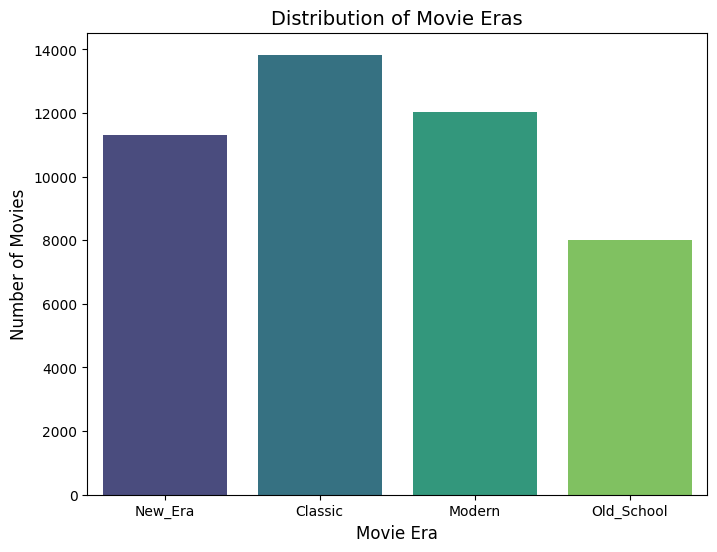

In [36]:


def classify_era(year):
    if year < 1980:
        return 'Classic'
    elif year < 2000:
        return 'Old_School'
    elif year < 2015:
        return 'Modern'
    else:
        return 'New_Era'

english_movies['movie_era'] = english_movies['release_year'].apply(classify_era)

print(english_movies[['title', 'release_year', 'movie_era']].head())

plt.figure(figsize=(8, 6))
sns.countplot(data=english_movies, x='movie_era', palette='viridis')

plt.title('Distribution of Movie Eras', fontsize=14)
plt.xlabel('Movie Era', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()



#### تصنيف الأفلام حسب الميزانية

قمنا بإنشاء ميزة جديدة   تُصنّف الأفلام إلى فئات بناءً على قيمة ميزانية .

<br>
آلية التصنيف
<br>

- **low_budget** : أفلام ذات ميزانية أقل من 1 مليون دولار.
- **medium_budget** : أفلام ميزانيتها بين 1 مليون و20 مليون دولار.
- **high_budget** : أفلام ميزانيتها بين 20 مليون و100 مليون دولار.
- **blockbuster** : أفلام ضخمة الإنتاج بميزانية تفوق 100 مليون دولار.

<br> **أهمية هذه الميزة** <br>

- تساعد في فهم العلاقة بين الميزانية وحجم الأرباح أو الإيرادات.
- تساهم في تحسين أداء نماذج التنبؤ بإيرادات أو نجاح الفيلم.
- توفّر تصنيف واضح لأنواع الأفلام (مستقلة، متوسطة، ضخمة الإنتاج).



In [37]:

def budget_category(budget):
    if budget < 1_000_000:
        return 'low_budget'
    elif budget < 20_000_000:
        return 'medium_budget'
    elif budget < 100_000_000:
        return 'high_budget'
    else:
        return 'blockbuster'

english_movies['budget_category'] = english_movies['budget'].apply(budget_category)


print(english_movies[['title', 'budget', 'budget_category']].head())


                              title       budget budget_category
0                 Meg 2: The Trench  129000000.0     blockbuster
1               The Pope's Exorcist   18000000.0   medium_budget
2              Deadpool & Wolverine  200000000.0     blockbuster
3  Transformers: Rise of the Beasts  200000000.0     blockbuster
4                    Dune: Part Two  190000000.0     blockbuster


/tmp/ipython-input-38-2616158592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=english_movies, x='budget_category', palette='viridis')


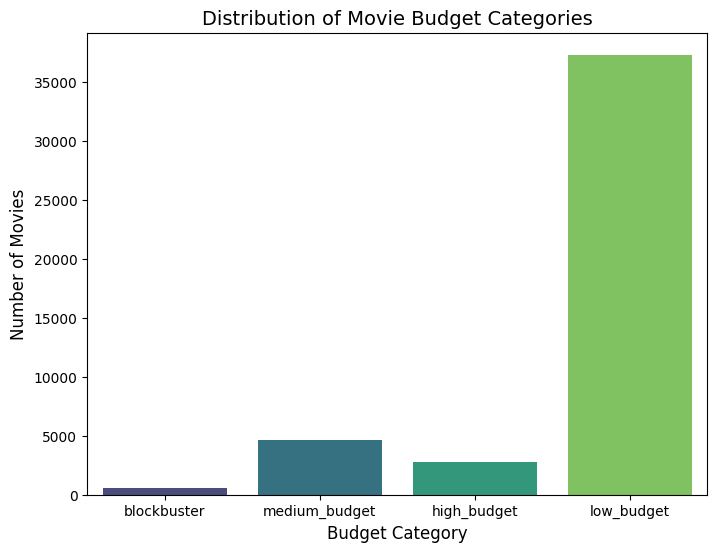

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=english_movies, x='budget_category', palette='viridis')

plt.title('Distribution of Movie Budget Categories', fontsize=14)
plt.xlabel('Budget Category', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.show()


### مجموعة بيانات الافلام 2

In [39]:
print(dfb.isna().sum())


tconst                   0
titleType                0
primaryTitle            20
originalTitle           20
isAdult                  1
startYear          1436206
endYear           11618952
runtimeMinutes     7872333
genres              521455
dtype: int64


In [40]:
for col in columns_to_check:
    print(f"\nColumn: {col}")
    print(dfb[col].dropna().unique())



Column: tconst
['tt0000001' 'tt0000002' 'tt0000003' ... 'tt9916852' 'tt9916856'
 'tt9916880']

Column: titleType
['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']

Column: primaryTitle
['Carmencita' 'Le clown et ses chiens' 'Poor Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: originalTitle
['Carmencita' 'Le clown et ses chiens' 'Pauvre Pierrot' ... 'Luc Janssens'
 "Horrid Henry's Comic Caper" 'Horrid Henry Knows It All']

Column: isAdult
[0.000e+00 1.000e+00 2.019e+03 1.981e+03 2.020e+03 2.017e+03 2.023e+03
 2.022e+03 2.011e+03 1.977e+03 1.978e+03 1.979e+03 1.966e+03 1.970e+03
 1.971e+03 1.972e+03 1.973e+03 1.974e+03 1.975e+03 1.988e+03 1.980e+03
 1.987e+03 1.986e+03 1.982e+03 1.985e+03 1.983e+03 1.984e+03 1.976e+03
 1.968e+03 1.969e+03 2.024e+03 1.967e+03 1.965e+03 1.958e+03 2.025e+03
 2.014e+03 2.005e+03]

Column: startYear
[1894. 1892. 1893. 1895. 1896. 1898. 1897. 

In [41]:
## عامودين ما بيلزمو
dfb = dfb.drop(columns=['isAdult', 'endYear'])


In [42]:
## فلترت انو بس بدي الافلام
dfb = dfb[dfb['titleType'] == 'movie'].reset_index(drop=True)

In [43]:
## عم طابق يلي موجود بالداتا التانية
dfb = dfb[dfb['tconst'].isin(dfr['tconst'])].reset_index(drop=True)


In [44]:
## عم شوف اذا في تكرار
dfb['tconst'].duplicated().sum()

np.int64(0)

In [45]:
dfb.shape

(332117, 7)

In [46]:
## 'primaryTitle' is in english
## 'originalTitle' in the original lang
## عم شوف الاختلاف بالمسمى
dfb['title_diff'] = dfb['primaryTitle'] != dfb['originalTitle']
print(dfb['title_diff'].value_counts())


title_diff
False    259325
True      72792
Name: count, dtype: int64


In [47]:
## عم شوف يلي مو انكليزي
non_english_titles = dfb[
    (dfb['primaryTitle'] != dfb['originalTitle']) &
    (dfb['originalTitle'].str.contains(r"[éèêëàâîïôùûç]", flags=re.IGNORECASE, na=False) |
     dfb['originalTitle'].str.contains(r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans)\b", flags=re.IGNORECASE, na=False))
]

# non_english_titles[['primaryTitle', 'originalTitle']]


/tmp/ipython-input-47-2880870646.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dfb['originalTitle'].str.contains(r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans)\b", flags=re.IGNORECASE, na=False))


In [48]:
## هون بس بدي خلي الافلام الانكليزية
## منتأكد أنو العنوان الأساسي يطابق العنوان الأصلي
non_english_letters = r"[éèêëàâîïôùûçäöüßñáíóúãõêčšž]"
non_english_words = r"\b(le|la|el|un|une|l'|de|des|du|en|et|avec|dans|" \
                    r"der|die|das|und|mit|für|von|auf|nicht|" \
                    r"del|los|las|por|con|sin|una|uno|" \
                    r"il|lo|la|gli|che|per|tra|fra|" \
                    r"и|на|не|что|это|как|с|по|из|у)\b"

dfb = dfb[
    (dfb['primaryTitle'] == dfb['originalTitle']) &
    (~dfb['originalTitle'].str.contains(non_english_letters, flags=re.IGNORECASE, na=False)) &
    (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))
].reset_index(drop=True)


/tmp/ipython-input-48-2673211226.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (~dfb['originalTitle'].str.contains(non_english_words, flags=re.IGNORECASE, na=False))


In [49]:
non_english_keywords = [
    'quo vadis', 'la dolce vita', 'la haine', 'le', 'la', 'el', 'una', 'un', 'der', 'die', 'das',
    'che', 'senza', 'avec', 'dans', 'sobre', 'del', 'de los', 'von', 'und', 'pour', 'tres',
    'sin', 'una', 'uno', 'l\'', 'du', 'des', 'di', 'en', 'au', 'sur', 'notte', 'giorno',
    'les', 'il', 'y', 'con', 'per', 'fra', 'entre'
]

pattern = '|'.join([rf'\b{word}\b' for word in non_english_keywords])

dfb = dfb[
    ~dfb['primaryTitle'].str.lower().str.contains(pattern, na=False) &
    ~dfb['originalTitle'].str.lower().str.contains(pattern, na=False)
].reset_index(drop=True)


In [50]:
dfb = dfb.drop(columns=['title_diff'])


In [51]:
dfb.shape

(224807, 7)

In [52]:
dfb.duplicated().sum()


np.int64(0)

In [53]:
## هلئ هون صار عنا بس افلام انكليزية صار بدي اتاكد اذا مافي تكرار لنفس الفيلم
## بناءا على 'primaryTitle' و 'originalTitle' و 'startYear' و 'genres'
dfb.duplicated(subset=['primaryTitle','originalTitle','startYear', 'genres']).sum()


np.int64(116)

In [54]:
duplicates = dfb[dfb.duplicated(subset=['primaryTitle','originalTitle', 'startYear', 'genres'], keep=False)]
duplicates.sort_values(by=['primaryTitle', 'startYear']).head(10)


,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres
102407,tt11500368,movie,2020,2020,2020.0,NaN,Documentary
113620,tt13424166,movie,2020,2020,2020.0,94,Documentary
179803,tt3463230,movie,37,37,2016.0,90,Drama
193723,tt4882174,movie,37,37,2016.0,85,Drama
25011,tt0069987,movie,A Doll's House,A Doll's House,1973.0,105,Drama
25012,tt0069988,movie,A Doll's House,A Doll's House,1973.0,106,Drama
159887,tt26680124,movie,After,After,2023.0,69,Drama
162688,tt27653078,movie,After,After,2023.0,18,Drama
126259,tt15440464,movie,Ajker Santan,Ajker Santan,1997.0,NaN,Drama
128984,tt1593635,movie,Ajker Santan,Ajker Santan,1997.0,NaN,Drama


In [55]:
## حذفتون
dfb = dfb.drop_duplicates(subset=['primaryTitle','originalTitle', 'startYear', 'genres']).reset_index(drop=True)


In [56]:
dfb.shape

(224691, 7)

In [57]:
## الانواع يلي ما بدي ياها

unwanted_genres = ['Reality-TV', 'News', 'Documentary', 'Biography', 'Adult',
                 'Game-Show', 'Short', 'Sport', 'music','Talk-Show']

mask = dfb['genres'].apply(
    lambda g: not any(genre.strip() in unwanted_genres for genre in str(g).split(','))
)

dfb = dfb[mask].reset_index(drop=True)


In [58]:
dfb.shape

(176284, 7)

In [59]:
print(dfb.isna().sum())


tconst                0
titleType             0
primaryTitle          0
originalTitle         0
startYear            25
runtimeMinutes    22346
genres             7274
dtype: int64


In [60]:
## حولتون
dfb['runtimeMinutes'] = pd.to_numeric(dfb['runtimeMinutes'], errors='coerce')
dfb = dfb[dfb['startYear'].notna() & dfb['runtimeMinutes'].notna()].reset_index(drop=True)


In [61]:
## الافلام يلي نوعا نان عملتا غير مصنف
dfb['genres'] = dfb['genres'].fillna('Unknown')


In [62]:
## حولتون
dfb['startYear'] = dfb['startYear'].astype(int)
dfb['runtimeMinutes'] = dfb['runtimeMinutes'].astype(int)


In [63]:
print(dfb.dtypes)


tconst            object
titleType         object
primaryTitle      object
originalTitle     object
startYear          int64
runtimeMinutes     int64
genres            object
dtype: object


In [64]:
## عم شوف اذا في سنين مو منطقية
print("Start year range:", dfb['startYear'].min(), "to", dfb['startYear'].max())


Start year range: 1894 to 2025


In [65]:
## حددت يلي بدي
weird_years = dfb[(dfb['startYear'] > 2025) | (dfb['startYear'] < 1900)]
print(weird_years[['originalTitle', 'startYear']])


  originalTitle  startYear
0    Miss Jerry       1894


In [66]:
## في اوقات مو منطقية متل 41 يوم
print("Min:", dfb['runtimeMinutes'].min())
print("Max:", dfb['runtimeMinutes'].max())


Min: 1
Max: 59460


In [67]:
## حددت يلي بدي
dfb = dfb[(dfb['runtimeMinutes'] >= 30) & (dfb['runtimeMinutes'] <= 300)].reset_index(drop=True)


In [68]:
## صنفتون
def categorize_runtime(minutes):
    if minutes < 75:
        return 'short'
    elif minutes <= 120:
        return 'standard'
    else:
        return 'long'

dfb['runtimeCategory'] = dfb['runtimeMinutes'].apply(categorize_runtime)


In [69]:
print(dfb['runtimeCategory'].value_counts())


runtimeCategory
standard    109196
short        22640
long         21867
Name: count, dtype: int64


In [70]:
## هلئ بقا دمجت عامود التقييم من الداتا التانية
dfb = dfb.merge(dfr[['tconst', 'averageRating']], on='tconst', how='left')


In [71]:
dfb.shape

(153703, 9)

In [72]:
## عملت فيتشر
dfb['movie_age'] = 2025 - dfb['startYear']


In [73]:
dfb['averageRating'].describe()


,averageRating
count,153703.000000
mean,5.893529
std,1.383326
min,1.000000
25%,5.000000
50%,6.000000
75%,6.800000
max,10.000000


In [74]:
## فيتشر جديدة
def rating_bucket(r):
    if r >= 8: return 'Excellent'
    elif r >= 6.5: return 'Good'
    elif r >= 5: return 'Average'
    else: return 'Poor'
dfb['rating_category'] = dfb['averageRating'].apply(rating_bucket)


## بيانات الممثلين

#### استخراج اسماء الممثلين

في بيانات imdb <br>
يوجد اربع مجموعات , يمكن ربطهم باستخدم المعرفات لاستخراج الممثلين و عدد افلامهم مع تقييم الفلامهم

In [ ]:
hanna1_df.head() # بيانات imdb

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,runtimeCategory,averageRating,movie_age,rating_category,age_group
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45,Romance,short,5.4,131,Average,100+ yrs
1,tt0000502,movie,Bohemios,Bohemios,1905,100,Unknown,standard,3.6,120,Poor,100+ yrs
2,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",standard,5.1,117,Average,100+ yrs
3,tt0001498,movie,The Battle of Trafalgar,The Battle of Trafalgar,1911,51,War,short,8.1,114,Excellent,100+ yrs
4,tt0001812,movie,Oedipus Rex,Oedipus Rex,1911,56,Drama,short,5.5,114,Average,100+ yrs


In [ ]:
ratings_df.head(2) # تقييم الفلم

,tconst,averageRating,numVotes
0,tt0000001,5.7,2165
1,tt0000002,5.5,296


In [ ]:
basics_df.head(2) # معلومات اضافية عن الفلم

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"


In [ ]:
principals_df.head(2) # معلومات اضافية عن الفلم

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N


In [ ]:
names_df.head(2) # اسماء الممثلين

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0027125,tt0025164"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"


In [ ]:
try:

    # --- Step 1: Prepare actor information from principals_df ---
    # Filter principals to include only actors/actresses
    actors_in_principals_df = principals_df[
        (principals_df['category'] == 'actor') |
        (principals_df['category'] == 'actress')
    ].copy()
    print(f"Filtered principals to actors/actresses only. Shape: {actors_in_principals_df.shape}")

    # Merge actor principals with names_df to get actor names
    # Select only necessary columns to keep the dataframe small before merging
    actor_names_map_df = pd.merge(
        actors_in_principals_df[['tconst', 'nconst']], # We only need tconst and nconst here
        names_df[['nconst', 'primaryName']],
        on='nconst',
        how='left'
    )
    print(f"Merged actor principals with names. Shape: {actor_names_map_df.shape}")

    # --- Step 2: Aggregate actors for each movie ---
    # Handle potential NaN values in 'primaryName' before combining
    actor_names_map_df['primaryName'] = actor_names_map_df['primaryName'].fillna('')

    # Aggregate all actor names for each movie into a single string, separated by " - "
    movie_actors_aggregated = actor_names_map_df.groupby('tconst')['primaryName'].apply(
        lambda x: ' - '.join(x.drop_duplicates()) # Use ' - ' as separator and drop duplicates
    ).reset_index()

    movie_actors_aggregated.rename(columns={'primaryName': 'actors_in_movie'}, inplace=True)
    print(f"Aggregated actors per movie. Shape: {movie_actors_aggregated.shape}")

    # --- Step 3: Final Merge with hanna1_df ---
    final_hanna_dataset = pd.merge(
        hanna1_df,
        movie_actors_aggregated,
        on='tconst',
        how='left' # Use left join to keep all movies from hanna1_df
    )
    print(f"Final merge complete. Final dataset shape: {final_hanna_dataset.shape}")

    print("\nFinal Merged Dataset (first 5 rows):")
    print(final_hanna_dataset.head())

    print("\nColumn information (dtypes and non-null counts):")
    print(final_hanna_dataset.info())

    print(f"\nNumber of unique movies in the final dataset: {final_hanna_dataset['tconst'].nunique()}")

except FileNotFoundError as e:
    print(f"Error: title.principals.tsv not found. Please ensure it is in the '{output_dir}' directory.")
    print(f"Missing file: {e}")
    print("Run the download script first to get all the necessary files.")
except pd.errors.EmptyDataError as e:
    print(f"Error: title.principals.tsv is empty. This might indicate an issue with the download or decompression.")
    print(f"Error details: {e}")
except Exception as e:
    print(f"An unexpected error occurred during data loading or merging: {e}")


Filtered principals to actors/actresses only. Shape: (38826524, 6)
Merged actor principals with names. Shape: (38826524, 3)
Aggregated actors per movie. Shape: (6369148, 2)
Final merge complete. Final dataset shape: (153443, 13)

Final Merged Dataset (first 5 rows):
      tconst titleType                    primaryTitle  \
0  tt0000009     movie                      Miss Jerry   
1  tt0000502     movie                        Bohemios   
2  tt0000679     movie  The Fairylogue and Radio-Plays   
3  tt0001498     movie         The Battle of Trafalgar   
4  tt0001812     movie                     Oedipus Rex   

                    originalTitle  startYear  runtimeMinutes  \
0                      Miss Jerry       1894              45   
1                        Bohemios       1905             100   
2  The Fairylogue and Radio-Plays       1908             120   
3         The Battle of Trafalgar       1911              51   
4                     Oedipus Rex       1911              56   


In [ ]:
final_hanna_dataset.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,runtimeCategory,averageRating,movie_age,rating_category,age_group,actors_in_movie
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45,Romance,short,5.4,131,Average,100+ yrs,Blanche Bayliss - William Courtenay - Chauncey...
1,tt0000502,movie,Bohemios,Bohemios,1905,100,Unknown,standard,3.6,120,Poor,100+ yrs,Antonio del Pozo - El Mochuelo
2,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",standard,5.1,117,Average,100+ yrs,L. Frank Baum - Frank Burns - George E. Wilson...
3,tt0001498,movie,The Battle of Trafalgar,The Battle of Trafalgar,1911,51,War,short,8.1,114,Excellent,100+ yrs,Sydney Booth - Herbert Prior - James Gordon - ...
4,tt0001812,movie,Oedipus Rex,Oedipus Rex,1911,56,Drama,short,5.5,114,Average,100+ yrs,Suzanne de Baere - Theo Frenkel


استخراج الممثلين من البيانات المجمعة


In [ ]:
# Make sure 'actors_in_movie' is a string type and fill NaN values with an empty string
final_hanna_dataset['actors_in_movie'] = final_hanna_dataset['actors_in_movie'].astype(str).fillna('')

# Filter out rows where 'actors_in_movie' is empty or 'nan' string
actors_present_df = final_hanna_dataset[final_hanna_dataset['actors_in_movie'] != ''].copy()
actors_present_df = actors_present_df[actors_present_df['actors_in_movie'] != 'nan'].copy() # Handle 'nan' string if present

if actors_present_df.empty:
    print("No movies with actor information found in final_hanna_df. Cannot create actors_hanna_df.")
    actors_hanna_df = pd.DataFrame(columns=['actor', 'rating', 'movie']) # Create empty DataFrame with desired columns
else:
    # 1. Split the 'actors_in_movie' string into a list of actors
    # 2. Explode the DataFrame to create a new row for each actor
    actors_hanna_df = actors_present_df.assign(actor=actors_present_df['actors_in_movie'].str.split(' - ')).explode('actor')

    # Remove leading/trailing whitespace from actor names
    actors_hanna_df['actor'] = actors_hanna_df['actor'].str.strip()

    # Now, select the desired columns directly
    actors_hanna_df = actors_hanna_df[['actor', 'averageRating', 'primaryTitle']].copy()

    # Rename columns for clarity as per your request
    actors_hanna_df.rename(columns={
        'averageRating': 'rating',
        'primaryTitle': 'movie'
    }, inplace=True)

    print(f"\nactors_hanna_df created. Shape: {actors_hanna_df.shape}")
    print("\nactors_hanna_df (first 5 rows):")
    print(actors_hanna_df.head())

    print("\nUnique actors extracted:")
    print(actors_hanna_df['actor'].nunique())


actors_hanna_df created. Shape: (1383237, 3)

actors_hanna_df (first 5 rows):
               actor  rating       movie
0    Blanche Bayliss     5.4  Miss Jerry
0  William Courtenay     5.4  Miss Jerry
0     Chauncey Depew     5.4  Miss Jerry
1   Antonio del Pozo     3.6    Bohemios
1        El Mochuelo     3.6    Bohemios

Unique actors extracted:
541408


In [ ]:
actors_hanna_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1383237 entries, 0 to 153442
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   actor   1383237 non-null  object 
 1   rating  1383237 non-null  float64
 2   movie   1383237 non-null  object 
dtypes: float64(1), object(2)
memory usage: 42.2+ MB


In [ ]:
# actors_hanna_df=actors_names_df
# actors_hanna_df.info()

#### اسناد تقييم عام لافلام الممثلين




---

لقد قمنا بتطوير ثلاث طرق مختلفة للحصول على تقييم يمثل الممثل بشكل أكثر عدلاً ودقة:
1.  المتوسط البسيط لتقييم الممثلين
2. المتوسط البيزي (Bayesian Average)
3. تقييم مع العقوبة على قلة عدد الأصوات (Vote-Count Penalty)

---



In [ ]:
if actors_hanna_df.empty:
    print("actors_hanna_df is empty. Cannot create actors_rating_hanna_df.")
    actors_rating_hanna_df = pd.DataFrame(columns=[
        'actor', 'num_movies', 'average_rating', 'bayesian_avg_rating', 'penalty_avg_rating',
        'top_movie_name', 'top_movie_rating'
    ])
else:
    # Merge vote_count for each movie
    actors_hanna_df = actors_hanna_df.merge(
        leen_movies_df[['title', 'vote_count']],
        left_on='movie',
        right_on='title',
        how='left'
    )

    # Calculate global average for Bayesian smoothing
    global_avg = actors_hanna_df['rating'].mean()
    C = 5  # You can tune this value

    def get_actor_statistics(group):
        num_movies = group['movie'].count()
        avg_rating = group['rating'].mean()

        idx_top_movie = group['rating'].idxmax()
        top_movie_name = group.loc[idx_top_movie, 'movie']
        top_movie_rating = group.loc[idx_top_movie, 'rating']

        # Bayesian
        sum_ratings = group['rating'].sum()
        bayesian_avg = (C * global_avg + sum_ratings) / (C + num_movies)

        # Penalty system: sum all vote counts
        total_votes = group['vote_count'].sum()

        # Decide penalty divisor based on total votes
        # تم تحديد الحدود عبر تحليل اعداد الاصوات
        if pd.isna(total_votes):
            divisor = 4
        elif total_votes < 10:
            divisor = 4
        elif total_votes < 31:
            divisor = 3
        elif total_votes < 101:
            divisor = 2
        else:
            divisor = 1

        # Apply penalty on the average rating
        penalty_avg = avg_rating / divisor

        return pd.Series({
            'num_movies': num_movies,
            'average_rating': round(avg_rating, 2),
            'bayesian_avg_rating': round(bayesian_avg, 2),
            'penalty_avg_rating': round(penalty_avg, 2),
            'top_movie_name': top_movie_name,
            'top_movie_rating': round(top_movie_rating, 1)
        })

    actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()

    print(f"\nactors_rating_hanna_df created. Shape: {actors_rating_hanna_df.shape}")
    print("\nactors_rating_hanna_df:")
    print(actors_rating_hanna_df[['actor', 'num_movies', 'average_rating',
                                  'bayesian_avg_rating', 'penalty_avg_rating',
                                  'top_movie_name', 'top_movie_rating']])



actors_rating_hanna_df created. Shape: (541408, 7)

actors_rating_hanna_df:
                        actor  num_movies  average_rating  \
0                                      21            5.95   
1                     $2 Tony           1            5.40   
2                    'Ana Ika           1            5.30   
3          'Angry' Joe Cleary           1            9.00   
4              'Anissa LaShay           1            6.60   
...                       ...         ...             ...   
541403           Þór Tulinius           1            3.70   
541404            Þóra Dungal           1            4.50   
541405  Þórhallur Þórhallsson           2            7.75   
541406        Þórir Waagfjörð           1            5.20   
541407         þórður Bogason           1            4.50   

        bayesian_avg_rating  penalty_avg_rating               top_movie_name  \
0                      5.93                1.49           Wally Meets Popeye   
1                      5.78   

/tmp/ipython-input-62-600928831.py:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  actors_rating_hanna_df = actors_hanna_df.groupby('actor').apply(get_actor_statistics).reset_index()


In [ ]:
actors_rating_hanna_df.head()

,actor,num_movies,average_rating,bayesian_avg_rating,penalty_avg_rating,top_movie_name,top_movie_rating
0,$2 Tony,1,5.40,5.78,1.35,Spacebong Beach Babes,5.4
1,'Ana Ika,1,5.30,5.77,1.32,It Only Takes a Night,5.3
2,'Angry' Joe Cleary,1,9.00,6.38,2.25,A Joyce Story,9.0
3,'Anissa LaShay,1,6.60,5.98,1.65,"Two's A Couple, 3's A Crowd",6.6
4,'Baby' Carmen De Rue,6,5.42,5.62,1.35,Going Straight,5.9


In [ ]:
print(actors_rating_hanna_df[['average_rating', 'bayesian_avg_rating', 'penalty_avg_rating']].describe())

       average_rating  bayesian_avg_rating  penalty_avg_rating
count   541408.000000        541408.000000       541408.000000
mean         5.855979             5.853307            2.001699
std          1.365485             0.314547            1.424743
min          1.000000             3.080000            0.250000
25%          5.000000             5.670000            1.300000
50%          5.900000             5.870000            1.580000
75%          6.700000             6.050000            1.900000
max         10.000000             8.370000            9.800000


In [ ]:
actors_rating_hanna_df['num_movies'].describe()

,num_movies
count,541360.000000
mean,2.555035
std,5.978147
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,520.000000


#### دعنا نرى ان امكن لنا ان نستفاد من مجموعة البيانات الثانية لاثراء هذه الميزة

In [ ]:
actors_df_kaggle.head()

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664


In [ ]:

value = 'Al Pacino'
actors_df_kaggle[actors_df_kaggle['Actor'] == value]

,Actor,ActorID,Film,Year,Votes,Rating,FilmID
8521,Al Pacino,nm0000199,Once Upon a Time... In Hollywood,2019,569358,7.6,tt7131622
8522,Al Pacino,nm0000199,The Irishman,2019,333018,7.8,tt1302006
8523,Al Pacino,nm0000199,Hangman,2017,14970,5.3,tt3011960
8524,Al Pacino,nm0000199,The Pirates of Somalia,2017,9012,6.8,tt5126922
8525,Al Pacino,nm0000199,Misconduct,2016,15136,5.3,tt3658772
8526,Al Pacino,nm0000199,Danny Collins,2015,30170,7.0,tt1772288
8527,Al Pacino,nm0000199,Manglehorn,2014,7220,5.6,tt2893490
8528,Al Pacino,nm0000199,The Humbling,2014,6425,5.6,tt1568343
8529,Al Pacino,nm0000199,Salome,2013,1704,6.5,tt3112900
8530,Al Pacino,nm0000199,We're No Animals,2013,540,5.1,tt1859476


In [ ]:

# Assuming your original dataframe is called df
avg_rating_df = actors_df_kaggle.groupby('Actor')['Rating'].mean().reset_index()

# Optionally, rename the 'Rating' column to something like 'AvgRating'
avg_rating_df.rename(columns={'Rating': 'AvgRating'}, inplace=True)

print(avg_rating_df.tail())



                  Actor  AvgRating
9610    Zooey Deschanel   6.380000
9611        Zosia Mamet   5.937500
9612      Zsa Zsa Gabor   5.846154
9613        Zulay Henao   4.957143
9614  Zuleikha Robinson   6.100000


In [ ]:
avg_rating_df=avg_rating_df.drop(columns='Actor_lower')


In [ ]:
avg_rating_df

,Actor,AvgRating
0,50 Cent,5.579167
1,A Martinez,5.710000
2,A.J. Buckley,5.480769
3,A.J. Cook,5.569231
4,A.J. Langer,5.150000
...,...,...
9610,Zooey Deschanel,6.380000
9611,Zosia Mamet,5.937500
9612,Zsa Zsa Gabor,5.846154
9613,Zulay Henao,4.957143


In [ ]:
print("\n--- Step 1: Normalize Actor Names for Matching ---")

# Create a temporary normalized actor name column in actors_rating_hanna_df
actors_rating_hanna_df['actor_normalized'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

# Create a temporary normalized actor name column in avg_rating_df
avg_rating_df['actor_normalized'] = avg_rating_df['Actor'].str.lower().str.replace(r'\s+', '', regex=True)

print("\nNormalized Actor Names (samples):")
print("actors_rating_hanna_df['actor_normalized'] samples:", actors_rating_hanna_df['actor_normalized'].head().tolist())
print("avg_rating_df['actor_normalized'] samples:", avg_rating_df['actor_normalized'].head().tolist())


print("\n--- Step 2: Check Common Actors (based on normalized names) ---")

# Get unique normalized actor names from both DataFrames
hanna_actors_set = set(actors_rating_hanna_df['actor_normalized'].unique())
avg_actors_set = set(avg_rating_df['actor_normalized'].unique())

# Find common actors
common_actors = hanna_actors_set.intersection(avg_actors_set)

print(f"\nNumber of unique actors in actors_rating_hanna_df: {len(hanna_actors_set)}")
print(f"Number of unique actors in avg_rating_df: {len(avg_actors_set)}")
print(f"Number of common actors found: {len(common_actors)}")
print("\nCommon actors (normalized names, first 10 if many):")
if common_actors:
    for i, actor in enumerate(list(common_actors)):
        if i >= 10:
            print("...")
            break
        print(actor)
else:
    print("No common actors found between the two DataFrames based on normalized names.")


--- Step 1: Normalize Actor Names for Matching ---

Normalized Actor Names (samples):
actors_rating_hanna_df['actor_normalized'] samples: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
avg_rating_df['actor_normalized'] samples: ['50cent', 'amartinez', 'a.j.buckley', 'a.j.cook', 'a.j.langer']

--- Step 2: Check Common Actors (based on normalized names) ---

Number of unique actors in actors_rating_hanna_df: 540984
Number of unique actors in avg_rating_df: 9615
Number of common actors found: 8992

Common actors (normalized names, first 10 if many):
haroldlloyd
sheridansmith
debramessing
brandynorwood
jeffwahlberg
hughlaurie
dwightschultz
bobsaget
jayedavidson
bradhall
...


بقراءة لهذه الاحصائيات : <br>
* Number of unique actors in actors_rating_hanna_df: 540984
* Number of unique actors in avg_rating_df: 9615
* Number of common actors found: 8992
<br>
يجد ان استخدام البيانات الثانية هو مضيعة للوقت كونها اصغر و تتشارك بنسبة كبيرة بين الممثيلن

In [ ]:
leen_movies_df['credits']

,credits
0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...
1,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...
2,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...
3,Anthony Ramos-Dominique Fishback-Luna Lauren V...
4,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...
...,...
41394,Richard Talmadge-Barbara Bedford-Nora Cecil-Da...
41395,Nick Holmes-Greg Mackintosh-Aaron Aedy-Steve E...
41396,Steve Hudson
41397,Mensun Bound-John Shears-Nicolas Vincent-Dan S...


#### دمج بيانات الممثلين مع الافلام

In [ ]:


# 1️⃣ Normalize actor names in actors_rating_hanna_df for lookup
actors_rating_hanna_df['actor_normalized_for_lookup'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)

# 2️⃣ Create dictionaries for fast lookups for all three ratings
actor_avg_rating_map = pd.Series(
    actors_rating_hanna_df['average_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_bayes_rating_map = pd.Series(
    actors_rating_hanna_df['bayesian_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

actor_penalty_rating_map = pd.Series(
    actors_rating_hanna_df['penalty_avg_rating'].values,
    index=actors_rating_hanna_df['actor_normalized_for_lookup']
).to_dict()

print("\n--- Prepared actors_rating_hanna_df and Lookup Maps ---")
print("Sample normalized actor names from hanna_df:", actors_rating_hanna_df['actor_normalized_for_lookup'].head().tolist())
print("Size of actor_avg_rating_map:", len(actor_avg_rating_map))

# 3️⃣ Normalize credits in leen_movies_df
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

# 4️⃣ Helper to compute mean of ratings for given actors
def get_avg_for_metric(normalized_actors_list, rating_map):
    found_ratings = [
        rating_map[actor_name_normalized]
        for actor_name_normalized in normalized_actors_list
        if actor_name_normalized in rating_map
    ]
    return round(np.mean(found_ratings), 2) if found_ratings else np.nan

# 5️⃣ Apply to get all three metrics
leen_movies_df['actors_avg_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_avg_rating_map)
)

leen_movies_df['actors_bayesian_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_bayes_rating_map)
)

leen_movies_df['actors_penalty_rating'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_avg_for_metric(x, actor_penalty_rating_map)
)

print("\n--- Final leen_movies_df with actor ratings ---")
print(leen_movies_df[['title', 'actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].head(10))

# 6️⃣ Clean up temporary columns
print("\n--- Cleaning up temporary columns ---")
leen_movies_df.drop(columns=['normalized_credits_list'], inplace=True)
actors_rating_hanna_df.drop(columns=['actor_normalized_for_lookup'], inplace=True)

print("\n--- Cleaned leen_movies_df (final look) ---")
print(leen_movies_df.head())
print("\nleen_movies_df info:")
print(leen_movies_df.info())



--- Prepared actors_rating_hanna_df and Lookup Maps ---
Sample normalized actor names from hanna_df: ['', '$2tony', "'anaika", "'angry'joecleary", "'anissalashay"]
Size of actor_avg_rating_map: 541032

--- Final leen_movies_df with actor ratings ---
                                 title  actors_avg_rating  \
0                    Meg 2: The Trench               5.48   
1                  The Pope's Exorcist               5.75   
2                 Deadpool & Wolverine               6.08   
3     Transformers: Rise of the Beasts               6.05   
4                       Dune: Part Two               5.88   
5                Venom: The Last Dance               6.05   
6    Ant-Man and the Wasp: Quantumania               6.00   
7                            Creed III               6.13   
8              Insidious: The Red Door               5.80   
9  Spider-Man: Across the Spider-Verse               5.98   

   actors_bayesian_rating  actors_penalty_rating  
0                    5.74 

In [ ]:
print(leen_movies_df[['actors_avg_rating', 'actors_bayesian_rating', 'actors_penalty_rating']].describe())



       actors_avg_rating  actors_bayesian_rating  actors_penalty_rating
count       39370.000000            39370.000000           39370.000000
mean            5.673681                5.801008               4.092746
std             0.652138                0.285929               1.353377
min             1.300000                3.510000               0.320000
25%             5.390000                5.650000               3.250000
50%             5.800000                5.840000               4.350000
75%             6.080000                6.000000               5.090000
max             9.680000                7.600000               9.100000


In [ ]:
leen_movies_df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,credits,tagline_sentiment,profit,release_year,release_month,release_day,unique_actors_count,actors_avg_rating,actors_bayesian_rating,actors_penalty_rating
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,0,2.230565e+08,2023,8,2,27,5.48,5.74,5.10
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,1,4.767582e+07,2023,4,5,30,5.75,5.83,4.45
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,0,1.126387e+09,2024,7,24,57,6.08,6.03,4.97
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,Anthony Ramos-Dominique Fishback-Luna Lauren V...,0,2.070455e+08,2023,6,6,38,6.05,5.93,4.84
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,-1,4.938137e+08,2024,2,27,105,5.88,5.90,3.81


In [ ]:
leen_movies_df.columns

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'tagline_sentiment', 'profit', 'release_year', 'release_month',
       'release_day', 'unique_actors_count', 'actors_avg_rating',
       'actors_bayesian_rating', 'actors_penalty_rating'],
      dtype='object')

#### تحليل الافلام التي لاتحمل تقييم للممثلين فيها

In [ ]:
missing_actor_rating=leen_movies_df[leen_movies_df['actors_avg_rating'].isna()]
missing_actor_rating['budget'].describe()

,budget
count,2.029000e+03
mean,2.064858e+04
std,2.760088e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+07


In [ ]:
llist=missing_actor_rating['credits'].sample(20).tolist()
llist

['Paul Fronczak',
 'Curt Chaplin-Barry Bonds-Mike Scioscia-Tim Salmon-Dusty Baker-Kenny Lofton-David Eckstein-John Lackey',
 'Simon Rattle-Anne-Sophie Mutter',
 'Pat Marcattilio',
 'John Izzard-J.R.R. Tolkien-Barbara Hepworth',
 'Keith Jarrett',
 'Ciarán Williams Young-Sapphira O’Connor-Samuel Spivey-Megan Whitehead-Chloe Asquith Brown-Noah Dolan',
 'Colin Montgomerie-Corey Pavin-Lee Westwood-Martin Kaymer-Graeme McDowell-Jim Furyk-Ian Poulter-Steve Stricker-Ross Fisher-Miguel Ángel Jiménez',
 'Timothy "Speed" Levitch',
 'Doris Eagle-Thurman Horse-Michael Little Boy-Rita Little Boy',
 'Julian Bayliss-Simon Willcock-Gabriela Bittencourt-Hermenegildo Matimele-Ara Monadjem',
 'Jon Ayres-Rhys Palmer-Heikki Tolonen',
 'Augie DeAngelo',
 'Kristin Luna-Scott van Velsor-JUURI-Jenny Ustick-Paris Woodhull-Nicole Salgar-Cymone Wilder-Sarah Painter-Kim Radford-Whitney Herrington-Wanda Sobieski-John Sellers-Sara Beth Urban-Melissa Shuran-Colin Shuran',
 'Sean D. Ross-Ayla Kempler-Elaine Kempler',
 


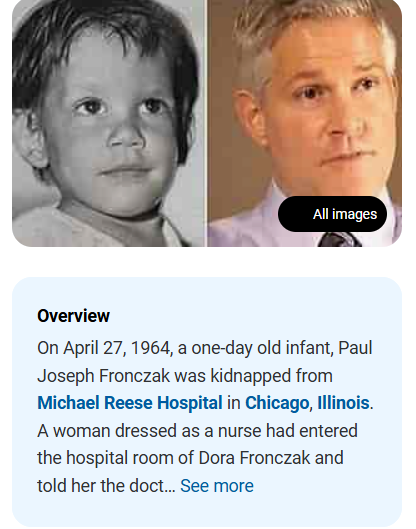

بعض هؤلاء ليسوا ممثلين اصلا !

لنحلل اكثر , دعنا نرى السمات الرئيسية

In [ ]:
missing_actor_rating=missing_actor_rating.drop(columns=['overview','popularity','release_date','budget','status', 'tagline', 'vote_average', 'vote_count','release_day', 'unique_actors_count', 'actors_avg_rating'])

In [ ]:
missing_actor_rating.head(5)

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
2445,923632,The Tinder Swindler,Documentary-Crime,en,RAW-Gaspin Media-AGC Studios,0.0,114.0,Shimon Yehuda Hayut-Cecilie Fjellhøy-Pernilla ...,1,0.0,2022,2
4064,489988,Three Identical Strangers,Documentary,en,Channel 4 Television-RAW,1041955.0,97.0,David Kellman-Robert Shafran-Edward Galland-La...,1,1041955.0,2018,6
4296,789371,Kings Of Astoria,Crime-Drama,en,Davi Productions,0.0,105.0,Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa,0,-5000.0,2022,6
4559,1776,Jesus Camp,Documentary,en,A&E IndieFilms-Loki Films,1013596.0,84.0,Becky Fischer-Mike Papantonio-Ted Haggard-Lou ...,0,1013596.0,2006,9
4691,675776,Persona,Thriller-Romance,en,FILOMINATI,0.0,75.0,Nick Cause-Angelina Mosesova,-1,0.0,2022,10


In [ ]:

documentary_count = missing_actor_rating['genres'].str.contains('Documentary', na=False).sum()

print(f"Number of movies in missing_actor_rating with 'Documentary' genre: {documentary_count}")


Number of movies in missing_actor_rating with 'Documentary' genre: 1385


حسنا , اغليبتهم وئاقيات , دعنا نتخلص منها

In [ ]:
# prompt: drop entries where missing_actor_rating['genres'] contains Documentary

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'genres' column contains the string 'Documentary'
# The '~' inverts the boolean mask. na=False treats NaN values as not containing 'Documentary'.
missing_actor_rating = missing_actor_rating[~missing_actor_rating['genres'].str.contains('Documentary', na=False)].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping Documentary: {missing_actor_rating.shape}")
print(f"Number of rows dropped (Documentary genre): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping Documentary (first 5 rows):")

In [ ]:
missing_actor_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 4296 to 41377
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    644 non-null    int64  
 1   title                 644 non-null    object 
 2   genres                644 non-null    object 
 3   original_language     644 non-null    object 
 4   production_companies  644 non-null    object 
 5   revenue               644 non-null    float64
 6   runtime               644 non-null    float64
 7   credits               644 non-null    object 
 8   tagline_sentiment     644 non-null    int64  
 9   profit                644 non-null    float64
 10  release_year          644 non-null    int64  
 11  release_month         644 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 65.4+ KB


In [ ]:
missing_actor_rating.head(5)

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
4296,789371,Kings Of Astoria,Crime-Drama,en,Davi Productions,0.0,105.0,Giuseppe Davi-Giacomo Davi-Sal Davi-Erica Rosa,0,-5000.0,2022,6
4691,675776,Persona,Thriller-Romance,en,FILOMINATI,0.0,75.0,Nick Cause-Angelina Mosesova,-1,0.0,2022,10
5800,787282,Beyond: The Motion Picture,Science Fiction,en,Innovative Arts-Underdog Pictures-Jackson Motion,0.0,91.0,Lukas Jackson-Marius Johnsson-Sander R. D. Lar...,1,-500.0,2023,11
6221,963804,Cascade,Music-Romance-Drama,en,Ultraviolet Productions,0.0,40.0,James Seed-Paige Hurrell-Kalvin Taylor-Delaney...,0,-400.0,2022,6
6225,950120,Acidic Anna,Horror-Thriller,en,Space Czech Films,0.0,73.0,Thomas Cam-Dasha Diviskova-Dimitrah Vlad-Stell...,-1,-1000.0,2022,6


In [ ]:
missing_actor_rating['profit'].describe()

,profit
count,6.440000e+02
mean,1.522974e+05
std,3.941098e+06
min,-1.000000e+06
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,9.999900e+07


In [ ]:
(missing_actor_rating['revenue']==0).sum()

np.int64(604)

بعضعهم لم يأتو باي ارادات , و هذا يمكن ان يفسر بانها قيم مفقودة او انها افلام <br>
straight to dvd

In [ ]:
# prompt: drop entires where missing_actor_rating['revenue']==0

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'revenue' column is exactly 0
missing_actor_rating = missing_actor_rating[missing_actor_rating['revenue'] != 0].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping rows with revenue == 0: {missing_actor_rating.shape}")
print(f"Number of rows dropped (revenue == 0): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping revenue == 0 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()

Initial shape of missing_actor_rating: (644, 12)
Shape of missing_actor_rating after dropping rows with revenue == 0: (40, 12)
Number of rows dropped (revenue == 0): 604

missing_actor_rating after dropping revenue == 0 (first 5 rows):
           id                title                 genres original_language  \
6289   949273  TacoTown: The Movie        Thriller-Comedy                en   
19463  711615           Batman Jr.                 Action                en   
21801  896605            Slay Ride  Comedy-Horror-Mystery                en   
28271  672815   ALL COPS AIN'T BAD                 Comedy                en   
29094  748806             Brothers                  Drama                en   

               production_companies   revenue  runtime  \
6289               TacoTales Movies       1.0     50.0   
19463                         TOCCU    1700.0    116.0   
21801  McLean & Cipullo Productions    2000.0     60.0   
28271                  VH2 Networks  350000.0     61.0   

In [ ]:
missing_actor_rating.sample(5)

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
40679,817809,Come Forth Reverend,Action-Thriller,en,Luckee Films,28.0,39.0,Coleton McCants-Gavin Ryan-Gavin Robbins-Culle...,0,26.0,2021,1
21801,896605,Slay Ride,Comedy-Horror-Mystery,en,McLean & Cipullo Productions,2000.0,60.0,Collin McLean-Dominic Cipullo-Trey Gourgeot-No...,1,-3001.0,2022,6
29914,742459,Sosha,Comedy-Romance,en,LIM STUDIO-STONMEDIA,1800.0,50.0,Lebogang Lebang-Themba Nene-Lebo Lebang-Mbalen...,0,0.0,2022,11
39793,709456,Miss Gangster,Drama-Romance,en,CJ HK Entertainment,486842.0,92.0,Nguyễn Minh Tú-Cao Thiên Trang-Hồng Đào-Chế Ng...,1,486842.0,2019,11
40458,895937,Jorja Smith - Live at Glastonbury,Music,en,BBC,100.0,56.0,Jorja Smith,0,0.0,2019,6


In [ ]:
(missing_actor_rating['runtime'] < 60).sum()

np.int64(17)

بعضهم ليسوا افلام اصلاً

In [ ]:
# prompt: drop these (missing_actor_rating['runtime'] < 60)

# Check the initial size of the DataFrame
initial_rows = missing_actor_rating.shape[0]
print(f"Initial shape of missing_actor_rating: {missing_actor_rating.shape}")

# Drop rows where the 'runtime' column is less than 60
missing_actor_rating = missing_actor_rating[~(missing_actor_rating['runtime'] < 60)].copy()

# Check the size after dropping
final_rows = missing_actor_rating.shape[0]
dropped_rows = initial_rows - final_rows

print(f"Shape of missing_actor_rating after dropping rows with runtime < 60: {missing_actor_rating.shape}")
print(f"Number of rows dropped (runtime < 60): {dropped_rows}")

# Display the first few rows of the modified DataFrame
print("\nmissing_actor_rating after dropping runtime < 60 (first 5 rows):")
print(missing_actor_rating.head())
print("\nmissing_actor_rating info:")
missing_actor_rating.info()


Initial shape of missing_actor_rating: (40, 12)
Shape of missing_actor_rating after dropping rows with runtime < 60: (23, 12)
Number of rows dropped (runtime < 60): 17

missing_actor_rating after dropping runtime < 60 (first 5 rows):
           id                   title                 genres  \
19463  711615              Batman Jr.                 Action   
21801  896605               Slay Ride  Comedy-Horror-Mystery   
28271  672815      ALL COPS AIN'T BAD                 Comedy   
30770  591660  ROW Ladies Night Out 4           Action-Drama   
30960  587961  Queens of Combat QOC 2           Action-Drama   

      original_language          production_companies   revenue  runtime  \
19463                en                         TOCCU    1700.0    116.0   
21801                en  McLean & Cipullo Productions    2000.0     60.0   
28271                en                  VH2 Networks  350000.0     61.0   
30770                en          Reality Of Wrestling    6555.0    147.0   
3

In [ ]:
missing_actor_rating

,id,title,genres,original_language,production_companies,revenue,runtime,credits,tagline_sentiment,profit,release_year,release_month
19463,711615,Batman Jr.,Action,en,TOCCU,1700.0,116.0,Nicholas Onciul-Zachary Onciul-Samantha Onciul,0,-3800.0,2017,4
21801,896605,Slay Ride,Comedy-Horror-Mystery,en,McLean & Cipullo Productions,2000.0,60.0,Collin McLean-Dominic Cipullo-Trey Gourgeot-No...,1,-3001.0,2022,6
28271,672815,ALL COPS AIN'T BAD,Comedy,en,VH2 Networks,350000.0,61.0,Daryll Triplett,0,250000.0,2020,2
30770,591660,ROW Ladies Night Out 4,Action-Drama,en,Reality Of Wrestling,6555.0,147.0,Alex Gracia-Vannarah Riggs-Kiera Hogan-Iveliss...,0,2178.0,2018,11
30960,587961,Queens of Combat QOC 2,Action-Drama,en,Queens Of Combat-HighSpots,5495.0,120.0,Amy Jefferson-Christina Garibaldi-Rachel Barri...,-1,0.0,2014,6
32132,591658,ROW Ladies Night Out 3,Action-Drama,en,Reality Of Wrestling,9885.0,122.0,Ivelisse Vélez-Kiera Hogan-Shojo Machiko-Calle...,0,1997.0,2018,8
32210,587980,Queens Of Combat QOC 12,Action-Drama,en,Queens Of Combat,13230.0,78.0,Dominique Fabiano-Taeler Conrad-Mellen-Tessa B...,-1,0.0,2016,5
33430,588002,Queens Of Combat QOC 22,Action-Drama,en,Queens Of Combat,8999.0,90.0,Kiera Hogan-Olivia Hasler-Madi Maxx-Renee Mich...,-1,2277.0,2018,3
33765,591659,ROW Ladies Night Out II,Action-Drama,en,Reality Of Wrestling,8900.0,123.0,Callee Wilkerson-Patricia Parker-Ivelisse Véle...,0,4956.0,2018,5
34181,588007,Queens Of Combat QOC 25,Action-Drama,en,Queens Of Combat,11221.0,88.0,Xia Henderson-Olivia Hasler-Priscilla Zuniga-V...,-1,1231.0,2018,5


هنا نرى افلام وئاقية و لكنها لم تصنف انها وثائقية , و نرى بعض عروض المصارعة

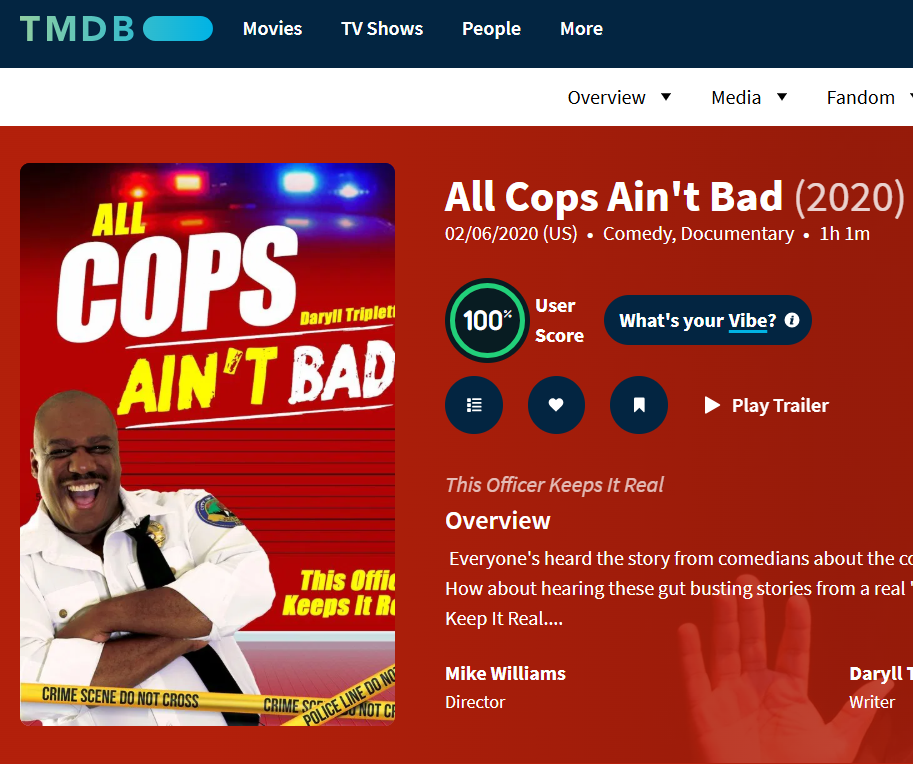

لذلك سوف نقوم بحذفهم من البيانات الاصلية

## الاوسكار
---
features that will add more favouritism to movies/actors  
ميزات ستضيف تميز اكثر للممثلين والافلام


---
#### سمة الاوسكار للافلام
---

In [ ]:

#  Normalize titles for matching
def normalize_title(title):
    if pd.isna(title):
        return ""
    title = title.lower()
    title = re.sub(r'[^a-z0-9]', '', title)  # remove non-alphanumeric
    return title

oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)
leen_movies_df['normalized_title'] = leen_movies_df['title'].apply(normalize_title)

# ✨ Find intersection
matched_movies = leen_movies_df['normalized_title'].isin(oscars_df['normalized_film'])
num_matched_movies = matched_movies.sum()

print(f"matched movies :  {num_matched_movies}")


matched movies :  3097


In [ ]:
# ✨ Create map from normalized title to highest oscar status
# 0: not nominated, 1: nominated, 2: winner

# First compute status per movie
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# Get highest status per film
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# Map status to leen_movies_df
def get_movie_oscar_status(normalized_title, oscar_map):
    return oscar_map.get(normalized_title, 0)

leen_movies_df['movie_oscar'] = leen_movies_df['normalized_title'].apply(
    lambda x: get_movie_oscar_status(x, oscar_movie_status)
)

print("\n--- movie_oscar ---")
print(leen_movies_df[['title', 'movie_oscar']].head(10))



--- movie_oscar ---
                                 title  movie_oscar
0                    Meg 2: The Trench            0
1                  The Pope's Exorcist            0
2                 Deadpool & Wolverine            0
3     Transformers: Rise of the Beasts            0
4                       Dune: Part Two            2
5                Venom: The Last Dance            0
6    Ant-Man and the Wasp: Quantumania            0
7                            Creed III            0
8              Insidious: The Red Door            0
9  Spider-Man: Across the Spider-Verse            1


In [ ]:
leen_movies_df['movie_oscar'].value_counts()

,count
movie_oscar,
0,38302
1,2109
2,988


### سمة اوسكار لكادر الفلم

In [ ]:

# 🟣 لديك بالفعل هذا الـ normalize_and_split_credits:
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

leen_movies_df['normalized_credits_list'] = leen_movies_df['credits'].apply(normalize_and_split_credits)

# 🟣 Normalize names في oscars_df
oscars_df['normalized_name'] = oscars_df['name'].apply(lambda x: re.sub(r'[^a-z0-9]', '', x.lower()) if pd.notna(x) else "")

# 🟣 حساب حالة الأوسكار لكل شخص
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# 🟣 عمل خريطة: الاسم → أعلى حالة أوسكار
oscar_person_status = oscars_df.groupby('normalized_name')['winner_numeric'].max().to_dict()

# 🟣 دالة لتحديد حالة الأوسكار لأسماء الفيلم كلها
def get_movie_credits_oscar_status(credits_list, oscar_map):
    found_statuses = [
        oscar_map[name]
        for name in credits_list
        if name in oscar_map
    ]
    if not found_statuses:
        return 0
    else:
        return max(found_statuses)  # إذا هناك أكثر من شخص، خذ أعلى حالة (2 > 1 > 0)

# 🟣 طبق على الأفلام
leen_movies_df['movie_credits_oscar'] = leen_movies_df['normalized_credits_list'].apply(
    lambda x: get_movie_credits_oscar_status(x, oscar_person_status)
)

# 🟣 عرض عينة
print("\n---  movie_credits_oscar ---")
print(leen_movies_df[['title', 'movie_credits_oscar']].head(10))



---  movie_credits_oscar ---
                                 title  movie_credits_oscar
0                    Meg 2: The Trench                    0
1                  The Pope's Exorcist                    2
2                 Deadpool & Wolverine                    2
3     Transformers: Rise of the Beasts                    2
4                       Dune: Part Two                    2
5                Venom: The Last Dance                    1
6    Ant-Man and the Wasp: Quantumania                    2
7                            Creed III                    0
8              Insidious: The Red Door                    1
9  Spider-Man: Across the Spider-Verse                    2


In [ ]:
leen_movies_df['movie_credits_oscar'].value_counts()

,count
movie_credits_oscar,
0,25255
2,9838
1,6306


In [ ]:
leen_movies_df

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,...,release_month,release_day,unique_actors_count,actors_avg_rating,actors_bayesian_rating,actors_penalty_rating,normalized_title,movie_oscar,normalized_credits_list,movie_credits_oscar
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,...,8,2,27,5.48,5.74,3.27,meg2thetrench,0,"[jasonstatham, wujing, shuyasophiacai, sergiop...",0
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,...,4,5,30,5.74,5.83,2.97,thepopesexorcist,0,"[russellcrowe, danielzovatto, alexessoe, franc...",2
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,...,7,24,57,6.08,6.03,3.46,deadpoolwolverine,0,"[ryanreynolds, hughjackman, emmacorrin, matthe...",2
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,...,6,6,38,6.05,5.93,3.30,transformersriseofthebeasts,0,"[anthonyramos, dominiquefishback, lunalaurenve...",2
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,...,2,27,105,5.88,5.90,2.67,duneparttwo,2,"[timothéechalamet, zendaya, rebeccaferguson, j...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41394,616368,The Cavalier,Adventure-Action-Drama,en,In old Mexico a masked rider (Talmadge) and an...,0.448,Tiffany-Stahl Productions,1928-11-01,0.0,0.000000e+00,...,11,1,8,6.04,6.00,1.75,thecavalier,0,"[richardtalmadge, barbarabedford, noracecil, d...",0
41395,397861,Paradise Lost: Over the Madness,Documentary-Music,en,In a career that has spanned 20 years (and cou...,0.442,Kayane Productions,2007-05-28,50.0,0.000000e+00,...,5,28,15,4.13,5.21,1.03,paradiselostoverthemadness,0,"[nickholmes, gregmackintosh, aaronaedy, stevee...",0
41396,728369,Campeones: 1978 FIFA World Cup official film,Documentary,en,The FIFA official film of the 1978 World Cup h...,0.255,FIFA Films,1978-01-01,0.0,0.000000e+00,...,1,1,1,5.43,5.70,1.36,campeones1978fifaworldcupofficialfilm,0,[stevehudson],0
41397,947763,Endurance,Documentary,en,A century after Shackleton's Endurance sank be...,0.001,Little Dot Studios-Little Monster Films-Histor...,2024-10-14,0.0,0.000000e+00,...,10,14,13,5.90,5.87,5.90,endurance,0,"[mensunbound, johnshears, nicolasvincent, dans...",0


### سمة الاوسكار للشركات المنتجة

In [ ]:

# Step 1: Normalize movie titles in oscars_df (already done if you ran before)
if 'normalized_film' not in oscars_df.columns:
    def normalize_title(title):
        if pd.isna(title):
            return ""
        title = title.lower()
        title = re.sub(r'[^a-z0-9]', '', title)  # remove non-alphanumeric
        return title
    oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)

# Step 2: Calculate the Oscar status (1 for nominated, 2 for winner) per movie
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)

# Step 3: Get highest oscar status per movie
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

# Step 4: Normalize production companies in leen_movies_df
# production_companies may be a string like 'Company A, Company B', so split and normalize each company
def normalize_company_list(companies_string):
    if pd.isna(companies_string):
        return []
    # split by comma and clean spaces
    companies = [comp.strip().lower() for comp in companies_string.split(',')]
    # remove non-alphanumeric characters for consistency
    companies = [re.sub(r'[^a-z0-9]', '', c) for c in companies if c]
    return companies

leen_movies_df['normalized_companies_list'] = leen_movies_df['production_companies'].apply(normalize_company_list)

# Step 5: Map each movie to its Oscar status (0 if no nomination)
leen_movies_df['movie_oscar_status'] = leen_movies_df['normalized_title'].map(oscar_movie_status).fillna(0).astype(int)

# Step 6: Aggregate Oscar wins/nominations count per company across movies
from collections import defaultdict

company_oscars_count = defaultdict(int)

for idx, row in leen_movies_df.iterrows():
    companies = row['normalized_companies_list']
    movie_oscar = row['movie_oscar_status']
    for company in companies:
        company_oscars_count[company] += movie_oscar

# Step 7: Create a company -> oscar count lookup dict
# (already in company_oscars_count)

# Step 8: Define a function to get total oscar count for a movie's companies
def get_company_oscars(companies_list, oscar_count_map):
    total = 0
    for company in companies_list:
        total += oscar_count_map.get(company, 0)
    return total

# Step 9: Apply function to create feature
leen_movies_df['company_oscars'] = leen_movies_df['normalized_companies_list'].apply(
    lambda comps: get_company_oscars(comps, company_oscars_count)
)

# Step 10: Clean up temp columns if desired
leen_movies_df.drop(columns=['normalized_companies_list', 'movie_oscar_status'], inplace=True)

# Show sample
print("\n--- Sample of new feature company_oscars ---")
print(leen_movies_df[['title', 'production_companies', 'company_oscars']].head(10))



--- Sample of new feature company_oscars ---
                                 title  \
0                    Meg 2: The Trench   
1                  The Pope's Exorcist   
2                 Deadpool & Wolverine   
3     Transformers: Rise of the Beasts   
4                       Dune: Part Two   
5                Venom: The Last Dance   
6    Ant-Man and the Wasp: Quantumania   
7                            Creed III   
8              Insidious: The Red Door   
9  Spider-Man: Across the Spider-Verse   

                                production_companies  company_oscars  
0  Apelles Entertainment-Warner Bros. Pictures-di...               0  
1  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...               0  
2  Marvel Studios-Maximum Effort-21 Laps Entertai...               0  
3  Skydance-Paramount-di Bonaventura Pictures-Bay...               0  
4                                 Legendary Pictures               4  
5  Columbia Pictures-Pascal Pictures-Matt Tolmach...             

In [ ]:
leen_movies_df['company_oscars'].value_counts()

,count
company_oscars,
0,30628
1,2207
2,1118
104,896
254,865
182,797
72,682
149,645
177,614


## بيانات الممثلين النجوم

In [ ]:
df1.drop(columns=['Unnamed: 0', 'adult','gender','id'], inplace=True)
print(df1.head())


             name   original_name  popularity known_for_department
0     Gary Oldman     Gary Oldman     212.888               Acting
1   Ryan Reynolds   Ryan Reynolds     199.717               Acting
2  Sydney Sweeney  Sydney Sweeney     193.376               Acting
3   Jason Statham   Jason Statham     187.787               Acting
4   Chloe Coleman   Chloe Coleman     175.645               Acting


In [ ]:
df1 = df1[df1['known_for_department'] == 'Acting'].reset_index(drop=True)


In [ ]:
df1.shape

(9437, 4)

In [ ]:
duplicate_names = df1['name'][df1['name'].duplicated(keep=False)]
df_duplicates = df1[df1['name'].isin(duplicate_names)]

name_mismatches = df1[df1['name'] != df1['original_name']]
df1 = df1.drop_duplicates().reset_index(drop=True)


In [ ]:
print(df1.isna().sum())


name                    0
original_name           0
popularity              0
known_for_department    0
dtype: int64


In [ ]:
diff_names = df1[df1['name'] != df1['original_name']]
print(diff_names[['name', 'original_name']].head())
print(f"Total differing entries: {len(diff_names)}")


           name original_name
5      Yoo Jung            유정
20    Zhao Lusi           赵露思
32           수지    Kim Soo-ji
36  Min Do-yoon           민도윤
55    Gal Gadot       גל גדות
Total differing entries: 2000


In [ ]:
df1 = df1[df1['original_name'].apply(lambda x: isinstance(x, str) and x.isascii())].reset_index(drop=True)


In [ ]:
english_name_pattern = re.compile(r'^[A-Za-z .\'\-]+$')
df1 = df1[
    df1['name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x))) &
    df1['original_name'].apply(lambda x: isinstance(x, str) and bool(english_name_pattern.fullmatch(x)))
].reset_index(drop=True)


In [ ]:
df1 = df1[df1['name'] == df1['original_name']].reset_index(drop=True)


In [ ]:
df1.shape

(5946, 4)

In [ ]:
print("Max popularity:", df1['popularity'].max())
print("Min popularity:", df1['popularity'].min())


Max popularity: 212.888
Min popularity: 14.064


In [ ]:
top_200 = df1.sort_values(by='popularity', ascending=False).head(150)
print(top_200[['name',  'popularity']])

                  name  popularity
0          Gary Oldman     212.888
1        Ryan Reynolds     199.717
2       Sydney Sweeney     193.376
3        Jason Statham     187.787
4        Chloe Coleman     175.645
..                 ...         ...
145  Samuel L. Jackson      73.183
146         Karl Urban      72.848
147       Blake Lively      72.748
148        Emma Watson      72.617
149     Robert De Niro      72.451

[150 rows x 2 columns]


In [ ]:
popular_celebs = df1[df1['popularity'] > 90].sort_values(by='popularity', ascending=False)
display(popular_celebs[['name', 'original_name', 'popularity']])


,name,original_name,popularity
0,Gary Oldman,Gary Oldman,212.888
1,Ryan Reynolds,Ryan Reynolds,199.717
2,Sydney Sweeney,Sydney Sweeney,193.376
3,Jason Statham,Jason Statham,187.787
4,Chloe Coleman,Chloe Coleman,175.645
...,...,...,...
59,Dakota Johnson,Dakota Johnson,91.852
60,Ben Affleck,Ben Affleck,91.551
61,Anne Hathaway,Anne Hathaway,91.416
62,Mickey Rourke,Mickey Rourke,91.297


In [ ]:
print(df3.info())
print(df3.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1647 non-null   object 
 1   Pay (USD millions)  1647 non-null   float64
 2   Year                1647 non-null   int64  
 3   Category            1647 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 51.6+ KB
None
               Name  Pay (USD millions)  Year             Category
0     Oprah Winfrey               225.0  2005        Personalities
1       Tiger Woods                87.0  2005             Athletes
2        Mel Gibson               185.0  2005               Actors
3      George Lucas               290.0  2005  Directors/Producers
4  Shaquille O'Neal                33.4  2005             Athletes


In [ ]:
df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])].reset_index(drop=True)


In [ ]:
print(df3_filtered['Category'].value_counts())
print(df3_filtered)


Category
Actors       176
Actresses    107
Name: count, dtype: int64
                   Name  Pay (USD millions)  Year   Category
0            Mel Gibson               185.0  2005     Actors
1           Johnny Depp                37.0  2005     Actors
2            Tom Cruise                31.0  2005     Actors
3             Brad Pitt                25.0  2005     Actors
4            Will Smith                35.0  2005     Actors
..                  ...                 ...   ...        ...
278  Lin-Manuel Miranda                45.5  2020     Actors
279          Will Smith                44.5  2020     Actors
280        Adam Sandler                41.0  2020     Actors
281         Jackie Chan                40.0  2020     Actors
282      Angelina Jolie                35.5  2020  Actresses

[283 rows x 4 columns]


In [ ]:
duplicated_names = df3_filtered[df3_filtered.duplicated(subset='Name', keep=False)]
name_counts = duplicated_names['Name'].value_counts()
print("Duplicated Names and Their Counts:")
print(name_counts)


Duplicated Names and Their Counts:
Name
Adam Sandler          14
Tom Cruise            13
Will Smith            11
Angelina Jolie        10
Jennifer Aniston      10
Robert Downey Jr.      9
Johnny Depp            9
Dwayne Johnson         9
Brad Pitt              9
Sandra Bullock         8
Cameron Diaz           8
Leonardo DiCaprio      8
Jackie Chan            7
Reese Witherspoon      7
Mark Wahlberg          6
Tom Hanks              6
Scarlett Johansson     6
Akshay Kumar           6
Vin Diesel             5
Meryl Streep           5
Ben Stiller            5
Julia Roberts          5
Ben Affleck            5
Nicole Kidman          5
Kristen Stewart        4
Matt Damon             4
George Clooney         4
Jennifer Lawrence      4
Alec Baldwin           4
Daniel Radcliffe       4
Drew Barrymore         3
Gwyneth Paltrow        3
Ashton Kutcher         3
Bradley Cooper         3
Zooey Deschanel        3
Melissa McCarthy       3
Salman Khan            3
Shah Rukh Khan         2
Nicolas Ca

In [ ]:
df3_latest = df3_filtered.sort_values('Year', ascending=False).drop_duplicates(subset='Name', keep='first').reset_index(drop=True)
df3_latest = df3_latest.sort_values(by='Pay (USD millions)', ascending=False)
print(df3_latest)

               Name  Pay (USD millions)  Year   Category
17   George Clooney               239.0  2018     Actors
77       Mel Gibson               185.0  2005     Actors
10   Dwayne Johnson                87.5  2020     Actors
12  Chris Hemsworth                76.4  2019     Actors
9     Ryan Reynolds                71.5  2020     Actors
..              ...                 ...   ...        ...
38  Zooey Deschanel                 6.0  2014  Actresses
63        Zac Efron                 5.8  2008     Actors
66   Dakota Fanning                 4.0  2007  Actresses
67      Emma Watson                 4.0  2007  Actresses
76     Amanda Bynes                 1.5  2005  Actresses

[78 rows x 4 columns]


In [ ]:
df3_latest = df3_filtered.sort_values('Year', ascending=False) \
                         .drop_duplicates(subset='Name', keep='first') \
                         .reset_index(drop=True)

df3_latest = df3_latest.sort_values(by='Pay (USD millions)', ascending=False)
print(df3_latest)


               Name  Pay (USD millions)  Year   Category
17   George Clooney               239.0  2018     Actors
77       Mel Gibson               185.0  2005     Actors
10   Dwayne Johnson                87.5  2020     Actors
12  Chris Hemsworth                76.4  2019     Actors
9     Ryan Reynolds                71.5  2020     Actors
..              ...                 ...   ...        ...
38  Zooey Deschanel                 6.0  2014  Actresses
63        Zac Efron                 5.8  2008     Actors
66   Dakota Fanning                 4.0  2007  Actresses
67      Emma Watson                 4.0  2007  Actresses
76     Amanda Bynes                 1.5  2005  Actresses

[78 rows x 4 columns]


In [ ]:
names1 = df1['name'].dropna().str.lower().str.strip().drop_duplicates()
names3 = df3['Name'].dropna().str.lower().str.strip().drop_duplicates()


In [ ]:
matched_names = set(names1) &set(names3)
print(f"Matched names: {len(matched_names)}")


Matched names: 142


In [ ]:
df1 = df1[df1['name'].str.lower().str.strip().isin(matched_names)]
df3 = df3[df3['Name'].str.lower().str.strip().isin(matched_names)]


In [ ]:
print(df1[['name', 'popularity']].sort_values(by='popularity', ascending=False))


                     name  popularity
1           Ryan Reynolds     199.717
5      Scarlett Johansson     152.879
9            Hugh Jackman     144.698
17         Channing Tatum     125.579
19            Johnny Depp     122.255
...                   ...         ...
5456        Oprah Winfrey      22.706
5513  Neil Patrick Harris      22.602
5762         Bette Midler      22.184
5779           Tim McGraw      22.174
5787        Jimmy Buffett      22.163

[142 rows x 2 columns]


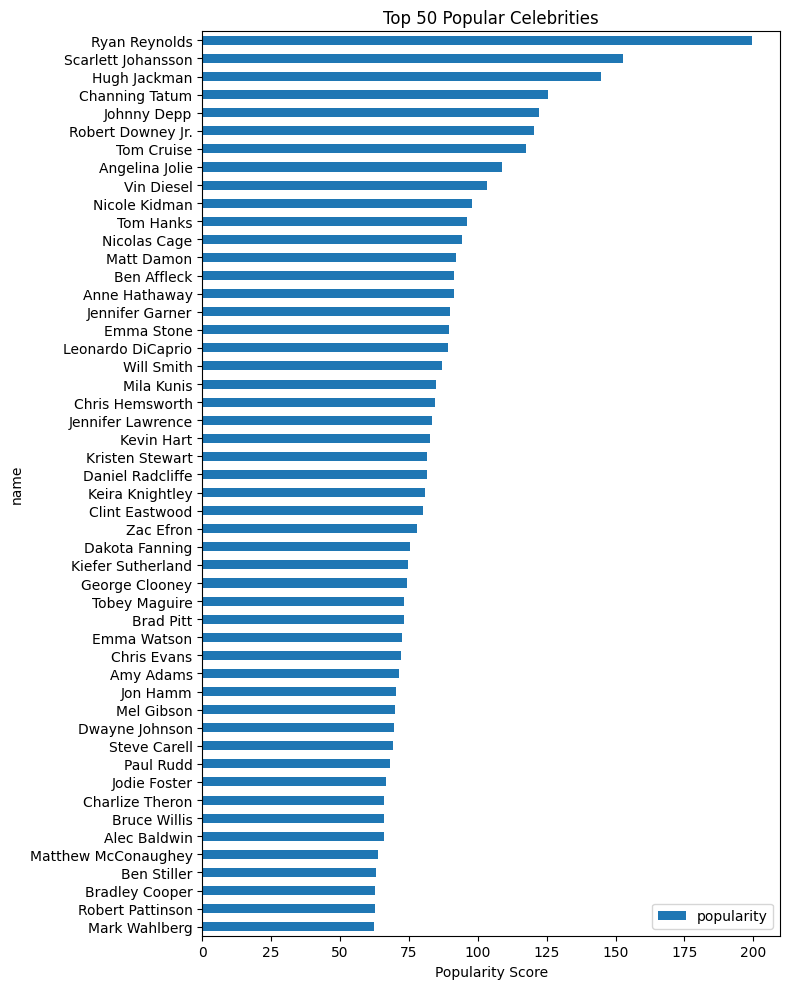

In [ ]:
df1.sort_values(by='popularity', ascending=False).head(50).plot(
    x='name', y='popularity', kind='barh', figsize=(8, 10), title='Top 50 Popular Celebrities'
)
plt.gca().invert_yaxis()
plt.xlabel('Popularity Score')
plt.tight_layout()
plt.show()


In [ ]:
df1['name_clean'] = df1['name'].str.lower().str.strip()
df3['name_clean'] = df3['Name'].str.lower().str.strip()

df3_filtered = df3[df3['Category'].isin(['Actors', 'Actresses'])]
merged_df = df1.merge(
    df3_filtered[['name_clean', 'Pay (USD millions)', 'Year', 'Category']],
    on='name_clean',
    how='inner'
)
merged_df = (
    merged_df.sort_values('Year', ascending=False)
             .drop_duplicates(subset='name', keep='first')
             .sort_values(by='Pay (USD millions)', ascending=False)
             .reset_index(drop=True)
)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'Category']])


,name,popularity,Pay (USD millions),Category
0,George Clooney,74.270,239.0,Actors
1,Mel Gibson,70.105,185.0,Actors
2,Dwayne Johnson,69.724,87.5,Actors
3,Chris Hemsworth,84.653,76.4,Actors
4,Ryan Reynolds,199.717,71.5,Actors
5,Robert Downey Jr.,120.346,66.0,Actors
6,Harrison Ford,55.550,65.0,Actors
7,Mark Wahlberg,62.425,58.0,Actors
8,Bradley Cooper,62.768,57.0,Actors
9,Scarlett Johansson,152.879,56.0,Actresses


In [ ]:
df3.shape

(524, 5)

In [ ]:
merged_df['is_superstar'] = True


In [ ]:
display(merged_df[['name', 'popularity', 'Pay (USD millions)',  'is_superstar']])


,name,popularity,Pay (USD millions),is_superstar
0,George Clooney,74.270,239.0,True
1,Mel Gibson,70.105,185.0,True
2,Dwayne Johnson,69.724,87.5,True
3,Chris Hemsworth,84.653,76.4,True
4,Ryan Reynolds,199.717,71.5,True
5,Robert Downey Jr.,120.346,66.0,True
6,Harrison Ford,55.550,65.0,True
7,Mark Wahlberg,62.425,58.0,True
8,Bradley Cooper,62.768,57.0,True
9,Scarlett Johansson,152.879,56.0,True


In [ ]:
merged_df.shape

(73, 9)

In [ ]:
merged_df.columns

Index(['name', 'original_name', 'popularity', 'known_for_department',
       'name_clean', 'Pay (USD millions)', 'Year', 'Category', 'is_superstar'],
      dtype='object')

In [ ]:
merged_df[['name', 'popularity', 'Pay (USD millions)', 'is_superstar']].to_csv('superstars_actors.csv', index=False)


# فهم البيانات

## بيانات الافلام 1

### تحليل الاتجاه العام لإنتاج الأفلام عبر السنوات
<br>

**الاتجاه العام**
<br>
يوجد **اتجاه تصاعدي واضح** على المدى الطويل، خاصة بعد التسعينات.

بداية من عام 2000، نلاحظ قفزات سريعة في عدد الأفلام المنتجة، وهذا مرتبط غالبا بـ:
- تطور التكنولوجيا .
- انتشار محطات ..
- من عام **1900 إلى 1950** كان النمو تدريجي وبطيء، وهو أمر منطقي بسبب بدايات صناعة السينما.
-    بين **1940 - 1980**،  نلاحظ انخفاضاً مرتبطاً بالحرب العالمية.
- مع نهاية التسعينات وبداية الألفية الجديدة، حدثت **طفرة في الإنتاج** السينمائي.
- بعد عام **2020**، نلاحظ انخفاضاً حاداً في عدد الأفلام المنتجة، وغالباً يعود ذلك إلى:
  - تأثير جائحة كورونا على الإنتاج السينمائي.
  - تأجيل أو إلغاء مواعيد إطلاق العديد من الأفلام.
  - بيانات السنوات الأخيرة قد تكون غير مكتملة أو لم تُسجل بعد بشكل دقيق.


In [ ]:

year_counts = english_movies['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']
year_counts = year_counts.sort_values('release_year')
fig = px.scatter(year_counts, x='release_year', y='count', trendline='ols',
                 labels={'release_year': 'سنة الإصدار', 'count': 'عدد الأفلام'},
                 title='الاتجاه العام لإنتاج الأفلام عبر السنوات',
                 height=500)
fig.show()


### شرح  لعدد الأفلام حسب الأشهر

- **شهر 1 (يناير)** هو الشهر اللي فيه  عدد أفلام (4611)، وهذا غالبًا بسبب **احتفالات رأس السنة** وزيادة الإنتاج والعروض الجديدة في بداية السنة.

- **شهر 2 (فبراير)** شهد انخفاض كبير  مقارنة بشهر يناير.

- من **شهر 3 إلى شهر 9**، الأعداد تتراوح بين 3000 و 4200 مع تقلبات متوسطة في الإنتاج.

- في **شهر 10 (أكتوبر)**
 عدد الأفلام وصل لذروته الثانية (4825)، وهذا  يفسر بزيادة الأفلام المرتبطة بـ**احتفالات الهالوين**
- في الأشهر الأخيرة (11 و12)  معدل متوسط الى عالي لاقتراب الميلاد وراس سنة .

نتيجة شهر 1 و10 ذروة الافلام .


In [ ]:

monthly_counts = english_movies.groupby('release_month').size().reset_index(name='movie_count')
monthly_counts = monthly_counts.sort_values('release_month').reset_index(drop=True)

fig = px.bar(monthly_counts, x='release_month', y='movie_count',
             labels={'release_month': 'الشهر', 'movie_count': 'عدد الأفلام'},
             title='عدد الأفلام حسب الشهر عبر جميع السنوات',
             height=500)

fig.show()




###  توزيع الإنتاج غير متوازن:
- تركيز كبير على:
  - **الدراما**
  - **الكوميديا**
  - **الأفلام الوثائقية**

- باقي الأنواع إنتاجها محدود،
  

In [ ]:
print(english_movies['genres'].value_counts().count())

genre_counts = english_movies['genres'].value_counts()
top_genres = genre_counts.head(50)
df_top_genres = top_genres.reset_index()
df_top_genres.columns = ['Genre', 'Count']
fig = px.bar(df_top_genres, x='Genre', y='Count',
             title='Top 50 Most Common Movie Genres',
             labels={'Genre': 'Genre', 'Count': 'Number of Movies'},
             height=500)

fig.update_layout(xaxis_tickangle=-45)

fig.show()


4478


###  التعامل مع الأنواع الفريدة في بيانات الأفلام

في بياناتي، يوجد حوالي **3884 فيلم** بأنواع **فريدة** تظهر مرة واحدة فقط من أصل **45,000 فيلم**. هذه الأنواع قد تؤثر على أداء نموذج .

لذلك، سأقوم بتجربة طريقتين:

1. **حذف الأنواع الفريدة**  
   - لتقليل التشويش والضوضاء في البيانات.  
   - تبسيط تصنيفات الأنواع مما قد يحسن من أداء النموذج.

2. **الاحتفاظ بالأنواع**  
   - للحفاظ على التنوع الكامل في البيانات.  
   - لمساعدة النموذج على التعامل مع الأنواع النادرة أو غير الشائعة.

سأقوم بمقارنة أداء النموذج في الحالتين لاختيار الأفضل.


In [ ]:
genre_counts = english_movies['genres'].value_counts()
rare_genres = genre_counts[genre_counts < 3].index
# رح احتفظ بافلام يلي نوعها فريد لدراستها لاحقا
english_moviesn = english_movies[english_movies['genres'].isin(rare_genres)]

# english_movies2 : الداتا بدون تشويش بالانواع
# مشان جرب تدريب علها
english_movies2 = english_movies[~english_movies['genres'].isin(rare_genres)]

len(english_movies2)

41399

### دراسة الانواع التي تحتوي على اكثر من 300 فيلم :
### 1. أعلى الأنواع ربحًا صافيًا:
| النوع                | الميزانية  | الربح الصافي  | ملاحظات                                                      |
| -------------------- | ------------ | --------------- | ------------------------------------------------------------------- |
| Action-Thriller      | 9.57 مليون   | 11.52 مليون     | رغم التكلفة العالية، النوع يحقق أرباح ضخمة، مناسب للاستثمار الكبير. |
| Comedy-Romance       | 5.37 مليون   | 11.70 مليون     | ربح ممتاز مقارنة بالتكلفة، النوع مربح للغاية   .       |
| Comedy-Drama-Romance | 5.29 مليون   | 11.59 مليون     | يثبت قوة الدمج بين الكوميديا والدراما والرومانسية في جذب الجماهير.  |
| Action-Drama         | 2.50 مليون   | 7.14 مليون      | استثمار متوسط بأرباح عالية، النوع يجمع الحماس مع الدراما بفعالية.   |
| Romance-Comedy       | 2.70 مليون   | 8.16 مليون      | نوع جماهيري مربح، دمج الرومانسية والكوميديا يجذب شريحة واسعة.       |

### 2. أنواع تحقق أرباح معتدلة وجيدة:
| النوع                  | الميزانية  | الربح الصافي  | ملاحظات                                                 |
| ---------------------- | ------------ | --------------- | -------------------------------------------------------------- |
| Drama-Romance          | 3.39 مليون   | 7.02 مليون      | أرباح مستقرة مع تكلفة متوسطة، النوع رومانسي درامي ناجح ماليًا. |
| Crime-Drama-Thriller   | 5.07 مليون   | 6.68 مليون      | مزيج الجريمة والإثارة يثبت فعاليته بتحقيق أرباح قوية.          |
| Comedy                 | 2.33 مليون   | 4.13 مليون      | الكوميديا تظل خيارًا مربحًا بأرباح متوسطة.                     |
| Drama-Crime            | 2.31 مليون   | 4.79 مليون      | دمج الدراما والجريمة يحقق نتائج مالية جيدة.                    |
| Horror-Thriller        | 1.89 مليون   | 5.17 مليون      | الرعب مع الإثارة يحقق أرباح عالية بتكاليف معقولة.              |
| Drama-Comedy           | 2.47 مليون   | 3.40 مليون      | أرباح جيدة، خليط بين الجدية والطرافة.                          |
| Horror-Science Fiction | 1.02 مليون   | 1.42 مليون      | أرباح معقولة، يجذب جمهور الخيال والرعب.                        |
| Thriller-Horror        | 902 ألف      | 2.18 مليون      | دمج الرعب مع التشويق ناجح ماليًا، مناسب للميزانيات الصغيرة.    |
| Drama-Thriller         | 2.93 مليون   | 1.93 مليون      | أرباح معقولة، لكنه أقل جذبًا من أنواع الإثارة الأخرى.          |
| Horror                 | 558 ألف      | 1.26 مليون      | نوع مربح جدًا مقارنة بالتكلفة المنخفضة.                        |
| Documentary-Music      | 153 ألف      | 339 ألف         | أرباح محدودة لكن إيجابية مقابل تكلفة منخفضة.                   |
| Documentary            | 71 ألف       | 260 ألف         | أرباح جيدة جدًا بميزانية شبه معدومة، النوع منخفض المخاطر.      |
| Thriller               | 1.04 مليون   | 597 ألف         | أرباح متوسطة، مناسب للمشاريع ذات المخاطرة المحدودة.            |
| Crime-Drama            | 1.46 مليون   | 816 ألف         | أرباح معقولة ضمن إطار الجريمة والدراما التقليدي.               |
| Comedy-Horror          | 795 ألف      | 1.04 مليون      | نوع منخفض التكلفة، يحقق أرباح بسيطة لكنها إيجابية.             |
| Western                | 202 ألف      | 150 ألف         | أرباح محدودة جدًا، سوق هذا النوع صغير وضعيف حاليًا.            |

### 3. أنواع كانت خاسرة أو ذات أداء ضعيف:
| النوع           | الميزانية  | الربح الصافي  | ملاحظات تحليلية                                                 |
| --------------- | ------------ | --------------- | --------------------------------------------------------------- |
| Action          | 1.62 مليون   | -145 ألف        | خسارة، رغم قوة نوع الأكشن، مشاريع هذا القسم لم تكن ناجحة.       |
| Music           | 67 ألف       | -19 ألف         | سوق الموسيقى ضعيف ماليًا، حتى مع ميزانية ضئيلة كانت هناك خسارة. |
| Science Fiction | 1.39 مليون   | -31 ألف         | خسارة طفيفة، ضعف نوع الخيال العلمي رغم شهرته   .     |


### استنتاج شامل:
 أفضل الأنواع ربحًا هي تلك التي تجمع بين الأكشن والإثارة، الكوميديا مع الرومانسية، أو الدراما مع عناصر أخرى مثل الإثارة أو الجريمة.
الأنواع المنخفضة الميزانية مثل الرعب والوثائقي تحقق أرباحًا جيدة جدًا مقابل تكلفتها.
 الأنواع الخاسرة تركزت في الأكشن  والموسيقى، والخيال العلمي، ما يدل على ضرورة التدقيق في اختيار المشاريع ضمن هذه الفئات.
 هناك علاقة واضحة بين الاستثمار الذكي في ميزانيات متوسطة وتحقيق أرباح كبيرة خاصة في:

Comedy-Romance وComedy-Drama-Romanceو Romance-Comedy و Action-Drama

 بينما الاستثمار المرتفع جدًا قد يحقق أرباح ضخمة مثل:

Action-Thriller


In [ ]:

selected_genres = [
    'Drama','Comedy','Documentary','Horror','Western','Drama-Romance','Comedy-Romance','Comedy-Drama','Horror-Thriller','Music','Thriller','Action','Crime-Drama','Drama-Thriller','Comedy-Drama-Romance',
    'Drama-Comedy','Comedy-Horror',  'Action-Thriller',  'Documentary-Music',  'Crime-Drama-Thriller',  'Horror-Comedy',  'Drama-Crime',  'Horror-Science Fiction',  'Thriller-Horror',  'Romance-Drama','Science Fiction',
    'Action-Drama', 'Romance-Comedy'
]
genre_means = english_movies[english_movies['genres'].isin(selected_genres)].groupby('genres').mean(numeric_only=True)
print(len(genre_means))
print(genre_means[['budget', 'revenue', 'profit']].head(28))

28
                              budget       revenue        profit
genres                                                          
Action                  1.696167e+06  1.544733e+06 -1.514341e+05
Action-Drama            2.550489e+06  9.821214e+06  7.270725e+06
Action-Thriller         9.818105e+06  2.163540e+07  1.181729e+07
Comedy                  2.559974e+06  7.089619e+06  4.529645e+06
Comedy-Drama            3.407717e+06  7.629079e+06  4.221362e+06
Comedy-Drama-Romance    5.357857e+06  1.710350e+07  1.174564e+07
Comedy-Horror           8.989515e+05  2.082804e+06  1.183852e+06
Comedy-Romance          5.447854e+06  1.732363e+07  1.187578e+07
Crime-Drama             1.497135e+06  2.331191e+06  8.340564e+05
Crime-Drama-Thriller    5.124653e+06  1.195486e+07  6.830205e+06
Documentary             7.517907e+04  3.481368e+05  2.729578e+05
Documentary-Music       1.578213e+05  5.066785e+05  3.488572e+05
Drama                   1.538603e+06  3.773704e+06  2.235101e+06
Drama-Comedy          


### دراسة مالية:

In [ ]:
print( (english_movies['budget'] >= 0).all())
print( (english_movies['revenue'] >= 0).all())


True
True


### مقارنة ارتباط الأرباح (profit) مع باقي العوامل:

| العامل                          | كل الأفلام       | الأفلام الخاسرة فقط    | التفسير العام                                              |
|---------------------------------|------------------|-------------------------|-------------------------------------------------------------|
| **revenue** (الإيرادات)         | 0.978 ارتباط قوي جدًا | -0.258 ارتباط سلبي متوسط | الإيرادات عامل أساسي للربح، لكن في حالة الخسارة الإيرادات منخفضة. |
| **vote_count** (عدد التقييمات)  | 0.753 ارتباط قوي     | -0.359 ارتباط سلبي متوسط | التفاعل الجماهيري مؤشر للربح عادةً، لكن بعض الأفلام رغم التقييمات تخسر. |
| **budget** (الميزانية)          | 0.624 ارتباط متوسط قوي | -0.825 ارتباط سلبي قوي جدًا | الميزانية المرتفعة قد تعني نجاح أو خسارة حسب تحقيق الإيرادات. |
| **unique_actors_count** (عدد الممثلين) | 0.303 ارتباط ضعيف إلى متوسط | -0.320 ارتباط سلبي متوسط | عدد الممثلين يؤثر إيجابيًا غالبًا، لكن في الأفلام الخاسرة يزيد التكاليف فقط. |
| **popularity** (الشعبية)        | 0.184 ارتباط ضعيف    | -0.288 ارتباط سلبي متوسط | الشهرة الرقمية تساهم جزئيًا في الربح، لكنها ليست ضمان للنجاح المالي. |
| **runtime** (مدة الفيلم)        | 0.150 ارتباط ضعيف    | -0.279 ارتباط سلبي متوسط | مدة الفيلم لها تأثير محدود، أحيانًا الطول الزائد يضر بالنتائج المالية. |
| **vote_average** (متوسط التقييم) | 0.117 ارتباط ضعيف جدًا | -0.166 ارتباط سلبي ضعيف | جودة الفيلم حسب التقييم ليست مؤشر واضح على الربح، بعض الأفلام الجيدة تخسر. |


In [ ]:

correlations = english_movies.corr(numeric_only=True)['profit'].sort_values(ascending=False)
print(correlations)


profit                 1.000000
revenue                0.978617
vote_count             0.752836
budget                 0.623587
unique_actors_count    0.303205
popularity             0.183673
runtime                0.150210
vote_average           0.116620
release_year           0.076760
release_day            0.023305
release_month          0.022178
id                    -0.081128
Name: profit, dtype: float64


In [ ]:
negative_profit_movies = english_movies[english_movies['profit'] < 0]
print(f"عدد الأفلام التي حققت خسائر: {len(negative_profit_movies)}")


عدد الأفلام التي حققت خسائر: 6498


In [ ]:

correlations = negative_profit_movies.corr(numeric_only=True)['profit'].sort_values(ascending=False)
print(correlations)



profit                 1.000000
id                     0.099576
release_day           -0.027705
release_month         -0.054880
release_year          -0.072213
vote_average          -0.165186
revenue               -0.257839
runtime               -0.278495
popularity            -0.288448
unique_actors_count   -0.320091
vote_count            -0.358913
budget                -0.825007
Name: profit, dtype: float64


وهاد شي منطقي لانو دراما اكبر عدد افلام و لا تقتصر الخسارة على نوع محدد.


In [ ]:
unique_genres = negative_profit_movies['genres'].unique()
print(f"عدد أنواع الأفلام الفريدة في افلام الخاسرة: {len(unique_genres)}")
most_common_losing_genre = negative_profit_movies['genres'].value_counts().idxmax()
count = negative_profit_movies['genres'].value_counts().max()
print(f"أكثر نوع فيلم خسر هو: {most_common_losing_genre} وعدده: {count}")



عدد أنواع الأفلام الفريدة في افلام الخاسرة: 1478
أكثر نوع فيلم خسر هو: Drama وعدده: 453


#### دراسة افلام التي حققت اكبر ربح
<br>

**ملاحظات:**

<br>

- **الميزانيات مرتفعة جداً:** أغلب الأفلام تكلفت ما بين 150 إلى 460 مليون دولار، وهو مؤشر على ضخامة الإنتاج.

- **الأرباح صافية ضخمة:** كل الأفلام حققت أرباحًا بأكثر من مليار دولار، مما يؤكد جدوى الاستثمار الكبير.

- **الأنواع السائدة:**
  - الأكشن والمغامرة والخيال العلمي متكررة جداً في أغلب هذه الأفلام، خصوصًا الأفلام ذات الإنتاج الضخم

  (Avatar، Avengers، Star Wars، Jurassic World).
  - الدراما والرومانسية تظهر بشكل رئيسي   
  - الأفلام العائلية والدراما  لها مكانة بين الأفلام ذات الأرباح الكبيرة رغم اختلاف النوع.

#### نتيجة:

أفلام الأكشن، المغامرة، والخيال العلمي هي الأغلب في قائمة الأعلى ربحًا، ويبدو أن ضخ الميزانية الكبيرة في هذه الأنواع غالبًا ما يعود بأرباح هائلة. لكن الأفلام الدرامية الرومانسية الكبيرة مثل  تاتنيك تثبت أن الأنواع الأخرى يمكنها أيضاً تحقيق نجاح ضخم إذا كانت إنتاجها قوي .


In [ ]:

top_profit_movies = english_movies.sort_values(by='profit', ascending=False)

top_10 = top_profit_movies.head(10)

print("أعلى 10 أفلام ربحاً صافيًا:")
print(top_10[['title', 'budget', 'revenue', 'profit', 'genres']])


أعلى 10 أفلام ربحاً صافيًا:
                             title       budget       revenue        profit  \
150                         Avatar  237000000.0  2.920357e+09  2.683357e+09   
248              Avengers: Endgame  356000000.0  2.799439e+09  2.443439e+09   
315                        Titanic  200000000.0  2.187464e+09  1.987464e+09   
146       Avatar: The Way of Water  460000000.0  2.320250e+09  1.860250e+09   
1076  Star Wars: The Force Awakens  245000000.0  2.068224e+09  1.823224e+09   
269         Avengers: Infinity War  300000000.0  2.052415e+09  1.752415e+09   
227        Spider-Man: No Way Home  200000000.0  1.921847e+09  1.721847e+09   
581                 Jurassic World  150000000.0  1.671537e+09  1.521537e+09   
424                  The Lion King  260000000.0  1.663075e+09  1.403075e+09   
612                      Furious 7  190000000.0  1.515400e+09  1.325400e+09   

                                         genres  
150    Action-Adventure-Fantasy-Science Fiction  
24

In [ ]:

all_companies = '-'.join(english_movies['production_companies'].dropna().astype(str)).split('-')
unique_actors = set(all_companies)
print(f"عدد شركات انتاج الفريدين في كامل البيانات: {len(unique_actors)}")


عدد شركات انتاج الفريدين في كامل البيانات: 31282


### الشركات الأكثر إنتاجًا (عدد الأفلام):
أكبر الشركات من حيث عدد الأفلام هي:

Columbia Pictures بـ 1650 فيلم

Warner Bros. Pictures بـ 1546 فيلم

Paramount بـ 1508 فيلم

Universal Pictures بـ 1485 فيلم

يليهم باقي الشركات مثل Metro، Goldwyn، Mayer...

الملاحظ أن الشركات الكلاسيكية الكبيرة مسيطرة على الإنتاج، خاصة من الشركات الهوليوودية التقليدية.

### الشركات الأكثر تنوعًا من حيث أنواع الأفلام:
أكثر الشركات تنوعًا بأنواع الأفلام هي:

Warner Bros. Pictures بـ 522 نوع مختلف

Universal Pictures بـ 513 نوع

Columbia Pictures بـ 479 نوع

Paramount بـ 453 نوع

20th Century Fox بـ 443 نوع

 الشركات الكبيرة بالإنتاج أيضًا تظهر ضمن الشركات الأكثر تنوعًا، .

 ### خلاصة العلاقة بين الحجم والتنوع:
واضح أن الشركات ذات الإنتاج الضخم مو بس بتنتج أفلام كثيرة، كمان عندها تنوع كبير بأنواع الأفلام.

بالمقابل، في شركات عندها إنتاج محدود لكن متنوعة نسبيًا (موجودة خارج توب 10 إنتاج لكن في توب التنوع).

لكن مافي علاقة مباشرة وحتمية بين التنوع وحجم الإنتاج، بمعنى:

بعض الشركات بتركّز على نوع محدد (مثلاً ديزني تميل للأفلام العائلية والأنيميشن).

بعض الشركات كل ما تحدد نوعها واستهدفت جمهور واضح، وكان عندها إنتاج مركز وكبير بنفس نوع بتعزز  فرص ربحهاوسيرتها على السوق المتخصص.

### استنتاج عام:
الشركات الكبرى بتحاول توازن بين "الإنتاج الضخم" و"تنوع الأنواع" لاستهداف جماهير مختلفة وزيادة الأرباح.

بالمقابل، الشركات المتخصصة بنوع محدد قد تفضل التركيز بدل التشتت، وهذا ممكن يساعدها على بناء هوية قوية بسوق معيّن.

In [ ]:

company_counts = pd.Series(all_companies).value_counts()

top_20_companies = company_counts.head(20).reset_index()
top_20_companies.columns = ['Company', 'Movie Count']

fig = px.bar(top_20_companies, x='Company', y='Movie Count',
             title='أكبر 20 شركة إنتاج من حيث عدد الأفلام',
             text='Movie Count', color='Movie Count', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='شركة الإنتاج', yaxis_title='عدد الأفلام', xaxis_tickangle=-45)
fig.show()


In [ ]:

company_genre_set = defaultdict(set)

for _, row in english_movies.dropna(subset=['production_companies', 'genres']).iterrows():
    companies = str(row['production_companies']).split('-')
    genres = str(row['genres'])
    for company in companies:
        company_genre_set[company].add(genres)

company_genre_counts = {company: len(genres) for company, genres in company_genre_set.items()}
company_genre_counts = pd.Series(company_genre_counts).sort_values(ascending=False).head(20).reset_index()
company_genre_counts.columns = ['Company', 'Unique Genre Count']

fig = px.bar(company_genre_counts, x='Company', y='Unique Genre Count',
             title='أكثر 20 شركة إنتاج تنوعًا في أنواع الأفلام',
             text='Unique Genre Count', color='Unique Genre Count', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='شركة الإنتاج', yaxis_title='عدد الأنواع المختلفة', xaxis_tickangle=-45)
fig.show()



### تحليل الممثلين:

In [ ]:

all_actors = '-'.join(english_movies['credits'].dropna().astype(str)).split('-')
unique_actors = set(all_actors)
print(f"عدد الممثلين الفريدين في كامل البيانات: {len(unique_actors)}")


عدد الممثلين الفريدين في كامل البيانات: 305395


### أكثر الممثلين من حيث عدد الأفلام:
من جدول top_20_act، نلاحظ:

Bess Flowers هي الأكثر ظهورًا بـ 475 فيلم، وهي مشهورة بلقب "ملكة الكومبارس"، لأنها ظهرت في مئات الأفلام غالبًا بأدوار صغيرة أو ثانوية.

يجي بعدها Jean بـ 407 فيلم، وByron Foulger بـ 259 فيلم، وهكذا.

إذا منلاحظ، معظم الأسماء يلي عندها عدد أفلام كبير هم ممثلين كانوا يظهروا كثيرًا بأدوار صغيرة أو في خلفية المشهد، خصوصًا في الحقبة الكلاسيكية من هوليوود.

### أكثر الممثلين من حيث تنوع الأنواع السينمائية (تعدد أنواع الأفلام):
من جدول actor_genre_counts، نلاحظ:

Jean هو الأكثر تنوعًا بـ 191 نوع/تصنيف مختلف، يلي بيدل إنو شارك بمجموعة كبيرة من الأنواع السينمائية (أكشن، دراما، كوميدي، رعب...).

بعدها Frank Welker بـ 147 نوع، وهو معروف بالأداء الصوتي، خصوصًا بأفلام الأنيميشن، يلي تساهم بتنوع تصنيفات الأفلام يلي بيشارك فيها.

Bess Flowers عندها أيضًا تنوع بـ 145 نوع،  منطقي كونها ظهرت في عدد كبير  الأفلام .

### هل في علاقة بين عدد الأفلام والتنوع؟


 في بعض الحالات، الممثل يلي عنده عدد كبير من الأفلام بيكون عنده تنوع عالي أيضًا، مثل:

Jean ثاني أكتر ممثل أفلام وأكتر ممثل تنوعًا.

Bess Flowers أكتر وحدة أفلام وثالث وحدة من حيث التنوع.

 لكن مو شرط دائمًا:

في ممثلين عندهم أفلام كثيرة بس تنوعهم أقل نسبيًا، مثل:

Irving Bacon عنده 224 فيلم بس مش ضمن قائمة أكتر تنوعًا.

Lee Phelps 182 فيلم وما ظهر بقائمة التنوع.

 بالمقابل، في ممثلين عندهم تنوع كبير بس مش من أكثر الناس إنتاجًا:

مثل Danny Trejo عنده 102 نوع بس مش من أعلى الناس بعدد الأفلام ضمن الـ Top 20.


In [ ]:

act_counts = pd.Series(all_actors).value_counts()


top_20_act = act_counts.head(20).reset_index()
top_20_act.columns = ['actor', 'Movie Count']

fig = px.bar(top_20_act, x='actor', y='Movie Count',
             title='أكثر 20 ممثل ظهورًا في الأفلام',
             text='Movie Count', color='Movie Count', color_continuous_scale='Plasma')
fig.update_layout(xaxis_title='اسم الممثل', yaxis_title='عدد مرات الظهور', xaxis_tickangle=-45)
fig.show()


In [ ]:

actor_genre_set = defaultdict(set)


for _, row in english_movies.dropna(subset=['credits', 'genres']).iterrows():
    actors = str(row['credits']).split('-')
    genres = str(row['genres'])
    for actor in actors:
        actor_genre_set[actor].add(genres)


actor_genre_counts = {actor: len(genres) for actor, genres in actor_genre_set.items()}

actor_genre_counts = pd.Series(actor_genre_counts).sort_values(ascending=False).head(20).reset_index()
actor_genre_counts.columns = ['Actor', 'Unique Genre Count']

fig = px.bar(actor_genre_counts, x='Actor', y='Unique Genre Count',
             title='أكثر 20 ممثل تنوعًا في أنواع الأفلام',
             text='Unique Genre Count', color='Unique Genre Count', color_continuous_scale='Viridis')
fig.update_layout(xaxis_title='الممثل', yaxis_title='عدد الأنواع المختلفة', xaxis_tickangle=-45)
fig.show()


###  أفلام الأكشن :
أزواج مثل:

John Cena & Paul Wight (28 مرة "Action-Drama")

Glenn Jacobs & Paul Michael Lévesque (34 مرة "Action-Drama")

Chris Irvine & Glenn Jacobs (31 مرة "Action-Drama")

Booker Huffman & Steve Borden (35 مرة "Action")

Ric Flair & Steve Borden (49 مرة "Action")

 تدل على وجود تركيز ضخم على أفلام الأكشن المرتبطة بالمصارعين والرياضيين المعروفين، وغالبًا أفلامهم تدور في نفس القالب من حيث النوع والمحتوى.

### الثنائيات  في الكوميديا:
أزواج مثل:

Larry Fine & Moe Howard (58 مرة "Comedy")

Bud Abbott & Lou Costello (12 مرة "Comedy")

Oliver Hardy & Stan Laurel (17 مرة "Comedy")

 هذه الثنائيات جزء من تاريخ الكوميديا  وتكرار ظهورهم يعكس شعبيتهم وتأثيرهم الفني  .

###   لأفلام الأنيميشن والعائلة:
أزواج مثل:

Mike Nawrocki & Phil Vischer (12 مرة "Animation-Family")

Frank Welker & Jeff Bennett (5 مرات "Animation-Family")

Mickie McGowan & Sherry Lynn (4 مرات "Animation-Comedy-Family")

 يعكس هذا التكرار أهمية هذه الأصوات في صناعة الرسوم المتحركة الموجهة للعائلة والأطفال.

### تكرار واضح في الدراما الرومانسية:
أزواج مثل:

Jack Mower & Stuart Holmes (4 مرات "Drama-Romance")

Frank Mayo & Jack Mower (6 مرات "Drama-Romance")

Bess Flowers & Harold Miller (5 مرات "Drama-Romance")

Griffiths & Roger Ashton (6 مرات "Drama-Romance")

 مما يدل على وجود عدد كبير من الممثلين المشاركين في إنتاجات الدراما الرومانسية، .

### الغرب الأمريكي (Western) يظهر بشكل متكرر:
أمثلة:

Chris & Pin Martin (19 مرة "Western")

Roy Rogers & Trigger (15 مرة "Western")

Kenne Duncan & Tom London (22 مرة "Western")

 ما يدل على أهمية أفلام الغرب الأمريكي الكلاسيكية وانتشار الثنائيات الشهيرة فيها.



In [ ]:

actors_per_movie = english_movies['credits'].dropna().apply(lambda x: sorted(set(str(x).split('-'))))

all_pairs = []
for actors in actors_per_movie:
    pairs = combinations(actors, 2)
    all_pairs.extend(pairs)

pair_counts = Counter(all_pairs)

popular_pairs = [(pair, count) for pair, count in pair_counts.items() if count > 30]

popular_pairs = sorted(popular_pairs, key=lambda x: x[1], reverse=True)

print("أزواج الممثلين اللي تكرروا بأكثر من 30 فيلم:")
for pair, count in popular_pairs:
    print(f"{pair}: {count} فيلم")


أزواج الممثلين اللي تكرروا بأكثر من 30 فيلم:
('Larry Fine', 'Moe Howard'): 77 فيلم
('Bess Flowers', 'Harold Miller'): 71 فيلم
('Davies', 'John Rhys'): 63 فيلم
('Harold Miller', 'Sam Harris'): 55 فيلم
('Bess Flowers', 'Sam Harris'): 52 فيلم
('Chris', 'Pin Martin'): 52 فيلم
('Ric Flair', 'Steve Borden'): 52 فيلم
('Curly Howard', 'Moe Howard'): 52 فيلم
('Curly Howard', 'Larry Fine'): 51 فيلم
('Claude Van Damme', 'Jean'): 50 فيلم
('White', 'Wilfrid Hyde'): 50 فيلم
('Frank Mayo', 'Jack Mower'): 50 فيلم
('Paul Ben', 'Victor'): 48 فيلم
('Chris Irvine', 'Paul Wight'): 48 فيلم
('Cary', 'Hiroyuki Tagawa'): 46 فيلم
('Joseph Gordon', 'Levitt'): 45 فيلم
('Keegan', 'Michael Key'): 44 فيلم
('Bert Moorhouse', 'Bess Flowers'): 44 فيلم
('Huntz Hall', 'Leo Gorcey'): 44 فيلم
('Kevin Nash', 'Scott Hall'): 44 فيلم
('Ann', 'Margret'): 43 فيلم
('Ice', 'T'): 42 فيلم
('Bess Flowers', 'Franklyn Farnum'): 42 فيلم
('Cliff Saum', 'Jack Mower'): 42 فيلم
('Rob Rechsteiner', 'Scott Rechsteiner'): 42 فيلم
('Larry Pfohl

In [ ]:

pair_genres = defaultdict(list)

for idx, row in english_movies.iterrows():
    if pd.isna(row['credits']) or pd.isna(row['genres']):
        continue

    actors = sorted(set(str(row['credits']).split('-')))


    if isinstance(row['genres'], list):
        genres = row['genres']
    else:
        genres = [g.strip() for g in str(row['genres']).split(',')]


    for pair in combinations(actors, 2):
        if pair in dict(popular_pairs):
            pair_genres[pair].extend(genres)


for pair, genres_list in pair_genres.items():
    genre_counts = Counter(genres_list)
    top_genres = genre_counts.most_common(3)

    print(f"\n الزوج: {pair[0]} و {pair[1]}")
    print(" أكثر الأنواع اللي شاركوا فيها:")
    for genre, count in top_genres:
        print(f" - {genre}: {count} مرة")



 الزوج: Davies و John Rhys
 أكثر الأنواع اللي شاركوا فيها:
 - Adventure-Action: 4 مرة
 - Adventure-Fantasy-Action: 3 مرة
 - Documentary: 3 مرة

 الزوج: Keegan و Michael Key
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy: 7 مرة
 - Comedy-Drama: 5 مرة
 - Animation-Comedy-Family-Fantasy: 2 مرة

 الزوج: Joseph Gordon و Levitt
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy-Drama: 3 مرة
 - Comedy-Crime-Mystery: 2 مرة
 - Action-Crime-Drama-Thriller: 2 مرة

 الزوج: Frank Welker و Jim Cummings
 أكثر الأنواع اللي شاركوا فيها:
 - Animation-Family: 3 مرة
 - Family-Adventure-Animation-Romance: 2 مرة
 - Animation-Family-Fantasy: 2 مرة

 الزوج: Paul Ben و Victor
 أكثر الأنواع اللي شاركوا فيها:
 - Drama: 4 مرة
 - Action: 3 مرة
 - Comedy: 3 مرة

 الزوج: Bert Stevens و Bess Flowers
 أكثر الأنواع اللي شاركوا فيها:
 - Comedy-Drama-Romance: 5 مرة
 - Comedy-Romance: 5 مرة
 - Drama: 3 مرة

 الزوج: Mickie McGowan و Sherry Lynn
 أكثر الأنواع اللي شاركوا فيها:
 - Animation-Comedy-Family: 4 مرة
 - Animation-Family: 3 مرة

### تحليل افلام التي تملك اكثر من جزء

In [ ]:

df = english_movies.copy()
df_sorted = df.sort_values(by=['title', 'release_year'])
parts = df_sorted.groupby('title').agg({
    'release_year': lambda years: list(years.unique()),
    'id': 'count'
}).reset_index()

parts_with_multiple_years = parts[parts['id'] > 1]
print(parts_with_multiple_years[['title', 'release_year']])



                              title  release_year
240    20,000 Leagues Under the Sea  [1954, 1997]
274                         21 Days  [1940, 2014]
314                            2:22  [2008, 2017]
374                        36 Hours  [1953, 1964]
385                    3:10 to Yuma  [1957, 2007]
...                             ...           ...
42001             Young as You Feel  [1931, 1940]
42003                    Youngblood  [1978, 1986]
42099                        Zodiac  [2007, 2014]
42126              Zombie Nightmare  [1987, 1993]
42153                           Zoo  [2018, 2019]

[2365 rows x 2 columns]


### نتيجة:

"من خلال تحليل بيانات الأفلام التي تحتوي على عدة أجزاء، نلاحظ أن مجموع الأرباح الصافية للأجزاء التي تلي الجزء الأول (الأجزاء الثانية وما بعدها) يفوق مجموع أرباح الأجزاء الأولى. هذا يشير إلى أن الأجزاء التالية للسلاسل غالبًا ما تحقق أداءً ماليًا أفضل، ربما بسبب نجاح الجزء الأول الذي يشجع الجمهور على مشاهدة الأجزاء اللاحقة، أو بسبب تحسن في الإنتاج أو تسويق السلسلة."

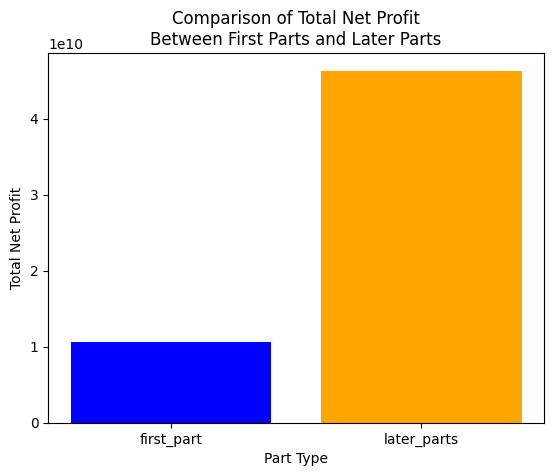

In [ ]:

first_release = df_sorted.groupby('title')['release_year'].min().reset_index()
first_release = first_release.rename(columns={'release_year': 'first_year'})

df_merged = pd.merge(df_sorted, first_release, on='title')

df_merged['part_type'] = df_merged.apply(lambda row: 'first_part' if row['release_year'] == row['first_year'] else 'later_parts', axis=1)


multi_parts_titles = parts_with_multiple_years['title'].tolist()
df_multi = df_merged[df_merged['title'].isin(multi_parts_titles)]

profit_summary = df_multi.groupby('part_type')['profit'].sum().reset_index()

plt.bar(profit_summary['part_type'], profit_summary['profit'], color=['blue', 'orange'])
plt.title('Comparison of Total Net Profit\nBetween First Parts and Later Parts')
plt.xlabel('Part Type')
plt.ylabel('Total Net Profit')
plt.show()


## بيانات الافلام 2

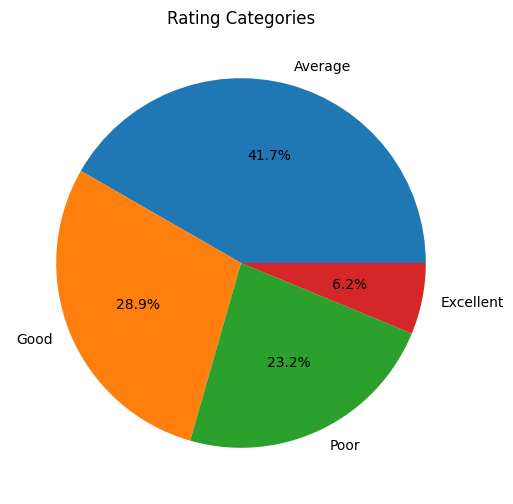

In [ ]:
dfb['rating_category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Rating Categories')
plt.ylabel('')
plt.show()


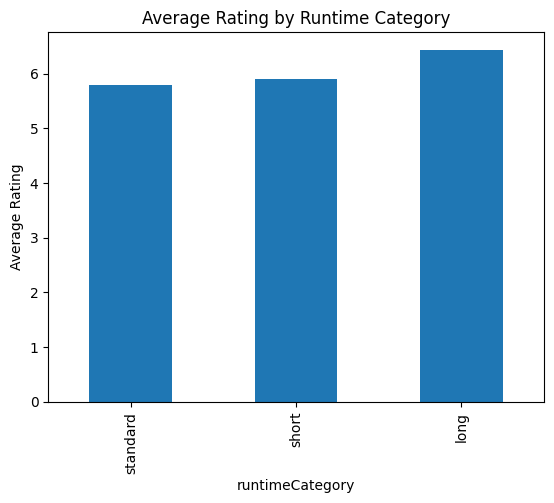

In [ ]:
dfb.groupby('runtimeCategory')['averageRating'].mean().sort_values().plot.bar(
    title='Average Rating by Runtime Category', ylabel='Average Rating'
)
plt.show()


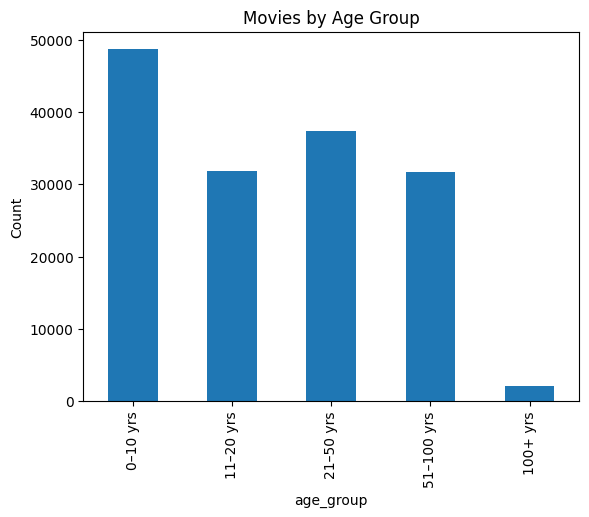

In [ ]:
bins = [0, 10, 20, 50, 100, 150]
labels = ['0–10 yrs', '11–20 yrs', '21–50 yrs', '51–100 yrs', '100+ yrs']
dfb['age_group'] = pd.cut(dfb['movie_age'], bins=bins, labels=labels)

dfb['age_group'].value_counts().sort_index().plot.bar(
    title='Movies by Age Group', ylabel='Count'
)
plt.show()


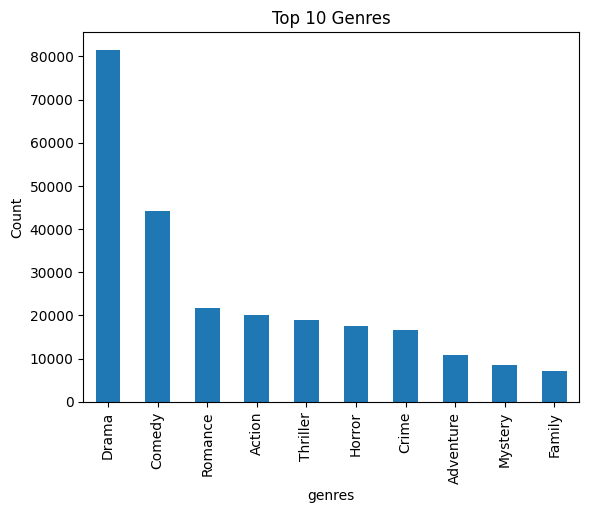

In [ ]:
dfb['genres'].str.split(',').explode().value_counts().head(10).plot.bar(
    title='Top 10 Genres'
)
plt.ylabel('Count')
plt.show()


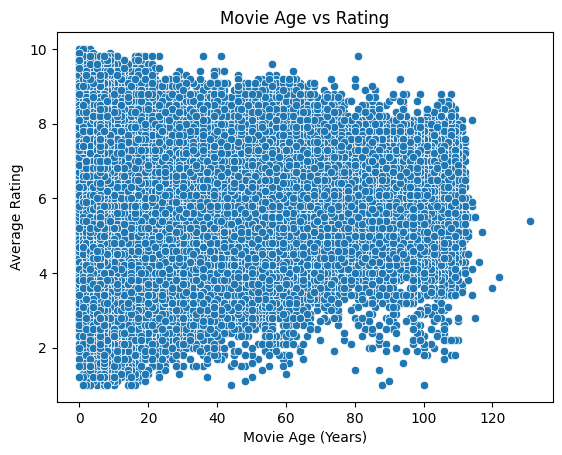

In [ ]:
sns.scatterplot(data=dfb, x='movie_age', y='averageRating')
plt.title('Movie Age vs Rating')
plt.xlabel('Movie Age (Years)')
plt.ylabel('Average Rating')
plt.show()


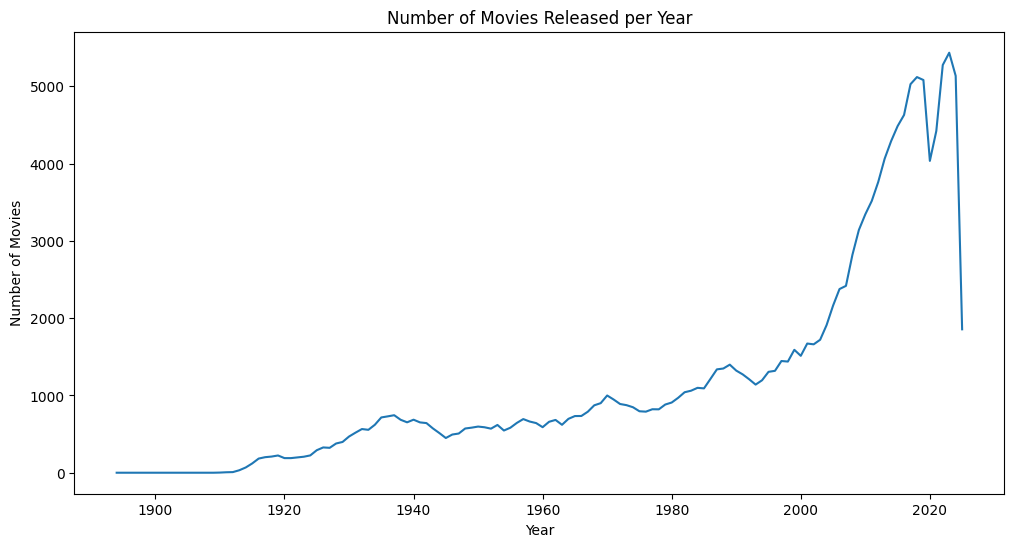

In [ ]:
dfb['startYear'].value_counts().sort_index().plot(kind='line', figsize=(12, 6))
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


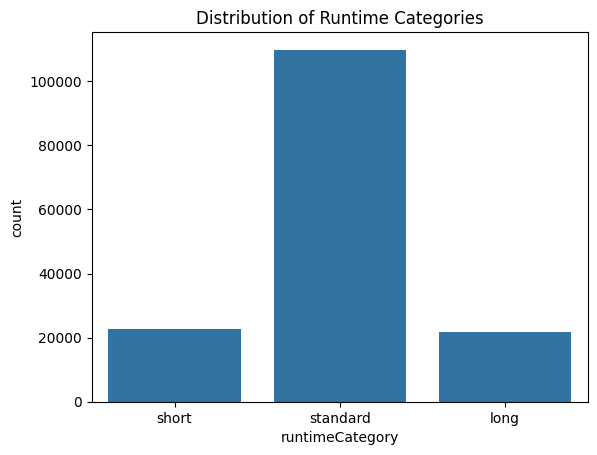

In [ ]:
sns.countplot(data=dfb, x='runtimeCategory')
plt.title('Distribution of Runtime Categories')
plt.show()


In [ ]:
dfb.sort_values(by='averageRating', ascending=False).head(10)[['primaryTitle', 'averageRating']]


,primaryTitle,averageRating
104778,Sacred the Movie,10.0
120897,Kirik,10.0
114270,One Decision,10.0
126605,Falsos Amigos,10.0
127299,Undocumented,9.9
117240,Branded by Fire,9.9
115737,A Summer Night,9.9
128594,Lottie's Girl,9.9
127801,The Night Before Easter,9.9
91377,Wolf Song: The Movie,9.9


## بيانات الممثلين و الاوسكار

### تحليل استكشافي للبيانات المتعلقة بالاوسكار

#### كم عدد الأفلام في البيانات التي لديها ترشيحات أو جوائز أوسكار؟



Count of movies by Oscar status:
movie_oscar
0    38302
1     2109
2      988
Name: count, dtype: int64


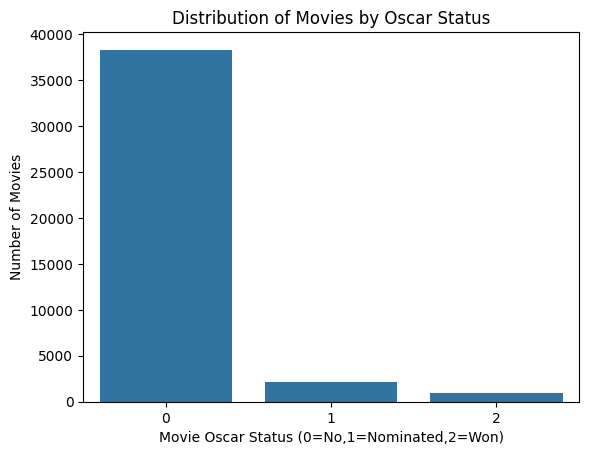

In [ ]:


print("Count of movies by Oscar status:")
movie_oscar_counts = leen_movies_df['movie_oscar'].value_counts().sort_index()
print(movie_oscar_counts)

# Plot bar chart
sns.barplot(x=movie_oscar_counts.index, y=movie_oscar_counts.values)
plt.xlabel('Movie Oscar Status (0=No,1=Nominated,2=Won)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Oscar Status')
plt.show()


#### ما هو توزيع حالة الأوسكار في فريق العمل (الممثلين والمخرجين)؟ كم فيلم لديه فريق مرشح أو فائز بالأوسكار؟



Count of movies by credits Oscar status:
movie_credits_oscar
0    25255
1     6306
2     9838
Name: count, dtype: int64


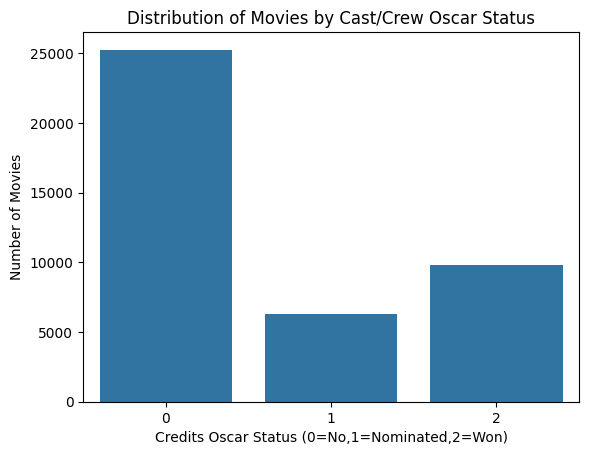

In [ ]:
print("Count of movies by credits Oscar status:")
credits_oscar_counts = leen_movies_df['movie_credits_oscar'].value_counts().sort_index()
print(credits_oscar_counts)

sns.barplot(x=credits_oscar_counts.index, y=credits_oscar_counts.values)
plt.xlabel('Credits Oscar Status (0=No,1=Nominated,2=Won)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Cast/Crew Oscar Status')
plt.show()


#### ما العلاقة بين عدد جوائز الأوسكار لشركات الإنتاج  وحالة الأوسكار للفيلم نفسه ؟



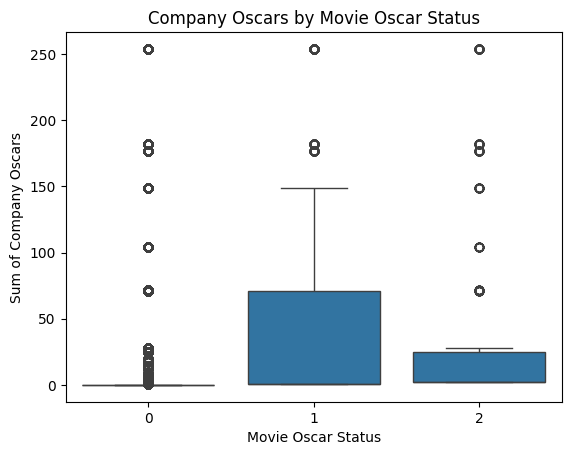

In [ ]:
sns.boxplot(x='movie_oscar', y='company_oscars', data=leen_movies_df)
plt.xlabel('Movie Oscar Status')
plt.ylabel('Sum of Company Oscars')
plt.title('Company Oscars by Movie Oscar Status')
plt.show()


هناك علاقة واضحة وإيجابية بين عدد جوائز الأوسكار التاريخية لشركات الإنتاج وحالة الأوسكار للفيلم نفسه
1. لأفلام التي ليس لديها أوسكار (الحالة 0): غالبية هذه الأفلام تُنتجها شركات لديها عدد قليل جداً من جوائز الأوسكار التاريخية (الوسيط قريب من الصفر، ومعظم الأفلام تقع ضمن نطاق منخفض جداً من جوائز الشركة). ومع ذلك، هناك بعض الاستثناءات (القيم المتطرفة) حيث تُنتج شركات ذات عدد كبير من جوائز الأوسكار أفلاماً لا تحصل على ترشيح أو فوز بالأوسكار.

2. الأفلام المرشحة للأوسكار (الحالة 1): تميل هذه الأفلام إلى أن تُنتجها شركات لديها سجل أوسكاري أعلى بشكل ملحوظ مقارنة بالفئة 0. فالوسيط ونطاق الربعين لمجموع جوائز الأوسكار للشركات هنا أعلى بكثير. هذا يشير إلى أن شركات الإنتاج ذات الخبرة والتاريخ الأوسكاري الكبير تزيد من فرص ترشيح أفلامها.

3. الأفلام الفائزة بالأوسكار (الحالة 2): تواصل هذه الفئة إظهار ارتباط إيجابي.

<br>

بشكل عام، يشير الرسم البياني إلى أن شركات الإنتاج ذات السجل الحافل بجوائز الأوسكار لديها فرصة أكبر بكثير لإنتاج أفلام يتم ترشيحها أو الفوز بجوائز الأوسكار. هذه الميزة (مجموع أوسكارات الشركة) ستكون مؤشراً قوياً جداً في نموذجك للتنبؤ بحالة أوسكار الفيلم.

#### كيف هو توزيع عدد جوائز الأوسكار التي حصلت عليها شركات الإنتاج بشكل عام؟



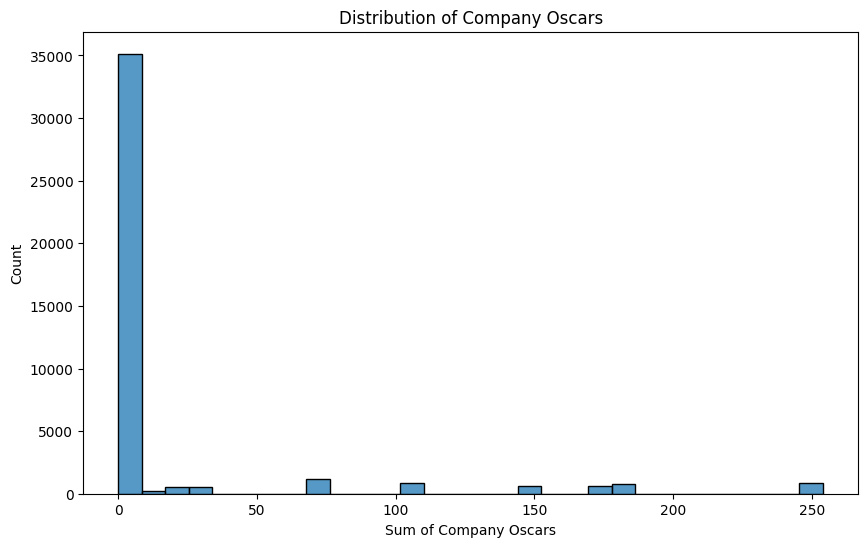

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(leen_movies_df['company_oscars'], bins=30, kde=False)
plt.xlabel('Sum of Company Oscars')
plt.title('Distribution of Company Oscars')
plt.show()


#### هل هناك علاقة ارتباط بين متوسط تقييم الممثلين  وميزات الأوسكار المختلفة؟



                     actors_avg_rating  movie_oscar  movie_credits_oscar  \
actors_avg_rating             1.000000     0.130294             0.295808   
movie_oscar                   0.130294     1.000000             0.276116   
movie_credits_oscar           0.295808     0.276116             1.000000   
company_oscars                0.229988     0.128135             0.259672   

                     company_oscars  
actors_avg_rating          0.229988  
movie_oscar                0.128135  
movie_credits_oscar        0.259672  
company_oscars             1.000000  


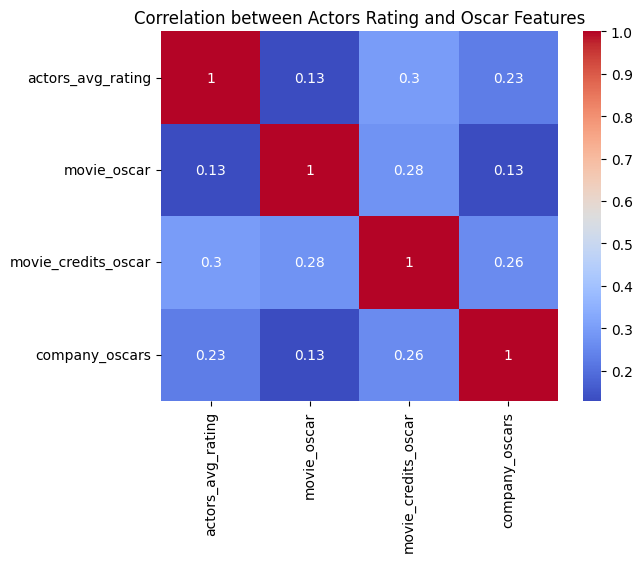

In [ ]:
corr_df = leen_movies_df[['actors_avg_rating', 'movie_oscar', 'movie_credits_oscar', 'company_oscars']]
corr = corr_df.corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Actors Rating and Oscar Features')
plt.show()


**نعم، توجد علاقة ارتباط إيجابية بين متوسط تقييم الممثلين وميزات الأوسكار المختلفة، ولكنها تتراوح بين الضعيفة والمعتدلة**
1. متوسط تقييم الممثلين وحالة أوسكار الفيلم: الارتباط هنا ضعيف جداً (0.13). هذا يعني أن وجود متوسط تقييم عالٍ للممثل لا يرتبط بقوة بكون الفيلم نفسه فائزاً أو مرشحاً للأوسكار.

2. متوسط تقييم الممثلين وعدد جوائز الأوسكار لطاقم العمل بالفيلم: يوجد ارتباط معتدل (0.3). هذا يشير إلى أن الأفلام التي يشارك فيها ممثلون لديهم متوسط تقييم عالٍ تميل أيضاً إلى أن يكون لديها طاقم عمل (ممثلين آخرين، مخرجين، كُتاب، إلخ) فازوا أو رشحوا للأوسكار بشكل عام.

3. متوسط تقييم الممثلين وجوائز أوسكار شركة الإنتاج: يوجد ارتباط ضعيف إلى متوسط (0.23). هذا يعني أن الممثلين ذوي التقييمات العالية يميلون للعمل مع شركات إنتاج لديها سجل أوسكاري أفضل، ولكن الارتباط ليس قوياً جداً.
<br>
بشكل عام، يبدو أن ارتباط متوسط تقييم الممثلين بـ "جوائز أوسكار طاقم العمل" هو الأقوى من بين ميزات الأوسكار المذكورة، مما يشير إلى أن جودة طاقم العمل ككل قد تكون مؤشراً أفضل من مجرد حالة أوسكار الفيلم نفسه أو تاريخ شركة الإنتاج في سياق تقييم الممثل.

### تحليل استكشافي للبيانات المتعلقة بالممثلين

#### ما هو توزيع متوسط تقييمات الممثلين ؟ وهل هناك فرق في التوزيع بين الممثلين أصحاب عدد الأفلام القليل والكثير؟

/tmp/ipython-input-78-3679941488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


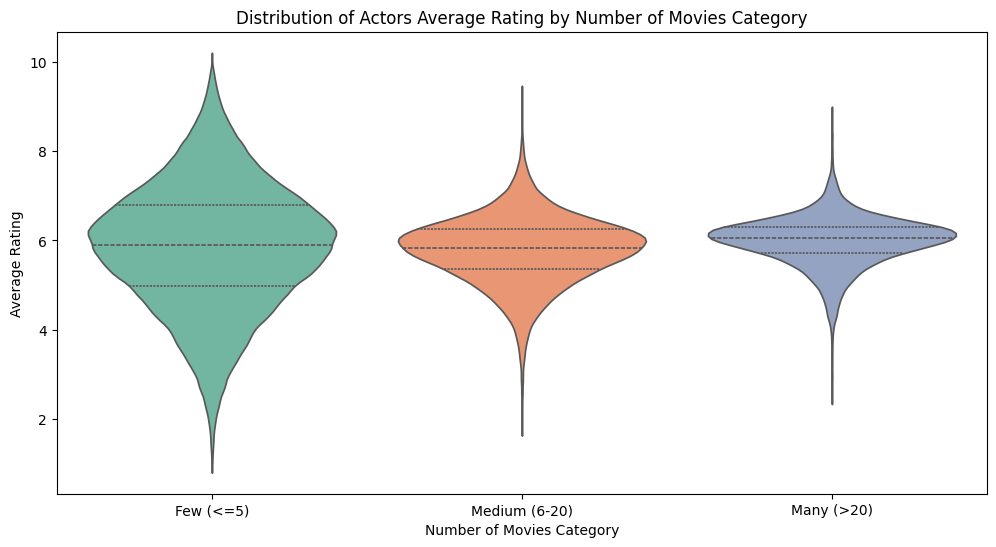

In [ ]:


# Create bins for number of movies: few (<=5), medium (6-20), many (>20)
actors_rating_hanna_df['num_movies_category'] = pd.cut(
    actors_rating_hanna_df['num_movies'],
    bins=[-1, 5, 20, 1000],
    labels=['Few (<=5)', 'Medium (6-20)', 'Many (>20)']
)

plt.figure(figsize=(12,6))
sns.violinplot(
    x='num_movies_category',
    y='average_rating',
    data=actors_rating_hanna_df,
    inner='quartile',
    palette='Set2'
)
plt.title('Distribution of Actors Average Rating by Number of Movies Category')
plt.xlabel('Number of Movies Category')
plt.ylabel('Average Rating')
plt.show()


---
* نلاحظ أن فئة "قليل"  لديها نطاق أوسع لتوزيع التقييمات، بينما الفئتان "متوسط" و"كثير" تظهران تجمّعاً أكبر حول المتوسط
* الخطوط المتقطعة داخل كل "كمان" تمثل الربيعات  والتوسط ، مما يساعد في فهم التشتت والنزعة المركزية لكل فئة.
<br>

**الاجابة النهائية:**
<br>
- توزيع متوسط تقييمات الممثلين يميل إلى التمركز حول 6 إلى 6.5 تقريباً لمعظم الفئات. فنعم، هناك فرق في التوزيع بين الممثلين أصحاب عدد الأفلام القليل والكثير. الممثلون أصحاب عدد الأفلام "القليل" (أقل من أو يساوي 5) يظهرون توزيعاً أوسع وأكثر تشتتاً لمتوسط تقييماتهم، مع وجود قيم متطرفة أعلى وأدنى. بينما الممثلون أصحاب عدد الأفلام "المتوسط" (6-20) و"الكثير" (أكثر من 20) يظهرون توزيعاً أكثر تضييقاً وتقارباً حول المتوسط، مما يشير إلى أن الممثلين الذين شاركوا في عدد أكبر من الأفلام يميلون لامتلاك تقييمات  أكثر استقراراً وتجانساً.
---

#### كيف يتوزع عدد الأفلام التي شارك فيها الممثلون ، وهل هناك علاقة بين عدد الأفلام ومتوسط التقييم؟

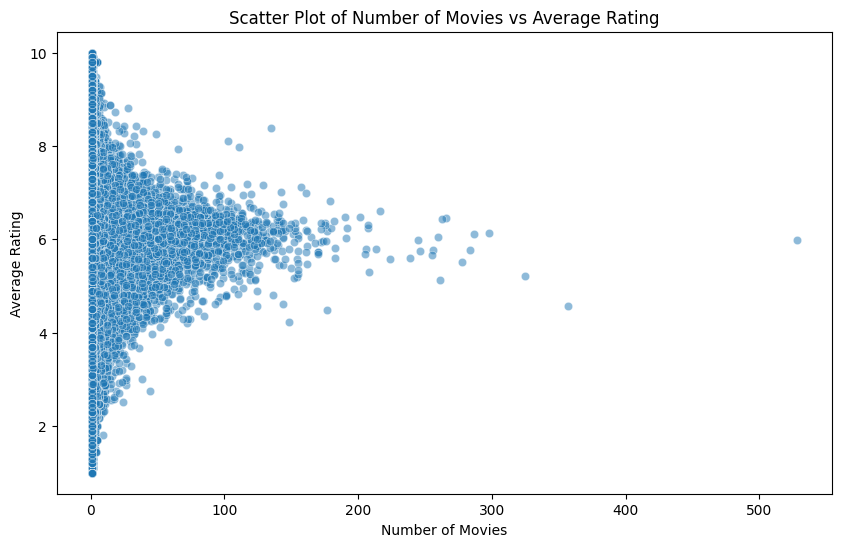

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='num_movies',
    y='average_rating',
    data=actors_rating_hanna_df,
    alpha=0.5
)
plt.title('Scatter Plot of Number of Movies vs Average Rating')
plt.xlabel('Number of Movies')
plt.ylabel('Average Rating')
plt.show()


* يتوزع عدد الأفلام التي شارك فيها الممثلون بشكل شديد الانحراف نحو اليمين، حيث أن الغالبية العظمى من الممثلين قد شاركوا في عدد قليل جداً من الأفلام (أقل من حوالي 50-100 فيلم)
<br>

**الاجابة النهائية**
<br>
- نعم، هناك علاقة واضحة بين عدد الأفلام ومتوسط التقييم: فالممثلون الذين شاركوا في عدد قليل جداً من الأفلام يظهرون نطاقاً واسعاً جداً لمتوسط تقييماتهم (منخفضة جداً إلى عالية جداً)، بينما الممثلون الذين شاركوا في عدد أكبر من الأفلام يميلون لأن يكون متوسط تقييماتهم أكثر استقراراً وتمركزاً حول قيمة معينة (غالباً ما تكون متوسطة إلى عالية، ولكن التقييمات الشديدة الارتفاع أو الانخفاض تصبح أقل شيوعاً مع زيادة عدد الأفلام). هذا يشير إلى أن الممثلين ذوي الخبرة الأكبر (عدد أفلام أعلى) يمتلكون تقييمات أكثر اتساقاً وأقل تطرفاً.

#### هل يوجد تباين كبير بين متوسط تقييم الممثلين  والتقييم البيزي ؟ كيف يظهر الفرق بينهما؟

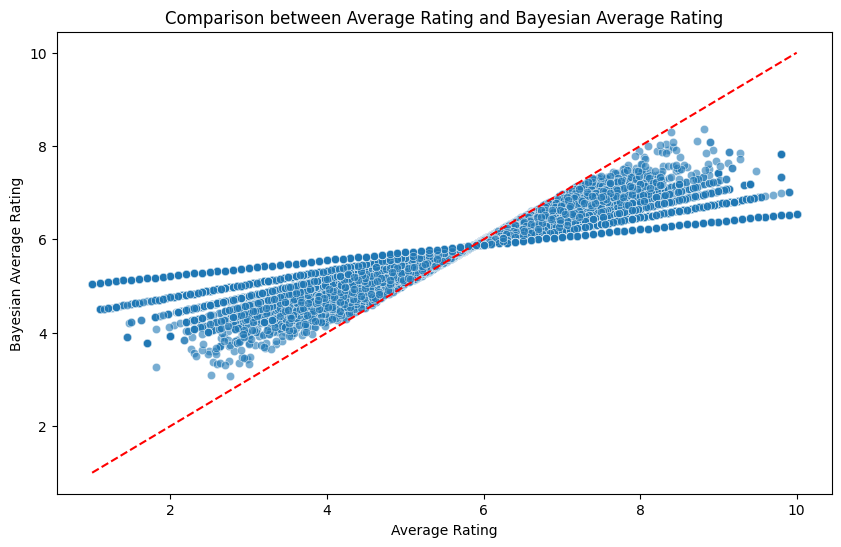

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='average_rating',
    y='bayesian_avg_rating',
    data=actors_rating_hanna_df,
    alpha=0.6
)
plt.plot([actors_rating_hanna_df['average_rating'].min(), actors_rating_hanna_df['average_rating'].max()],
         [actors_rating_hanna_df['average_rating'].min(), actors_rating_hanna_df['average_rating'].max()],
         'r--')  # 45 degree line for reference
plt.title('Comparison between Average Rating and Bayesian Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Bayesian Average Rating')
plt.show()


* يمثل الخط الأحمر المتقطع حالة التطابق التام (أي عندما يكون التقييمان متساويين).
* نلاحظ أن النقاط تتجمع حول الخط الأحمر في المنتصف، لكنها تتباعد عنه عند الأطراف.
* لنسبة للتقييمات المنخفضة (أقل من حوالي 5.5)، يميل التقييم البيزي لأن يكون أعلى من متوسط التقييم العادي
* بالنسبة للتقييمات العالية (أعلى من حوالي 6.5)، يميل التقييم البيزي لأن يكون أقل من متوسط التقييم العادي
<br>

**الاجابة النهائية**
<br>
نعم، يوجد تباين واضح بين متوسط تقييم الممثلين والتقييم البيزي، خاصة عند الأطراف. يظهر الفرق بينهما كالتالي:

للتقييمات المنخفضة: الممثلون ذوو متوسط التقييم العادي المنخفض (على المحور السيني) يتم "سحب" تقييمهم البيزي نحو متوسط التقييم العام (أعلى من متوسطهم العادي). هذا يعني أن التقييم البيزي يزيد من تقييمات الممثلين ذوي التقييمات المنخفضة، خصوصاً إذا كان عدد أفلامهم قليلاً، مما يوفر تقييماً أكثر واقعية.

للتقييمات العالية: الممثلون ذوو متوسط التقييم العادي المرتفع (على المحور السيني) يتم "سحب" تقييمهم البيزي نحو متوسط التقييم العام (أقل من متوسطهم العادي). هذا يقلل من تقييمات الممثلين ذوي التقييمات المرتفعة جداً، خاصة إذا كانت مبنية على عدد قليل من الأفلام، مما يقلل من تأثير التقييمات المبالغ فيها.

بشكل عام، يعمل التقييم البيزي على "تنعيم" التقييمات وسحبها نحو المتوسط الكلي، خاصة للممثلين الذين لديهم عدد قليل من الأفلام، مما يقلل من تباين التقييمات الناتجة عن حجم العينة الصغير.

#### ما هو التوزيع العام لأعلى تقييمات الأفلام التي شارك فيها الممثل ؟ وهل هناك علاقة بين تقييم أفضل فيلم وعدد الأفلام التي شارك فيها الممثل؟

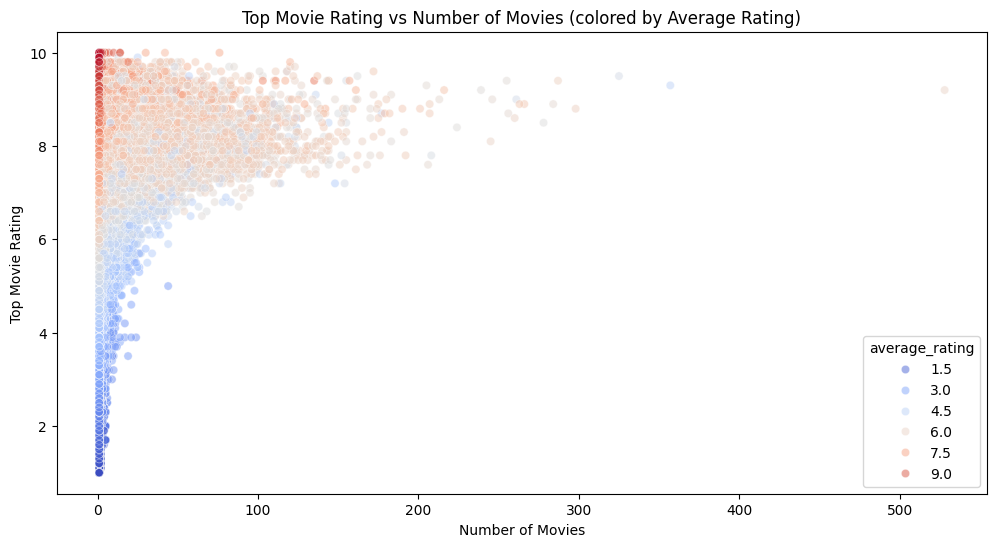

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x='num_movies',
    y='top_movie_rating',
    data=actors_rating_hanna_df,
    alpha=0.5,
    hue='average_rating',
    palette='coolwarm'
)
plt.title('Top Movie Rating vs Number of Movies (colored by Average Rating)')
plt.xlabel('Number of Movies')
plt.ylabel('Top Movie Rating')
# plt.colorbar(label='Average Rating')
plt.show()


* القيم العالية جداً لـ "أعلى تقييم لفيلم" (مثل 9 و 10) تظهر بشكل كبير بين الممثلين ذوي عدد الأفلام القليل، والذين يميل متوسط تقييمهم العام ليكون مرتفعاً (النقاط الحمراء/البرتقالية في الأعلى).
* كلما زاد عدد الأفلام، يميل التوزيع إلى أن يصبح أكثر تجانساً، مع استمرار وجود ممثلين بأفلام ذات تقييم عالٍ، ولكن يصبح وجود الممثلين ذوي "أعلى تقييم فيلم" شديد الارتفاع (9-10) أقل شيوعاً نسبياً.
<br>

**الاجابة النهائية**
<br>
- لعدد الأفلام القليل: يوجد تشتت كبير في "أعلى تقييم فيلم"، حيث يمتلك الكثير من الممثلين في هذه الفئة فيلماً واحداً أو أكثر بتقييمات عالية جداً (يميلون للون الأحمر/البرتقالي مما يشير لمتوسط تقييم عام مرتفع للممثل).
- لعدد الأفلام الكبير: بينما يستمر وجود ممثلين بأفلام ذات تقييم عالٍ، يلاحظ أن التقييمات العالية  تصبح أقل تكراراً بالنسبة لعدد الممثلين الكلي، ويميل الممثلون الذين شاركوا في عدد كبير جداً من الأفلام إلى أن يكون لديهم "أعلى تقييم فيلم" يقع في نطاق 7-9 على الأغلب. بمعنى آخر، من الأسهل على ممثل ذي عدد أفلام قليل أن يمتلك فيلماً واحداً بتقييم عالي جدا مقارنة بممثل يمتلك مئات الأفلام حيث يصبح متوسطه أكثر استقراراً وقد يقلل من احتمالية وجود فيلم واحد بتقييم عالي جدا.

#### ماهو توزع تقييم الممثلين في كل من المنهجيات الثلاث ؟ و كيف نصنف الفرق ؟

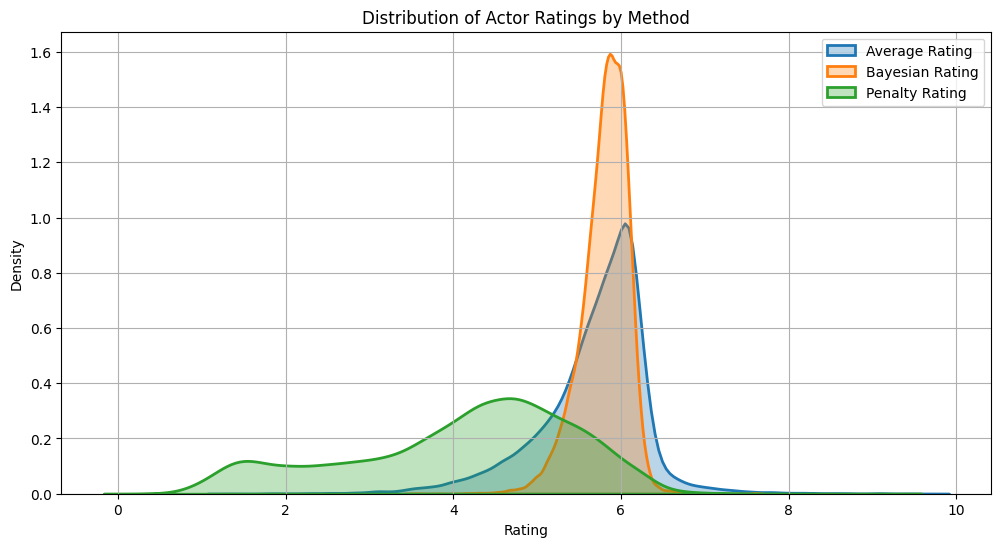

In [ ]:


plt.figure(figsize=(12, 6))

# Plot each rating method as density plot (or histogram if تفضل)
sns.kdeplot(leen_movies_df['actors_avg_rating'], label='Average Rating', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(leen_movies_df['actors_bayesian_rating'], label='Bayesian Rating', fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(leen_movies_df['actors_penalty_rating'], label='Penalty Rating', fill=True, alpha=0.3, linewidth=2)

plt.title('Distribution of Actor Ratings by Method')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


* يمتد توزيع "متوسط التقييم العادي" على نطاق واسع، بينما "التقييم البيزي" متمركز بشكل حاد، و"تقييم العقوبة" يظهر توزعاً أوسع مع انحراف نحو القيم الأقل.


<br>


**الاجابة النهائية**

<br>

**توزع تقييم الممثلين في كل منهجية**
<br>
1.  متوسط التقييم العادي (Average Rating - المنحنى الأزرق):

* يُظهر توزعاً واسعاً نسبياً يمتد عبر معظم نطاق التقييمات (من حوالي 0 إلى 10).

* لديه قمة رئيسية حوالي 6، ولكن يظهر أيضاً بعض التشتت والقمم الأصغر عند التقييمات الأقل، مما يشير إلى وجود ممثلين بتقييمات منخفضة ومتوسطة وعالية.

* يعكس هذا التوزيع الخام للتقييمات دون أي تعديل لحجم العينة.

2.  التقييم البيزي (Bayesian Rating - المنحنى البرتقالي):

* يُظهر توزعاً ضيقاً جداً ومتركّزاً بشكل حاد حول قيمة معينة (حوالي 6).

* القمة هنا أعلى وأضيق بكثير من المنحنيات الأخرى.

* هذا يدل على أن التقييم البيزي يقوم "بتنعيم" التقييمات، حيث يسحب التقييمات المتطرفة (سواء كانت عالية جداً أو منخفضة جداً) نحو المتوسط الكلي، خاصة بالنسبة للممثلين ذوي عدد الأفلام القليل، مما يقلل من التباين ويجعل التقييمات أكثر استقراراً وموثوقية.

3.  تقييم العقوبة (Penalty Rating - المنحنى الأخضر):

* يُظهر توزعاً أوسع من التقييم البيزي ولكنه ليس واسعاً مثل متوسط التقييم العادي.

* القمة الرئيسية لهذا التوزيع تقع عند قيمة أقل نسبياً (حوالي 4.5 إلى 5)، وهناك قمة أصغر عند قيم منخفضة جداً (حوالي 1.5).

* يشير هذا إلى أن تطبيق "نظام العقوبة" (الذي يعتمد على عدد الأصوات للفيلم) يميل إلى خفض التقييمات الإجمالية للممثلين، وربما يكشف عن مجموعتين من الممثلين: مجموعة تقييماتهم منخفضة جداً (غالباً بسبب أفلام بتقييمات متدنية جداً و/أو عدد أصوات قليل)، ومجموعة تقييماتهم متوسطة ولكن أقل من المنهجيات الأخرى.

<br>

<br>

**يمكن تصنيف الفرق على النحو التالي**
<br>
- متوسط التقييم العادي: هو المقياس "الخام" والأكثر تشتتاً، ويعكس التباين الكامل في الأداء الظاهري للممثلين، لكنه قد يكون مضللاً للممثلين ذوي البيانات القليلة.

- التقييم البيزي: هو مقياس "مُعدّل للموثوقية" أو "مُنعّم". يهدف إلى تقديم تقييم أكثر عدلاً وموثوقية عن طريق تخفيف تأثير القيم المتطرفة وتقريب التقييمات من المتوسط العام، خاصة عندما تكون البيانات قليلة.

- تقييم العقوبة: هو مقياس "مُركّز على الجودة المثبتة" أو "مُعاقب على عدم الشعبية/الضعف". يعطي وزناً أقل للأفلام التي لم تحظَ بعدد كافٍ من التقييمات أو التي حصلت على تقييمات منخفضة، مما يؤدي إلى سحب التقييمات الإجمالية نحو قيم أقل، ويسلط الضوء على الممثلين الذين شاركوا في أفلام ذات تقييمات عالية وعدد أصوات كبير.
<br>
باختصار، يقدم كل من هذه المنهجيات منظوراً مختلفاً لجودة أداء الممثل، مع التركيز على جوانب مختلفة مثل الخامة، الموثوقية الإحصائية، أو الجودة المثبتة بشعبية التصويت.

In [ ]:
actors_rating_hanna_df['actor_normalized'] = actors_rating_hanna_df['actor'].str.lower().str.replace(r'\s+', '', regex=True)


# END

In [3]:
import gdown
# https://drive.google.com/file/d/1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc/view?usp=sharing

file_id = "1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc"  # Replace with your actual file ID
output_file = "downloaded_file.dat"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
trips_df = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
trips_df.info()

Downloading...
From (original): https://drive.google.com/uc?id=1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc
From (redirected): https://drive.google.com/uc?id=1ZGA48yDc2sAMBCXa9XG8zw4V_2-NyVcc&confirm=t&uuid=3972d601-3318-4091-90aa-d07b47749ae2
To: /content/downloaded_file.dat
100%|██████████| 351M/351M [00:01<00:00, 239MB/s]


File downloaded to downloaded_file.dat
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722317 entries, 0 to 722316
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722317 non-null  int64  
 1   title                 722311 non-null  object 
 2   genres                512000 non-null  object 
 3   original_language     722317 non-null  object 
 4   overview              604074 non-null  object 
 5   popularity            722317 non-null  float64
 6   production_companies  337391 non-null  object 
 7   release_date          670768 non-null  object 
 8   budget                722317 non-null  float64
 9   revenue               722317 non-null  float64
 10  runtime               687982 non-null  float64
 11  status                722317 non-null  object 
 12  tagline               108476 non-null  object 
 13  vote_average          722317 non-null  float64
 14  vote_count   

In [44]:
import gdown

# https://drive.google.com/file/d/1e5MujyboHR0xp3KV4ZWJXPdk_rSp1r7L/view?usp=drive_link

file_id = "1e5MujyboHR0xp3KV4ZWJXPdk_rSp1r7L"  # Replace with your actual file ID
output_file = "downloaded_file.dat"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
tt2 = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
tt2.info()

Downloading...
From: https://drive.google.com/uc?id=1e5MujyboHR0xp3KV4ZWJXPdk_rSp1r7L
To: /content/downloaded_file.dat
100%|██████████| 32.0M/32.0M [00:00<00:00, 198MB/s]


File downloaded to downloaded_file.dat
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41399 entries, 0 to 41398
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41399 non-null  int64  
 1   title                   41399 non-null  object 
 2   genres                  41399 non-null  object 
 3   original_language       41399 non-null  object 
 4   overview                41399 non-null  object 
 5   popularity              41399 non-null  float64
 6   production_companies    41399 non-null  object 
 7   release_date            41399 non-null  object 
 8   budget                  41399 non-null  float64
 9   revenue                 41399 non-null  float64
 10  runtime                 41399 non-null  float64
 11  status                  41399 non-null  object 
 12  tagline                 41399 non-null  object 
 13  vote_average            41399 non-null  float64
 14 

In [45]:
import gdown

# https://drive.google.com/file/d/1RDf4Q24UDsKg6suppFdteqj5WY_Qljqi/view?usp=drive_link
file_id = "1RDf4Q24UDsKg6suppFdteqj5WY_Qljqi"  # Replace with your actual file ID
output_file = "downloaded_file.dat"  # You can change the output file name

gdown.download(id=file_id, output=output_file, quiet=False)
tt3 = pd.read_csv(output_file)
print(f"File downloaded to {output_file}")
tt3.info()

Downloading...
From: https://drive.google.com/uc?id=1RDf4Q24UDsKg6suppFdteqj5WY_Qljqi
To: /content/downloaded_file.dat
100%|██████████| 2.84M/2.84M [00:00<00:00, 28.0MB/s]

File downloaded to downloaded_file.dat
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25818 entries, 0 to 25817
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           25818 non-null  object 
 1   titleType        25818 non-null  object 
 2   primaryTitle     25818 non-null  object 
 3   originalTitle    25818 non-null  object 
 4   startYear        25818 non-null  int64  
 5   runtimeMinutes   25818 non-null  int64  
 6   genres           25818 non-null  object 
 7   runtimeCategory  25818 non-null  object 
 8   averageRating    25818 non-null  float64
 9   movie_age        25818 non-null  int64  
 10  rating_category  25818 non-null  object 
 11  age_group        25814 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 2.4+ MB


In [16]:
print(tt2.columns)
print(tt3.columns)

Index(['id', 'title', 'genres', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'status', 'tagline', 'vote_average', 'vote_count', 'credits',
       'tagline_sentiment', 'profit', 'release_year', 'release_month',
       'release_day', 'unique_actors_count', 'actors_avg_rating',
       'actors_bayesian_rating', 'actors_penalty_rating', 'movie_era',
       'budget_category'],
      dtype='object')
Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'runtimeCategory', 'averageRating',
       'movie_age', 'rating_category', 'age_group'],
      dtype='object')


In [15]:
# Count matches using sets
titles_tt3 = set(tt3['primaryTitle'])
titles_tt2 = set(tt2['title'])

matching_titles = titles_tt3.intersection(titles_tt2)
print(f"Number of matching titles: {len(matching_titles)}")


Number of matching titles: 23264


دمج المجموعتين

In [46]:
# Columns only in tt2 (not in tt3)
# Get unique columns from tt2 (excluding any overlap with tt3)
tt2_unique_cols = list(set(tt2.columns) - set(tt3.columns))

# Ensure 'title' is NOT duplicated
if 'title' in tt2_unique_cols:
    tt2_unique_cols.remove('title')

# Merge on primaryTitle (tt3) and title (tt2)
# merged_df = tt3.merge(tt2[['title'] + tt2_unique_cols], left_on='primaryTitle', right_on='title', how='left')
# Normalize tt3 primaryTitle and tt2 title for matching
tt3['normalized_primary_title'] = tt3['primaryTitle'].str.lower().str.replace(r'[^a-z0-9]', '', regex=True)
tt2['normalized_title'] = tt2['title'].str.lower().str.replace(r'[^a-z0-9]', '', regex=True)

# Merge keeping ALL rows from tt2
merged_df = tt2.merge(tt3, left_on='normalized_title', right_on='normalized_primary_title', how='left')

tt3_unique_cols = list(set(tt3.columns) - set(tt2.columns) - {'normalized_primary_title'})
for col in tt3_unique_cols:
    merged_df[col] = merged_df[col].fillna("Unknown")

# Optional: calculate % of Unknowns
unknown_percentages = {
    col: round((merged_df[col] == "Unknown").mean() * 100, 2)
    for col in tt3_unique_cols
}
for col, pct in unknown_percentages.items():
    print(f"{col}: {pct}% Unknown")


# Print results
for col, pct in unknown_percentages.items():
    print(f"{col}: {pct}% Unknown")



startYear: 37.66% Unknown
runtimeCategory: 37.66% Unknown
originalTitle: 37.66% Unknown
runtimeMinutes: 37.66% Unknown
age_group: 37.66% Unknown
titleType: 37.66% Unknown
movie_age: 37.66% Unknown
averageRating: 37.66% Unknown
rating_category: 37.66% Unknown
primaryTitle: 37.66% Unknown
tconst: 37.66% Unknown
startYear: 37.66% Unknown
runtimeCategory: 37.66% Unknown
originalTitle: 37.66% Unknown
runtimeMinutes: 37.66% Unknown
age_group: 37.66% Unknown
titleType: 37.66% Unknown
movie_age: 37.66% Unknown
averageRating: 37.66% Unknown
rating_category: 37.66% Unknown
primaryTitle: 37.66% Unknown
tconst: 37.66% Unknown


In [56]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39815 entries, 0 to 41847
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39815 non-null  int64  
 1   title                     39815 non-null  object 
 2   genres_x                  39815 non-null  object 
 3   original_language         39815 non-null  object 
 4   overview                  39815 non-null  object 
 5   popularity                39815 non-null  float64
 6   production_companies      39815 non-null  object 
 7   release_date              39815 non-null  object 
 8   budget                    39815 non-null  float64
 9   revenue                   39815 non-null  float64
 10  runtime                   39815 non-null  float64
 11  status                    39815 non-null  object 
 12  tagline                   39815 non-null  object 
 13  vote_average              39815 non-null  float64
 14  vote_count 

In [55]:
# prompt: upload merged_df to my drive as lNH_data.csv and mount my drive (add the imports)

drive.mount('/content/drive')

# Save the merged_df to a CSV file in your Google Drive
merged_df.to_csv('/content/drive/MyDrive/lNH_data.csv', index=False)

print("merged_df saved to Google Drive as lNH_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
merged_df saved to Google Drive as lNH_data.csv


In [48]:
superactor=pd.read_csv('superstars_actors.csv')
superactor.head(5)

,name,popularity,Pay (USD millions),is_superstar
0,George Clooney,74.270,239.0,True
1,Mel Gibson,70.105,185.0,True
2,Dwayne Johnson,69.724,87.5,True
3,Chris Hemsworth,84.653,76.4,True
4,Ryan Reynolds,199.717,71.5,True


دمج فيتشر الsuperstar

In [49]:
import pandas as pd

# Step 1: Normalize superstar names
superactor['clean_name'] = superactor['name'].str.lower().str.replace(" ", "")
superstar_names = superactor['clean_name'].tolist()

# Step 2: Clean 'credits' column
# Make sure credits column is a string (not float or NaN)
merged_df['credits'] = merged_df['credits'].fillna("").astype(str)
merged_df['clean_credits'] = merged_df['credits'].str.lower().str.replace(" ", "")

# Step 3: Check if any superstar appears in the credits
def has_superstar(credit_text):
    return any(name in credit_text for name in superstar_names)

merged_df['has_superstar_actor'] = merged_df['clean_credits'].apply(has_superstar)

# Optional: Drop helper column
merged_df.drop(columns=['clean_credits'], inplace=True)

# ✅ Done! Let’s preview it:
print(merged_df[['primaryTitle', 'has_superstar_actor']].head())


                       primaryTitle  has_superstar_actor
0                 Meg 2: The Trench                False
1               The Pope's Exorcist                False
2              Deadpool & Wolverine                 True
3  Transformers: Rise of the Beasts                False
4                    Dune: Part Two                False


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27878 entries, 0 to 27877
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tconst                  27878 non-null  object 
 1   titleType               27878 non-null  object 
 2   primaryTitle            27878 non-null  object 
 3   originalTitle           27878 non-null  object 
 4   startYear               27878 non-null  int64  
 5   runtimeMinutes          27878 non-null  int64  
 6   genres                  27878 non-null  object 
 7   runtimeCategory         27878 non-null  object 
 8   averageRating           27878 non-null  float64
 9   movie_age               27878 non-null  int64  
 10  rating_category         27878 non-null  object 
 11  age_group               27874 non-null  object 
 12  title                   25465 non-null  object 
 13  credits                 27878 non-null  object 
 14  actors_bayesian_rating  27878 non-null

In [50]:
merged_df['has_superstar_actor'].value_counts()

,count
has_superstar_actor,
False,39479
True,2369


In [51]:
import pandas as pd
import re
from collections import defaultdict

# ✅ Normalize titles for matching
def normalize_title(title):
    if pd.isna(title):
        return ""
    title = title.lower()
    title = re.sub(r'[^a-z0-9]', '', title)
    return title

oscars_df['normalized_film'] = oscars_df['film'].apply(normalize_title)
merged_df['normalized_title'] = merged_df['title'].apply(normalize_title)

# ✅ Find intersection
matched_movies = merged_df['normalized_title'].isin(oscars_df['normalized_film'])
num_matched_movies = matched_movies.sum()
print(f"matched movies :  {num_matched_movies}")

# ✅ Oscar status per movie
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)
oscar_movie_status = oscars_df.groupby('normalized_film')['winner_numeric'].max().to_dict()

def get_movie_oscar_status(normalized_title, oscar_map):
    return oscar_map.get(normalized_title, 0)

merged_df['movie_oscar'] = merged_df['normalized_title'].apply(
    lambda x: get_movie_oscar_status(x, oscar_movie_status)
)

print("\n--- movie_oscar ---")
print(merged_df[['title', 'movie_oscar']].head(10))
print(merged_df['movie_oscar'].value_counts())

# ✅ Normalize and split credits
def normalize_and_split_credits(credits_string):
    if pd.isna(credits_string):
        return []
    return [
        re.sub(r'\s+', '', actor.lower())
        for actor in credits_string.split('-') if actor.strip()
    ]

merged_df['normalized_credits_list'] = merged_df['credits'].apply(normalize_and_split_credits)

# ✅ Normalize Oscar names
oscars_df['normalized_name'] = oscars_df['name'].apply(
    lambda x: re.sub(r'[^a-z0-9]', '', x.lower()) if pd.notna(x) else ""
)

# ✅ Map Oscar status to people
oscars_df['winner_numeric'] = oscars_df['winner'].apply(lambda x: 2 if x else 1)
oscar_person_status = oscars_df.groupby('normalized_name')['winner_numeric'].max().to_dict()

def get_movie_credits_oscar_status(credits_list, oscar_map):
    found_statuses = [oscar_map[name] for name in credits_list if name in oscar_map]
    return max(found_statuses) if found_statuses else 0

merged_df['movie_credits_oscar'] = merged_df['normalized_credits_list'].apply(
    lambda x: get_movie_credits_oscar_status(x, oscar_person_status)
)

print("\n--- movie_credits_oscar ---")
print(merged_df[['title', 'movie_credits_oscar']].head(10))
print(merged_df['movie_credits_oscar'].value_counts())

# ✅ Normalize production companies
def normalize_company_list(companies_string):
    if pd.isna(companies_string):
        return []
    companies = [comp.strip().lower() for comp in companies_string.split(',')]
    companies = [re.sub(r'[^a-z0-9]', '', c) for c in companies if c]
    return companies

merged_df['normalized_companies_list'] = merged_df['production_companies'].apply(normalize_company_list)

# ✅ Create movie-level Oscar status again if needed
merged_df['movie_oscar_status'] = merged_df['normalized_title'].map(oscar_movie_status).fillna(0).astype(int)

# ✅ Aggregate Oscar counts per company
company_oscars_count = defaultdict(int)

for idx, row in merged_df.iterrows():
    companies = row['normalized_companies_list']
    movie_oscar = row['movie_oscar_status']
    for company in companies:
        company_oscars_count[company] += movie_oscar

def get_company_oscars(companies_list, oscar_count_map):
    total = 0
    for company in companies_list:
        total += oscar_count_map.get(company, 0)
    return total

merged_df['company_oscars'] = merged_df['normalized_companies_list'].apply(
    lambda comps: get_company_oscars(comps, company_oscars_count)
)

# ✅ Clean temp columns if needed
merged_df.drop(columns=['normalized_companies_list', 'movie_oscar_status'], inplace=True)

# ✅ Show example
print("\n--- Sample of new feature company_oscars ---")
print(merged_df[['title', 'production_companies', 'company_oscars']].head(10))
print(merged_df['company_oscars'].value_counts())


matched movies :  3157

--- movie_oscar ---
                                 title  movie_oscar
0                    Meg 2: The Trench            0
1                  The Pope's Exorcist            0
2                 Deadpool & Wolverine            0
3     Transformers: Rise of the Beasts            0
4                       Dune: Part Two            2
5                Venom: The Last Dance            0
6    Ant-Man and the Wasp: Quantumania            0
7                            Creed III            0
8              Insidious: The Red Door            0
9  Spider-Man: Across the Spider-Verse            1
movie_oscar
0    38691
1     2150
2     1007
Name: count, dtype: int64

--- movie_credits_oscar ---
                                 title  movie_credits_oscar
0                    Meg 2: The Trench                    0
1                  The Pope's Exorcist                    2
2                 Deadpool & Wolverine                    2
3     Transformers: Rise of the Beasts      

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41848 entries, 0 to 41847
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        41848 non-null  int64  
 1   title                     41848 non-null  object 
 2   genres_x                  41848 non-null  object 
 3   original_language         41848 non-null  object 
 4   overview                  41848 non-null  object 
 5   popularity                41848 non-null  float64
 6   production_companies      41848 non-null  object 
 7   release_date              41848 non-null  object 
 8   budget                    41848 non-null  float64
 9   revenue                   41848 non-null  float64
 10  runtime                   41848 non-null  float64
 11  status                    41848 non-null  object 
 12  tagline                   41848 non-null  object 
 13  vote_average              41848 non-null  float64
 14  vote_c

In [53]:
print(merged_df['actors_avg_rating'].isna().sum())
# missing_actor_rating.info()

2033


In [54]:
# prompt: drop these merged_df['actors_avg_rating'].isna().sum()

merged_df.dropna(subset=['actors_avg_rating'], inplace=True)
print(merged_df['actors_avg_rating'].isna().sum())


0
